Define your Base path

In [1]:
base_path = "/content/drive/MyDrive"

# Installations and Imports

In [2]:
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import os
import shutil
import re
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Set options to control the display of DataFrames
pd.set_option('display.max_rows', 20)         # Number of rows to display
pd.set_option('display.max_columns', 50)       # Number of columns to display
pd.set_option('display.max_colwidth', 500)    # Maximum width of each column
pd.set_option('display.width', 10000)          # Width of the display in characters

In [3]:
!pip install tqdm

In [4]:
!pip install negspacy

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for negspacy: filename=negspacy-1.0.4-py3-none-any.whl size=12537 sha256=ed24d5fc36077fa4fc194559811917ea03ada6d473ecb29d40cd21dbd3405dd3
  Stored in directory: /root/.cache/pip/wheels/15/31/f0/3a217aaedf320e4df653347cd6538f3648263b864c8e140853
Successfully built negspacy


In [5]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [6]:
pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_core_sci_sm-0.5.0.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 38.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.5/659.5 kB 24.3 MB/s eta 0:00:00
  Created wheel for en_core_sci_sm: filename=en_core_sci_sm-0.5.0-py3-none-any.whl size=15871024 sha256=2f2ab8da04c40c724e6994d548af8c70ab673d1d8ab69a0ca030c325cd6851d2
  Stored in directory: /root/.cache/pip/wheels/e5/ac/89/48952be52d4098fe9bb3c276aeca515f995d145163ceb8654c
Successfully built en_core_sci_sm
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.3
    Uninstallin

In [7]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.0/en_ner_bc5cdr_md-0.5.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 MB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.0-py3-none-any.whl size=120215835 sha256=48fee0d04e6a8fc7e43859749f1ef28759e2e80ee985b46d2ee6622e9bfa9633
  Stored in directory: /root/.cache/pip/wheels/44/e8/99/517b2d53bb44945cf7a96208d44bae722e13f028736a1f1f4f
Successfully built en_ner_bc5cdr_md


In [8]:
!python -m spacy download en_core_web_sm

2024-09-02 08:42:01.467478: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 08:42:01.514614: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 08:42:01.536729: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 08:42:01.591723: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 08:42:04.951405: W tensorflow/compiler/tf2

In [9]:
!pip install top2vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [10]:
!pip install bertopic

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 8.4 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.14 requires pydantic>=2.7.0, but you have pydantic 1.8.2 which is incompatible.
spacy 3.2.6 requires typing-extensions<4.6.0,>=3.7.4.1, but you have typing-extensions 4.12.2 which is incompatible.


In [11]:
!pip install transformers torch

In [12]:
pip install gensim

In [13]:
!pip install top2vec[sentence_encoders]
!pip install tensorflow tensorflow_hub tensorflow_text

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 27.4 MB/s eta 0:00:00


In [14]:
pip install pydrive2

In [15]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.7 MB/s eta 0:00:00


# Discharge Diagnoses Column : Preparing to preprocess

In [ ]:
df_data = pd.read_csv(f"{base_path}/BM7/Dissertation/Final_Datasets/Final_Unstructured_Features_Before_NLP.csv")

In [ ]:
df_data.shape

(46038, 14)

In [ ]:
df_data.head(1)

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 TEXT DIAGNOSIS                                          Chief Complaint                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           History of Present Illness                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Past Medical History                                                                                                                                             Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Discharge Medications                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Uncategorized
0              109   172335       0                24          40301            5498  Admission Date:  [**2141-9-18**]              Discharge Date:   [**2141-9-24**]\n\nDate of Birth:  [**2117-8-7**]             Sex:   F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 1936**]\nChief Complaint:\nhip pain\n\nMajor Surgical or Invasive Procedure:\nNone\n\n\nHistory of Present Illness:\n24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] ...  LEG PAIN  hip pain\n\nMajor Surgical or Invasive Procedure:\nNone  24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] following admission for the same\ncomplaints.\n.\nPatient took her hydralazine dose on am of admission. BP at\npresentation to the ER was 250/140 (The patient reportedly has\nbaseline SBPs in 130-170s) She was given 900 labetolol and 50\nhydralazine in the ED. BP following this was 175/124. Her EKG\nwas unchanged. K was 5.7.\n.\nPatient also ...  Systemic lupus erythematosus. D

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46038 entries, 0 to 46037
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SUBJECT_ID_diag             46038 non-null  int64 
 1   HADM_ID                     46038 non-null  int64 
 2   GENDER                      46038 non-null  int64 
 3   AGE_AT_ADMISSION            46038 non-null  int64 
 4   ICD9_CODE_diag              46038 non-null  object
 5   ICD9_CODE_proc              46038 non-null  int64 
 6   TEXT                        46038 non-null  object
 7   DIAGNOSIS                   46037 non-null  object
 8   Chief Complaint             34889 non-null  object
 9   History of Present Illness  42564 non-null  object
 10  Past Medical History        40788 non-null  object
 11  Discharge Diagnoses         41466 non-null  object
 12  Discharge Medications       36003 non-null  object
 13  Uncategorized               45604 non-null  ob

## **Handle Missing Values**

In [ ]:
# drop all null values
df_data = df_data.dropna()

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31574 entries, 0 to 46037
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SUBJECT_ID_diag             31574 non-null  int64 
 1   HADM_ID                     31574 non-null  int64 
 2   GENDER                      31574 non-null  int64 
 3   AGE_AT_ADMISSION            31574 non-null  int64 
 4   ICD9_CODE_diag              31574 non-null  object
 5   ICD9_CODE_proc              31574 non-null  int64 
 6   TEXT                        31574 non-null  object
 7   DIAGNOSIS                   31574 non-null  object
 8   Chief Complaint             31574 non-null  object
 9   History of Present Illness  31574 non-null  object
 10  Past Medical History        31574 non-null  object
 11  Discharge Diagnoses         31574 non-null  object
 12  Discharge Medications       31574 non-null  object
 13  Uncategorized               31574 non-null  object


In [ ]:
df_data.head(3)

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 TEXT              DIAGNOSIS                                                                                                                           Chief Complaint                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           History of Present Illness                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Past Medical History                                                                                                                                                                                                                                                     Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Discharge Medications                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        Uncategorized
0              109   172335       0                24          40301            5498  Admission Date:  [**2141-9-18**]              Discharge Date:   [**2141-9-24**]\n\nDate of Birth:  [**2117-8-7**]             Sex:   F\n\nService: MEDICINE\n\nAllergies:\nPenicillins / Percocet\n\nAttending:[**First Name3 (LF) 1936**]\nChief Complaint:\nhip pain\n\nMajor Surgical or Invasive Procedure:\nNone\n\n\nHistory of Present Illness:\n24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] ...               LEG PAIN                                                                                   hip pain\n\nMajor Surgical or Invasive Procedure:\nNone  24yo woman with hx SLE, CKD(not currently on HD or PD), labile\nHTN here with right leg pain and HTN urgency. Patient was\nrecently d/ced on [**9-14**] following admission for the same\ncomplaints.\n.\nPatient took her hydralazine dose on a

In [ ]:
df_data.columns

Index(['SUBJECT_ID_diag', 'HADM_ID', 'GENDER', 'AGE_AT_ADMISSION', 'ICD9_CODE_diag', 'ICD9_CODE_proc', 'TEXT', 'DIAGNOSIS', 'Chief Complaint', 'History of Present Illness', 'Past Medical History', 'Discharge Diagnoses', 'Discharge Medications', 'Uncategorized'], dtype='object')

In [ ]:
# Select only the 'SUBJECT_ID_diag' and 'Discharge Diagnoses' columns
df_data = df_data[['SUBJECT_ID_diag', 'HADM_ID', 'GENDER', 'AGE_AT_ADMISSION', 'ICD9_CODE_diag', 'ICD9_CODE_proc', 'Discharge Diagnoses', 'Chief Complaint']]

In [ ]:
df_data.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                     Discharge Diagnoses                                                                                                                                                                                                                                            Chief Complaint
0               109   172335       0                24          40301            5498                                                                                                                                                                          Primary:\nHypertensive urgency\nTransient Hypotension due to Narcotics\nSciatica\n.\nSecondary:\nEnd stage renal disease\nSystemic Lupus Erythematosus\nAnemia                                                                                                                                                                                                    hip pain\n\nMajor Surgical or Invasive Procedure:\nNone
1               109   173633       0                24          40301            3995                                                                  Primary:\nHypertensive Urgency\nAbdominal Pain\nESRD on HD\nSVC Thrombus\n\nSecondary:\nSystemic lupus erythematosus\nMalignant hypertension\nThrombocytopenia\nHOCM\nAnemia\nHistory of left eye enucleation\nHistory of vaginal bleeding\nThrombotic microangiopathy                                                                                                                                                abdominal pain & hypertension\n\nMajor Surgical or Invasive Procedure:\nHemodialysis\nPICC Line [**12-11**]
5               115   114585       0                75           1940             722                                                                                                                                                                                                   R adrenal mass\nHepatic collections\nIVC thrombus\nmalnutrition\nUTI,yeast\npleural effusion\nARF, resolved\npost menopausal bleeding                                                                                                                   Right adrenal tumor\n\nMajor Surgical or Invasive Procedure:\nExploratory laparotomy, right adrenalectomy and right segment 6\nresection
7               117   164853       0                49            570            3491                                                                                                                                                                                                                                    N/A\n\nDischarge Condition:\ndeceased\n\nDischarge Instructions:\nN/A\n\nFollowup Instructions:\nN/A                                                                                                                                                                                     End Stage Liver Disease\n\nMajor Surgical or Invasive Procedure:\nnone
10              124   134369       1                74          44021            3950  Primary:\nR buttock & thigh claudication\n.\nSecondary:\nCAD, s/p CVA x 2, aortic arch aneurysm, HTN, prostate ca, lung\nca, h/o hepatitis C, hyperlipidemia, COPD, stage IV CKD, chronic\nback pain, vitamin D deficiency, L renal artery stenosis, L\nkidney atrophy, prepatellar bursitis, h/o cavitary RLL\nabscess/PNA [**3-20**]  RLE Claudication\n\nMajor Surgical or Invasive Procedure:\n[**2165-5-23**] Diagnostic aortic and pelvic arteriogram with left common\nand external iliac stents; ultrasound-guided imaging for\n[**Month/Day/Year 1106**] access; aortic catheterization.

## Updating and merging 'Discharge Diagnoses' with 'Chief Complaint'
which now contains both the diagnoses and the chief complaints
Merging 'Discharge Diagnoses' and 'Chief Complaint' could potentially improve your topic modeling by providing richer, more comprehensive documents for the model to analyze.

In [ ]:
# Merge the 'Chief Complaint' into 'Discharge Diagnoses'
df_data['Discharge Diagnoses'] = df_data['Discharge Diagnoses'] + ' ' + df_data['Chief Complaint']

# Delete the 'Chief Complaint' column
df_data.drop(columns=['Chief Complaint'], inplace=True)

In [ ]:
df_data.head(3)

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                 Discharge Diagnoses
0              109   172335       0                24          40301            5498                                                                                                                                                              Primary:\nHypertensive urgency\nTransient Hypotension due to Narcotics\nSciatica\n.\nSecondary:\nEnd stage renal disease\nSystemic Lupus Erythematosus\nAnemia hip pain\n\nMajor Surgical or Invasive Procedure:\nNone
1              109   173633       0                24          40301            3995  Primary:\nHypertensive Urgency\nAbdominal Pain\nESRD on HD\nSVC Thrombus\n\nSecondary:\nSystemic lupus erythematosus\nMalignant hypertension\nThrombocytopenia\nHOCM\nAnemia\nHistory of left eye enucleation\nHistory of vaginal bleeding\nThrombotic microangiopathy abdominal pain & hypertension\n\nMajor Surgical or Invasive Procedure:\nHemodialysis\nPICC Line [**12-11**]
5              115   114585       0                75           1940             722                                                                                                      R adrenal mass\nHepatic collections\nIVC thrombus\nmalnutrition\nUTI,yeast\npleural effusion\nARF, resolved\npost menopausal bleeding Right adrenal tumor\n\nMajor Surgical or Invasive Procedure:\nExploratory laparotomy, right adrenalectomy and right segment 6\nresection

In [ ]:
df_data.shape

(31574, 7)

## Export the dataframe (before Text Preprocessing)

In [ ]:
# # Assuming you want to export the DataFrame 'df_data' to a CSV file
df_data.to_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Final_data_before_preprocess.csv', index=False)


# XML Medical Term Extraction Script (MeSH : Medical Subject Headings)  

In [ ]:
# import xml.etree.ElementTree as ET
# import re

# def extract_terms_from_xml(xml_file_path):
#     # Parse the XML file
#     tree = ET.parse(xml_file_path)
#     root = tree.getroot()

#     # Define a list to store extracted strings
#     extracted_strings = []

#     # Iterate over all 'string' elements in the XML
#     for string_element in root.iter('String'):
#         if string_element.text:
#             # Clean and normalize the text
#             text = string_element.text.strip()
#             # Only keep text that consists of alphabetic characters (remove numbers and special chars)
#             cleaned_text = re.sub(r'[^A-Za-z\s]', '', text)
#             extracted_strings.append(cleaned_text.lower())  # Convert to lowercase for consistency

#     return extracted_strings

# # Path to your MeSH XML file
# xml_file_path = '/content/desc2024.xml'

# # Extract terms from the XML file
# terms = extract_terms_from_xml(xml_file_path)

# # Remove duplicates and sort terms
# unique_terms = sorted(set(terms))

# # Save the terms to a file
# with open('medical_terms_vocab.txt', 'w') as f:
#     for term in unique_terms:
#         f.write(f"{term}\n")

# print(f"Extracted {len(unique_terms)} unique medical terms.")


In [ ]:
# import shutil

# # Source file path
# source_file = '/content/medical_terms_vocab.txt'
# # Destination path in Google Drive
# destination_file = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/medical_terms_vocab.txt'

# # Copy file to Google Drive
# shutil.copy(source_file, destination_file)
# print('File copied to Google Drive successfully!')

# Text Pre-processing Steps

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Final_data_before_preprocess.csv')

In [ ]:
df_data.shape

(31574, 7)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31574 entries, 0 to 31573
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SUBJECT_ID_diag      31574 non-null  int64 
 1   HADM_ID              31574 non-null  int64 
 2   GENDER               31574 non-null  int64 
 3   AGE_AT_ADMISSION     31574 non-null  int64 
 4   ICD9_CODE_diag       31574 non-null  object
 5   ICD9_CODE_proc       31574 non-null  int64 
 6   Discharge Diagnoses  31574 non-null  object
dtypes: int64(5), object(2)
memory usage: 1.7+ MB


### Function: Medical Ontology mapping and Named Entity Recognition

In [ ]:
import spacy
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.base import TransformerMixin, BaseEstimator
from negspacy.negation import Negex
from negspacy.termsets import termset
import nltk
from tqdm import tqdm

# Ensure the NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load spaCy model if required
# nlp = spacy.load("en_ner_bc5cdr_md")  # Model specifically trained for biomedical named entity recognition

class MedicalOntologyMatcher(TransformerMixin, BaseEstimator):
    """
    A class for matching entities to medical ontologies like MeSH and extracting n-grams.
    """

    def __init__(self, mesh_terms_file=None, batch_size=500):
        """
        Initialize the matcher with MeSH terms and set the batch size for processing.
        """
        self.batch_size = batch_size
        if mesh_terms_file:
            self.mesh_terms = self.load_medical_terms(mesh_terms_file)
        else:
            self.mesh_terms = []

    def load_medical_terms(self, file_path):
        """
        Load MeSH terms from a file.
        """
        with open(file_path, 'r') as file:
            terms = [line.strip().lower() for line in file if line.strip()]
        return terms

    def extract_medical_terms(self, text):
        """
        Extract medical terms from the text by matching unigrams, bigrams, trigrams, and 4-grams.
        """
        text = text.lower()  # Convert to lowercase for consistent matching
        words = text.split()  # Tokenize by splitting on whitespace

        # Create a set to store extracted terms
        extracted_terms = set()

        # Check for unigrams, bigrams, trigrams, and 4-grams
        for length in range(1, 5):  # Lengths of 1 to 4
            for start in range(len(words)):
                end = start + length
                if end <= len(words):
                    phrase = ' '.join(words[start:end])
                    if phrase in self.mesh_terms:
                        extracted_terms.add(phrase)

        return list(extracted_terms)

    def create_MESH_mapping_column(self, X):
        """
        Create the 'MESH_mapping' column in the DataFrame based on the processed text.
        """
        X = X.copy()
        tqdm.pandas(desc="Creating MESH Mapping")
        X['MESH_mapping'] = X['filtered_text(stopwords_removed)'].progress_apply(
            lambda text: self.extract_medical_terms(text)
        )
        return X

    def batch_extract_entities(self, texts):
        """
        Process texts in batches and extract named entities using the spaCy NER model.
        """
        entities_with_tags = []

        # Using tqdm to add a progress bar for batch processing
        for doc in tqdm(nlp.pipe(texts, batch_size=self.batch_size), total=len(texts), desc="Extracting Entities"):
            doc_entities = []
            for ent in doc.ents:
                doc_entities.append(f"[{ent.label_}:{ent.text}]")
            entities_with_tags.append(' '.join(doc_entities))

        return entities_with_tags

    def create_NER_MESH_entities_column(self, X):
        """
        Create the 'NER_MESH_entities' column in the DataFrame based on the MESH terms.
        """
        X = X.copy()
        texts = X['MESH_mapping'].apply(lambda terms: ' '.join(terms) if isinstance(terms, list) else terms)

        # Batch processing for entity extraction with progress bar
        X['NER_MESH_entities'] = self.batch_extract_entities(texts)

        return X


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **Classes: Text-preprocessing-pipelines**

1. **TextPreprocessor Class**
The TextPreprocessor class provides a comprehensive set of tools for cleaning and preprocessing medical text data. Key functionalities include:

Data Cleaning: Removes digits, punctuation, and extraneous symbols while preserving sentence boundaries.
Sentence Segmentation: Splits the text into sentences using spaCy's NLP model.
Tokenization: Breaks down text into individual tokens (words).
Lemmatization: Converts tokens to their base forms to normalize text.
Negation Detection: Identifies and annotates negated entities in the text using the Negex algorithm, allowing for accurate medical text analysis.
2. **ExtendedTextPreprocessor Class**
The ExtendedTextPreprocessor class extends the capabilities of the TextPreprocessor class with additional functionalities:

Filtering Negated Entities: Removes entities that are negated, maintaining sentence structure and ensuring that only relevant entities are analyzed.
Stopword Removal: Eliminates common English stopwords to reduce noise in the text and improve model performance.
Ontology-Based Term Disambiguation: Integrates medical ontology matching to disambiguate and standardize terms using MeSH (Medical Subject Headings).

In [ ]:
import spacy
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.base import TransformerMixin, BaseEstimator
from negspacy.negation import Negex
from negspacy.termsets import termset
import nltk
from tqdm import tqdm

# Ensure the NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load spaCy models
nlp = spacy.load("en_core_sci_sm")  # General scientific English model
ner_model = spacy.load("en_ner_bc5cdr_md")  # Model specifically trained for biomedical named entity recognition

# Initialize the termset and Negex component for detecting negations
ts = termset("en_clinical")  # Termset for clinical contexts
nlp.add_pipe("negex", config={"neg_termset": ts.get_patterns()}, after="ner")  # Add Negex pipeline component

class TextPreprocessor(TransformerMixin, BaseEstimator):
    """
    A custom transformer class for preprocessing medical text data.
    """

    def __init__(self, excluded_ent_types=None):
        """
        Initialize the TextPreprocessor with optional entity types to exclude.
        """
        self.stop_words = set(stopwords.words('english'))  # Set of English stop words
        self.excluded_ent_types = excluded_ent_types if excluded_ent_types else []

    def fit(self, X, y=None):
        """
        Fit method for scikit-learn compatibility (not used here).
        """
        return self

    def transform(self, X, y=None):
        """
        Transform the DataFrame by applying preprocessing steps.
        """
        X = X.astype(str)
        tqdm.pandas(desc="Cleaning Text")
        X['clean_text'] = X['Discharge Diagnoses'].progress_apply(self.clean_text)
        tqdm.pandas(desc="Segmenting Sentences")
        X['sentences'] = X['clean_text'].progress_apply(self.segment_sentences)
        tqdm.pandas(desc="Tokenizing Text")
        X['tokenized_text'] = X['sentences'].progress_apply(lambda sents: [self.tokenize_text(sent) for sent in sents])
        tqdm.pandas(desc="Lemmatizing Text")
        X['lemmatized_text'] = X['tokenized_text'].progress_apply(lambda sents_list: [self.lemmatize_tokens(tokens) for tokens in sents_list])
        tqdm.pandas(desc="Detecting Negations")
        X['negated_entities'] = X['lemmatized_text'].progress_apply(lambda sents: [self.detect_negations(sent) for sent in sents])
        return X

    def clean_text(self, text):
        """
        Clean the text by removing digits and extraneous symbols but retaining sentence boundaries.
        """
        text = re.sub(r'[\d]', '', text)  # Remove digits
        text = re.sub(r'\n+', ' ', text)  # Replace newlines with space
        text = text.translate(str.maketrans('', '', string.punctuation.replace('.', '').replace('!', '').replace('?', '')))
        REPLACE_BY_SPACE_RE = re.compile(r'[/(){}\[\]\|@,;]')
        text = REPLACE_BY_SPACE_RE.sub(' ', text)
        text = text.lower()
        text = re.sub('\s+', ' ', text).strip()
        return text

    def segment_sentences(self, text):
        """
        Segment the text into sentences using spaCy.
        """
        doc = nlp(text)
        sentences = [sent.text.strip() for sent in doc.sents]
        return sentences

    def tokenize_text(self, text):
        """
        Tokenize the cleaned text.
        """
        tokens = word_tokenize(text)
        return tokens

    def lemmatize_tokens(self, tokens):
        """
        Lemmatize tokens using spaCy.
        """
        doc = nlp(" ".join(tokens))
        lemmatized_tokens = [token.lemma_ for token in doc]
        return " ".join(lemmatized_tokens)

    def lemmatize_text(self, text):
        """
        Lemmatize the tokenized text using spaCy.
        """
        doc = nlp(text)
        lemmatized_text = " ".join([token.lemma_ for token in doc])
        return lemmatized_text

    def lemmatize_sentences(self, sentences):
        """
        Apply lemmatization to each sentence.
        """
        lemmatized_sentences = []
        for sentence in sentences:
            lemmatized_sentence = self.lemmatize_text(sentence)
            lemmatized_sentences.append(lemmatized_sentence)
        return lemmatized_sentences


    def detect_negations(self, text):
        """
        Detect negations in the text and annotate entities accordingly.
        """
        doc = nlp(text)
        negated_entities = []

        # Collect negations
        negation_spans = [(ent.start_char, ent.end_char) for ent in doc.ents if ent._.negex]

        # Annotate entities with their negation status
        for ent in doc.ents:
            if ent.label_ not in self.excluded_ent_types:
                start, end = ent.start_char, ent.end_char
                if any(start >= neg_start and end <= neg_end for neg_start, neg_end in negation_spans):
                    negated_entities.append(f"[NEGATED:{ent.label_}:{ent.text}]")
                else:
                    negated_entities.append(f"[{ent.label_}:{ent.text}]")

        negated_entities_str = ' '.join(negated_entities)
        return negated_entities_str


class ExtendedTextPreprocessor(TextPreprocessor):
    """
    A custom transformer class for preprocessing medical text data with MeSH term disambiguation and filtering negated entities.
    """

    def __init__(self, excluded_ent_types=None, mesh_terms_file=None):
        super().__init__(excluded_ent_types=excluded_ent_types)
        self.mesh_terms_file = mesh_terms_file
        self.ontology_matcher = MedicalOntologyMatcher(mesh_terms_file=mesh_terms_file)

    def filter_out_negated_entities(self, row):
        """
        Filter out negated entities from the lemmatized text while maintaining sentence structure.
        """
        if 'lemmatized_text' not in row or 'negated_entities' not in row:
            raise ValueError("The input row is missing required columns 'lemmatized_text' or 'negated_entities'.")

        lemmatized_text = row['lemmatized_text']
        negated_entities = row['negated_entities']

        # Convert any non-string to string
        if not isinstance(lemmatized_text, str):
            lemmatized_text = str(lemmatized_text)

        if not isinstance(negated_entities, str):
            negated_entities = str(negated_entities)

        # Handle NaN values by setting them to an empty string
        if pd.isna(lemmatized_text):
            lemmatized_text = ''

        if pd.isna(negated_entities):
            negated_entities = ''

        phrases_to_remove = []

        matches = re.findall(r'\[NEGATED:ENTITY:(.+?)\]', negated_entities)
        for match in matches:
            negated_phrase = match.strip()
            if negated_phrase:
                phrases_to_remove.append(negated_phrase)

        for phrase in phrases_to_remove:
            lemmatized_text = re.sub(r'\b' + re.escape(phrase) + r'\b', '', lemmatized_text)

        filtered_text = re.sub(r'\s+(?=\.)|(?<=\.)\s+', ' ', lemmatized_text)
        filtered_text = re.sub(r'\s+', ' ', filtered_text).strip()

        return filtered_text

    def remove_stopwords(self, text):
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.lower() not in self.stop_words]
        return ' '.join(filtered_tokens)

    def transform_filtered_text(self, X):
        X = super().transform(X)
        tqdm.pandas(desc="Filtering Out Negated Entities")
        X['filtered_text(negated_words_removed)'] = X.progress_apply(self.filter_out_negated_entities, axis=1)
        tqdm.pandas(desc="Removing Stopwords")
        X['filtered_text(stopwords_removed)'] = X['filtered_text(negated_words_removed)'].progress_apply(self.remove_stopwords)
        return X


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Batch Preprocessing

Splitting the 30,000 rows data in 6 batches for faster processing ( NER is a heavy model and slow)

No need to run this since the split files are already created and present

In [ ]:
# import pandas as pd
# import numpy as np

# # Split the DataFrame into 6 parts
# split_dfs = np.array_split(df_data, 6)

# # Export each split DataFrame to a CSV file
# for i, split_df in enumerate(split_dfs):
#     # Display the size of each split before exporting
#     print(f"Split {i+1} size: {len(split_df)} rows")

#     # Create a filename for each split
#     filename = f'/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_before_preprocess/split_data_part_{i+1}.csv'

#     # Save the split DataFrame to a CSV file
#     split_df.to_csv(filename, index=False)

#     print(f"Exported split {i+1}/6 to {filename}")

# print('All splits exported.')


#### Batch 1

In [ ]:
split_df = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_before_preprocess/split_data_part_1.csv')

In [ ]:
split_df.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses
0              109   172335       0                24          40301            5498                                                                                                                                                                                                                                                                                               Primary:\nHypertensive urgency\nTransient Hypotension due to Narcotics\nSciatica\n.\nSecondary:\nEnd stage renal disease\nSystemic Lupus Erythematosus\nAnemia hip pain\n\nMajor Surgical or Invasive Procedure:\nNone
1              109   173633       0                24          40301            3995                                                                                                                                   Primary:\nHypertensive Urgency\nAbdominal Pain\nESRD on HD\nSVC Thrombus\n\nSecondary:\nSystemic lupus erythematosus\nMalignant hypertension\nThrombocytopenia\nHOCM\nAnemia\nHistory of left eye enucleation\nHistory of vaginal bleeding\nThrombotic microangiopathy abdominal pain & hypertension\n\nMajor Surgical or Invasive Procedure:\nHemodialysis\nPICC Line [**12-11**]
2              115   114585       0                75           1940             722                                                                                                                                                                                                                                       R adrenal mass\nHepatic collections\nIVC thrombus\nmalnutrition\nUTI,yeast\npleural effusion\nARF, resolved\npost menopausal bleeding Right adrenal tumor\n\nMajor Surgical or Invasive Procedure:\nExploratory laparotomy, right adrenalectomy and right segment 6\nresection
3              117   164853       0                49            570            3491                                                                                                                                                                                                                                                                                                                                          N/A\n\nDischarge Condition:\ndeceased\n\nDischarge Instructions:\nN/A\n\nFollowup Instructions:\nN/A End Stage Liver Disease\n\nMajor Surgical or Invasive Procedure:\nnone
4              124   134369       1                74          44021            3950  Primary:\nR buttock & thigh claudication\n.\nSecondary:\nCAD, s/p CVA x 2, aortic arch aneurysm, HTN, prostate ca, lung\nca, h/o hepatitis C, hyperlipidemia, COPD, stage IV CKD, chronic\nback pain, vitamin D deficiency, L renal artery stenosis, L\nkidney atrophy, prepatellar bursitis, h/o cavitary RLL\nabscess/PNA [**3-20**] RLE Claudication\n\nMajor Surgical or Invasive Procedure:\n[**2165-5-23**] Diagnostic aortic and pelvic arteriogram with left common\nand external iliac stents; ultrasou...

In [ ]:
excluded_entities = ["PERSON", "ORG"]
mesh_terms_file = '/content/drive/MyDrive/BM7/Dissertation/Datasets/medical_terms_vocab.txt'

# Initialize and apply the extended preprocessor to the split DataFrame
preprocessor = ExtendedTextPreprocessor(excluded_ent_types=excluded_entities, mesh_terms_file=mesh_terms_file)
# split_df = preprocessor.transform(split_df)
split_df = preprocessor.transform_filtered_text(split_df)

# Initialize the matcher with the path to the MeSH terms file
matcher = MedicalOntologyMatcher(mesh_terms_file=mesh_terms_file)
split_df = matcher.create_MESH_mapping_column(split_df)
split_df = matcher.create_NER_MESH_entities_column(split_df)

# Save the processed split DataFrame to a CSV file
split_df.to_csv(f'/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_1.csv', index=False)

 # Force garbage collection
gc.collect()

print(f"Completed processing split 1/6.")

Creating MESH Mapping: 100%|██████████| 5263/5263 [47:24<00:00,  1.85it/s]


Completed processing split 1/6.


In [ ]:
split = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_1.csv')

In [ ]:
split.shape

(5263, 16)

In [ ]:
split.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     clean_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       tokenized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      lemmatized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     negated_entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 filtered_text(negated_words_removed)                                                                                                                                                                                                                                                                                                                                                                                                                                  

#### Batch 2

In [ ]:
split_df = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_before_preprocess/split_data_part_2.csv')

In [ ]:
split_df.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                  Discharge Diagnoses
0            10973   163462       1                73          41401            3614  CAD\nAfib\nMI\nCHF\nprior coronary stents\nelev. chol\nCRI\nprior GI bleed\nHTN\nICD\nbipolar disorder\ns/p ORIF left leg angina, SOB\n\nMajor Surgical or Invasive Procedure:\ncabg x5/Maze/stapling of left atrial appendage [**2148-7-10**]\n(LIMA to LAD, SVG to diag, sequenced to OM, SVG to PDA, SVG to\nPL)
1             9087   163997       0                60          48284            9390                                                                                                            Legionella pneumonia\nQuestionable community acquired pneumonia. shortness of breath\n\nMajor Surgical or Invasive Procedure:\nR sided midline catheter placement for IV antibiotics on\n[**2151-9-16**].
2             9088   110634       0                68          41401            3614                                                                                                                                         s/p cabg x5\nCAD\nHTN\nlipids\nTAH\ntonsillectomy DOE, fatigue\n\nMajor Surgical or Invasive Procedure:\n[**9-4**] CABG x 5 (LIMA->LAD, SVG->RCA, OM, OM, Diag), ASD Closure
3             9170   122085       1                50          99812            9904                                                                                         s/p right partial nephrectomy, readmitted for question of\npostoperative bleed Sharp abdominal pain after cough, gross hematuria\n\nMajor Surgical or Invasive Procedure:\ns/p right partial nephrectomy on [**2141-10-24**]
4             9173   133061       1                72          41071            3613                                                                                                     CAD, HTN, Hypercholesteremia, Spinal Stenosis, Paget's Disease,\nSkin Cancer\n\nDischarge Condition:\nGood Chest Pain\n\nMajor Surgical or Invasive Procedure:\nCABGx4 (LIMA->Diag, SVG->LAD, SVG->OM, SVG->PDA)

In [ ]:
excluded_entities = ["PERSON", "ORG"]
mesh_terms_file = '/content/drive/MyDrive/BM7/Dissertation/Datasets/medical_terms_vocab.txt'

# Initialize and apply the extended preprocessor to the split DataFrame
preprocessor = ExtendedTextPreprocessor(excluded_ent_types=excluded_entities, mesh_terms_file=mesh_terms_file)
# split_df = preprocessor.transform(split_df)
split_df = preprocessor.transform_filtered_text(split_df)

# Initialize the matcher with the path to the MeSH terms file
matcher = MedicalOntologyMatcher(mesh_terms_file=mesh_terms_file)
split_df = matcher.create_MESH_mapping_column(split_df)
split_df = matcher.create_NER_MESH_entities_column(split_df)

# Save the processed split DataFrame to a CSV file
split_df.to_csv(f'/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_2.csv', index=False)

 # Force garbage collection
gc.collect()

print(f"Completed processing split 2/6.")

Extracting Entities: 100%|██████████| 5263/5263 [00:11<00:00, 474.05it/s]


Completed processing split 2/6.


In [ ]:
split = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_2.csv')

In [ ]:
split.shape

(5263, 16)

In [ ]:
split.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                  Discharge Diagnoses                                                                                                                                                                                                                                                              clean_text                                                                                                                                                                                                                                                                      sentences                                                                                                                                                                                                                                                                                                                                                                                                                      tokenized_text                                                                                                                                                                                                                                                               lemmatized_text                                                                                                                                                                                                                                     negated_entities                                                                                                                                                                                                                                          filtered_text(negated_words_removed)                                                                                                                                                                                                                              filtered_text(stopwords_removed)                                                                                                                                   MESH_mapping                                                                                                 NER_MESH_entities
0            10973   163462       1                73          41401            3614  CAD\nAfib\nMI\nCHF\nprior coronary stents\nelev. chol\nCRI\nprior GI bleed\nHTN\nICD\nbipolar disorder\ns/p ORIF left leg angina, SOB\n\nMajor Surgical or Invasive Procedure:\ncabg x5/Maze/stapling of left atrial appendage [**2148-7-10**]\n(LIMA to LAD, SVG to diag, sequenced to OM, SVG to PDA, SVG to\nPL)  cad afib mi chf prior coronary stents elev. chol cri prior gi bleed htn icd bipolar disorder sp orif left leg angina sob major surgical or invasive procedure cabg xmazestapling of left atrial appendage lima to lad svg to diag sequenced to om svg to pda svg to pl  ['cad afib mi chf prior coronary stents elev.', 'chol cri prior gi bleed htn icd bipolar disorder sp orif left leg angina sob major surgical or invasive procedure cabg xmazestapling of left atrial appendage lima to lad svg to diag sequenced to om svg to pda svg to pl']  [['cad', 'afib', 'mi', 'chf', 'prior', 'coronary', 'stents', 'elev', '.'], ['chol', 'cri', 'prior', 'gi', 'bleed', 'htn', 'icd', 'bipolar', 'disorder', 'sp', 'orif', 'left', 'leg', 'angina', 'sob', 'major', 'surgical', 'or', 'invasive', 'procedure', 'cabg', 'xmazestapling', 'of', 'left', 'atrial', 'appendage', 'lima', 'to', 'lad', 'svg', 'to', 'diag', 'sequenced', 'to', 'om', 'svg', 'to', 'pda', 'svg', 'to', 'pl']]  ['cad af

#### Batch 3

In [ ]:
split_df = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_before_preprocess/split_data_part_3.csv')

In [ ]:
split_df.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses
0            23094   160982       1                60          41401            3612                                                                                                                                                                                                                                                                                      1.  Coronary artery disease, status post coronary artery\nbypass graft x3, left internal mammary artery to LAD,\nsaphenous venous graft to OM, saphenous venous graft to\ndiagonal.\n2.  Hypertension\n3.  Arthritis Chest pain
1            23096   180918       1                57           1550            3979                                                                                                                                                                                                                                                                                                                               expired\n\nDischarge Condition:\nexpired\n\nDischarge Instructions:\nnone\n\nFollowup Instructions:\nnone abdominal pain/hemoperitoneum\n\nMajor Surgical or Invasive Procedure:\nnone
2            24610   133012       1                62          41401            3612                                                                                    Coronary Artery Disease\nAtrial Fibrillation\nHypertension\nGastroesophageal reflux\nAV nodal reentry tacycardia s/p ablation [**2113**] chest discomfort\n\nMajor Surgical or Invasive Procedure:\nCoronary Artery Bypass Graft x3 (left internal mammary artery ->\nleft anterior descending, saphenous vein graft -> diagonal,\nsaphenous vein graft -> obtuse marginal)[**2123-9-13**]\nCardiac Catherization [**2123-9-10**]
3            24611   126874       0                57           5770             311                                                                                                                                                                                                                                                                                                                                                                                                  Pancreatitis Abdominal Pain\n\nMajor Surgical or Invasive Procedure:\nTracheostomy\nOpen Gastrostomy Tube Placement
4            24772   110438       0                58           3941            3524  Mitral Regurgitation S/P Mitral Valve Replacement(#27 [**First Name8 (NamePattern2) **] [**Male First Name (un) 923**]\nmechanical)[**9-5**]\nPMH:Coronary Artery Disease s/p Multiple PCI's\nCongestive Heart Failure\nHypertension\nHypercholesterolemia\nFibromyalgia\nChronic Obstructive Pulmonary Disease\nAsthma\nChronic Renal Insufficiency(1.3)\nLower back pain\n\nDischarge Condition:\nStable\n\nDischarge Instructions:\nPlease follow up with your doctors [**First Name (Titles) 3**] [**Last Na...

In [ ]:
excluded_entities = ["PERSON", "ORG"]
mesh_terms_file = '/content/drive/MyDrive/BM7/Dissertation/Datasets/medical_terms_vocab.txt'

# Initialize and apply the extended preprocessor to the split DataFrame
preprocessor = ExtendedTextPreprocessor(excluded_ent_types=excluded_entities, mesh_terms_file=mesh_terms_file)
# split_df = preprocessor.transform(split_df)
split_df = preprocessor.transform_filtered_text(split_df)

# Initialize the matcher with the path to the MeSH terms file
matcher = MedicalOntologyMatcher(mesh_terms_file=mesh_terms_file)
split_df = matcher.create_MESH_mapping_column(split_df)
split_df = matcher.create_NER_MESH_entities_column(split_df)

# Save the processed split DataFrame to a CSV file
split_df.to_csv(f'/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_3.csv', index=False)

 # Force garbage collection
gc.collect()

print(f"Completed processing split 3/6.")

Extracting Entities: 100%|██████████| 5262/5262 [00:10<00:00, 507.10it/s]


Completed processing split 3/6.


In [ ]:
split = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_3.csv')

In [ ]:
split.shape

(5262, 16)

In [ ]:
split.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           clean_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       tokenized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      lemmatized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     negated_entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 filtered_text(negated_words_removed)                                                                                                                                                                                                                                                                                                                                                                                                                            

#### Batch 4

In [ ]:
split_df = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_before_preprocess/split_data_part_4.csv')

In [ ]:
split_df.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses
0            32088   186544       1                48          42732            3734                                                                                                                                                                                                                                                                                                              Atrial flutter "chest fluttering" at OSH, transfer [**Hospital1 18**] for management of\natrial flutter\n\nMajor Surgical or Invasive Procedure:\nTransvenous electrophysiology study/catheter ablation
1            32089   180612       0                88           4239            3721                                                                                                                                        Primary:\n1. Pericarditis\n2. Pericardial effusion with tamponade physiology\n.\nSecondary:\n1. Hypertension\n2. Hyperlipidemia\n3. Arthritis\n4. Chronic Clostridium Difficle diarrhea\n5. Zoster chest pain\n\nMajor Surgical or Invasive Procedure:\n[**2156-5-17**] Pericardiocentesis with placement of pericardial drain;\n[**2156-5-19**] removal of pericardial drain
2            32092   131548       1                68          41401            3612  Coronary Artery Disease s/p Coronary Artery Bypass Graft x 3\nPMH:Hypertension, Spinal Stenosis, Arhthritis left ankle, s/p\nUmbilical hernia repair, s/p Tonsillectomy, s/p Left hip\nreplacement, s/p Left shoulder surgery\n\nDischarge Condition:\nGood\n\nDischarge Instructions:\nPlease shower daily including washing incisions, no baths or\nswimming\nMonitor wounds for infection - redness, drainage, or increased\npain\nReport any fever greater than 101\nReport any weight gain of greater than ...
3            32093   122313       1                61           4321             131                                                                                                                                                                                                                                                                                                                                                                                      Acute Subdural Hematoma Headache\n\nMajor Surgical or Invasive Procedure:\n[**6-26**]: Emergent Right Craniotomy for Evacuation
4            32094   146827       1                66          72210            8108                                                                                                                                                                                                                                                                                                                            lumbar stenosis\nIntraoperative dural tear, lumbar drain placement by IR\nMassive pulmonary embolus back and leg pain with ambulation\n\nMajor Surgical or Invasive Procedure:\nPLIF L4-5

In [ ]:
excluded_entities = ["PERSON", "ORG"]
mesh_terms_file = '/content/drive/MyDrive/BM7/Dissertation/Datasets/medical_terms_vocab.txt'

# Initialize and apply the extended preprocessor to the split DataFrame
preprocessor = ExtendedTextPreprocessor(excluded_ent_types=excluded_entities, mesh_terms_file=mesh_terms_file)
# split_df = preprocessor.transform(split_df)
split_df = preprocessor.transform_filtered_text(split_df)

# Initialize the matcher with the path to the MeSH terms file
matcher = MedicalOntologyMatcher(mesh_terms_file=mesh_terms_file)
split_df = matcher.create_MESH_mapping_column(split_df)
split_df = matcher.create_NER_MESH_entities_column(split_df)

# Save the processed split DataFrame to a CSV file
split_df.to_csv(f'/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_4.csv', index=False)

 # Force garbage collection
gc.collect()

print(f"Completed processing split 4/6.")

Extracting Entities: 100%|██████████| 5262/5262 [00:11<00:00, 478.28it/s]


Completed processing split 4/6.


In [ ]:
split = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_4.csv')

In [ ]:
split.shape

(5262, 16)

In [ ]:
split.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           clean_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       tokenized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      lemmatized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     negated_entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 filtered_text(negated_words_removed)                                                                                                                                                                                                                                                                                                                                                                                                                            

#### Batch 5

In [ ]:
split_df = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_before_preprocess/split_data_part_5.csv')

In [ ]:
split_df.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses
0            58329   184532       0                56           1945            3975                                                                                                                                                                                                                                                                                                 right carotid body tumor right carotid body tumor\n\nMajor Surgical or Invasive Procedure:\n[**2154-8-21**] - coil embolization of right carotid body tumor\n[**2154-8-22**] - resection of right carotid body tumor
1            58337   183276       0                69          25013            3893                                                                                                                                                                                                                    Primary\n- Diabetic Ketoacidosis\n- Complicated UTI\n- Sepsis\n- NSTEMI and Stress Induced Cardiomyopathy\n- Constipation Vomiting, dehydration\n\nReason for MICU transfer:  DKA, hypotension\n\n\nMajor Surgical or Invasive Procedure:\nCentral Venous line Placement\nArterial Line placement
2            58508   109313       1                63          53784            4443                                                                                                                                                                                                                                                                                                                                                                                   GI Bleed\nEnd Stage Liver Disease GIB\n\nMajor Surgical or Invasive Procedure:\nEndoscopy\nColonoscopy\nParacentesis\nLiver biopsy
3            58510   160965       1                59          56089            5491  Primary:\nLarge bowel obstruction\nabdominal ascites\nmalnutrition\nacute renal failure\nalcoholic cirrhosis\n\nSecondary:\nhypertension\npeptic ulcer disease\n\nDischarge Condition:\nStable\n\nDischarge Instructions:\nYou were admitted to the hospital with abdominal pain and\nvomiting. You were found to have a blockage in your large\nintestine. You had a colonscopy that showed no large mass in\nyour colon.  You also had a nodule on your liver that was\nconcerning for cancer. You had an IV p...
4            57103   116833       1               300          42731            3771                                                                                                                                                                                                                                                          Atrial Fibrillation and Bradycardia requiring pacemaker\nplacement\nMechanical AVR\nHypertension\nInfected left tear duct Pre-syncope\n\nMajor Surgical or Invasive Procedure:\n1.Pacemaker placement\n2. Surgical evacuation of Hematoma at pacemaker site

In [ ]:
excluded_entities = ["PERSON", "ORG"]
mesh_terms_file = '/content/drive/MyDrive/BM7/Dissertation/Datasets/medical_terms_vocab.txt'

# Initialize and apply the extended preprocessor to the split DataFrame
preprocessor = ExtendedTextPreprocessor(excluded_ent_types=excluded_entities, mesh_terms_file=mesh_terms_file)
# split_df = preprocessor.transform(split_df)
split_df = preprocessor.transform_filtered_text(split_df)

# Initialize the matcher with the path to the MeSH terms file
matcher = MedicalOntologyMatcher(mesh_terms_file=mesh_terms_file)
split_df = matcher.create_MESH_mapping_column(split_df)
split_df = matcher.create_NER_MESH_entities_column(split_df)

# Save the processed split DataFrame to a CSV file
split_df.to_csv(f'/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_5.csv', index=False)

 # Force garbage collection
gc.collect()

print(f"Completed processing split 5/6.")

Extracting Entities: 100%|██████████| 5262/5262 [00:11<00:00, 474.34it/s]


Completed processing split 5/6.


In [ ]:
split = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_5.csv')

In [ ]:
split.shape

(5262, 16)

In [ ]:
split.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           clean_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       tokenized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      lemmatized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     negated_entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 filtered_text(negated_words_removed)                                                                                                                                                                                                                                                                                                                                                                                                                            

#### Batch 6

In [ ]:
split_df = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_before_preprocess/split_data_part_6.csv')

In [ ]:
split_df.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses
0            80956   169290       1                75          41071            3723                                                                                                                                                                     Primary:\nNon ST Elevation Myocardial Infarction\n\nSecondary:\nSystolic Congestive Heart Failure, EF 40-45%\nHypertension\nUrinary Tract Infection\nHyperlipidemia\nCoronary Artery Disease\nAcute Renal Failure\nAortic Stenosis NSTEMI\n\nMajor Surgical or Invasive Procedure:\nCardiac Catheterization (diagnostic)\nTooth extraction (#11)
1            80957   153313       1                61           5307            9462                                                                                                                                                                                                                                                                       Primary:\n[**Doctor First Name **]-[**Doctor Last Name **] Tear\nAcute Blood loss Anemia\nEtOH Abuse\n.\nSecondary:\nHepatitis C cirrhosis\nSevere Aortic Stenosis Hematemesis\n\nMajor Surgical or Invasive Procedure:\nEGD - [**2161-5-29**]
2            80963   181377       1                62          43491            9910  Primary Diagnosis\nStroke (involving the Left thalamus, posterior-capsule and\nglobus pallidus)\n\nSecondary Diagnosis\n- Bradycardia (symptomatic) patient gets confused - you were\nseen by cardiology in house, who did not feel that you needed\nany intervention at this point.\n- Right forearm cellulitis in an intravenous access site (this\nwas discussed with infection diseases, you need to continue on\nBactrim for 10 days, and if this does not work you need to try\ndoxycycline, and if this d...
3            80966   195074       0               300           1535            4573                                                                                                                                                                                                                                                                                                                                                                                                                           colon cancer s/p Right colectomy\n\nMajor Surgical or Invasive Procedure:\nRight Colectomy
4            80969   146679       1                64          41041              66                                                                                                                                                                                                                                                             PRIMARY:\nInferior ST Elevation Myocardial Infarction\nSECONDARY:\nHypertension\nHyperlipidemia\nCoronary Artery Disease chest pain\n\nMajor Surgical or Invasive Procedure:\nCardiac catheterization with Drug Eluting Stents to Right\nCoronary Artery

In [ ]:
excluded_entities = ["PERSON", "ORG"]
mesh_terms_file = '/content/drive/MyDrive/BM7/Dissertation/Datasets/medical_terms_vocab.txt'

# Initialize and apply the extended preprocessor to the split DataFrame
preprocessor = ExtendedTextPreprocessor(excluded_ent_types=excluded_entities, mesh_terms_file=mesh_terms_file)
# split_df = preprocessor.transform(split_df)
split_df = preprocessor.transform_filtered_text(split_df)

# Initialize the matcher with the path to the MeSH terms file
matcher = MedicalOntologyMatcher(mesh_terms_file=mesh_terms_file)
split_df = matcher.create_MESH_mapping_column(split_df)
split_df = matcher.create_NER_MESH_entities_column(split_df)

# Save the processed split DataFrame to a CSV file
split_df.to_csv(f'/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_6.csv', index=False)

 # Force garbage collection
gc.collect()

print(f"Completed processing split 6/6.")

Extracting Entities: 100%|██████████| 5262/5262 [00:11<00:00, 469.53it/s]


Completed processing split 6/6.


In [ ]:
split = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_6.csv')

In [ ]:
split.shape

(5262, 16)

In [ ]:
split.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           clean_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       tokenized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      lemmatized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     negated_entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 filtered_text(negated_words_removed)                                                                                                                                                                                                                                                                                                                                                                                                                            

## Concatenating the preprocessed Batch files

In [ ]:
# List of CSV file paths
file_paths = [
    '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_1.csv',
    '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_2.csv',
    '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_3.csv',
    '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_4.csv',
    '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_5.csv',
    '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Split_data_after_preprocess/Final_data_after_preprocess_6.csv'
]

# Read each CSV file into a DataFrame and add it to a list
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Concatenate all DataFrames in the list into a single DataFrame
merged_df = pd.concat(dfs, ignore_index=True)

# Display the shape of the merged DataFrame to verify
print(f"Merged DataFrame shape: {merged_df.shape}")

# Optionally, save the merged DataFrame to a new CSV file
merged_df.to_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Final_data_after_preprocess.csv', index=False)

print("Merged CSV file saved successfully.")


Merged DataFrame shape: (31574, 16)
Merged CSV file saved successfully.


In [ ]:
merged_df.tail()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                               Discharge Diagnoses                                                                                                                                                                                                                                                                                 clean_text                                                                                                                                                                                                                                                                                               sentences                                                                                                                                                                                                                                                                                                                                                                                                           tokenized_text                                                                                                                                                                                                                                                                                           lemmatized_text                                                                                                                                                                                                                                                                                                                              negated_entities                                                                                                                                                                                                                                                                      filtered_text(negated_words_removed)                                                                                                                                                                                                                                                                     filtered_text(stopwords_removed)                                                                                                                                             MESH_mapping                                                                                                                       NER_MESH_entities
31569            97488   152542       1                66            566            4881                                                                                                                                             perirectal abscess\ndiabetes\nparoxysmal atrial fibrillation perirectal abscess\n\nMajor Surgical or Invasive Procedure:\ndrainage of perirectal abscess on [**4-8**]                                                                                                                                       perirectal abscess diabetes paroxysmal atrial fibrillation perirectal abscess major surgical or invasive procedure drainage of perirectal abscess on                                                                                                                                                ['perirectal abscess diabetes paroxysmal atrial fibrillation perirectal abscess major surgical or invasive procedure drainage of perirectal abscess on']                                                                                                                                           

# Mapping icd desciption for each patient in df_data

In [ ]:
import pandas as pd
df_data = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Final_data_after_preprocess.csv')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31574 entries, 0 to 31573
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   SUBJECT_ID_diag                       31574 non-null  int64 
 1   HADM_ID                               31574 non-null  int64 
 2   GENDER                                31574 non-null  int64 
 3   AGE_AT_ADMISSION                      31574 non-null  int64 
 4   ICD9_CODE_diag                        31574 non-null  object
 5   ICD9_CODE_proc                        31574 non-null  int64 
 6   Discharge Diagnoses                   31574 non-null  object
 7   clean_text                            31574 non-null  object
 8   sentences                             31574 non-null  object
 9   tokenized_text                        31574 non-null  object
 10  lemmatized_text                       31574 non-null  object
 11  negated_entities            

81 left beacuse rest do not have a discharge diagnosis subheading in there discharge summaru

In [ ]:
df_data.head(100)

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           clean_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       tokenized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      lemmatized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     negated_entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 filtered_text(negated_words_removed)                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
df_icd = pd.read_csv("/content/drive/MyDrive/BM7/Dissertation/Datasets/D_ICD_DIAGNOSES.csv")

In [ ]:
# number of unique icd codes

len(df_icd['ICD9_CODE'].unique())


14567

In [ ]:
df_icd.head()

ROW_ID ICD9_CODE               SHORT_TITLE                                                                                                                                                                         LONG_TITLE
0     174     01166     TB pneumonia-oth test  Tuberculous pneumonia [any form], tubercle bacilli not found by bacteriological or histological examination, but tuberculosis confirmed by other methods [inoculation of animals]
1     175     01170    TB pneumothorax-unspec                                                                                                                                              Tuberculous pneumothorax, unspecified
2     176     01171   TB pneumothorax-no exam                                                                                                     Tuberculous pneumothorax, bacteriological or histological examination not done
3     177     01172  TB pneumothorx-exam unkn                                                                                         Tuberculous pneumothorax, bacteriological or histological examination unknown (at present)
4     178     01173  TB pneumothorax-micro dx                                                                                                         Tuberculous pneumothorax, tubercle bacilli found (in sputum) by microscopy

In [ ]:
# Ensure that the merge will work by aligning the column names (if necessary)
df_icd = df_icd.rename(columns={'ICD9_CODE': 'ICD9_CODE_diag'})

df_data['ICD9_CODE_diag'] = df_data['ICD9_CODE_diag'].astype(str)
df_icd['ICD9_CODE_diag'] = df_icd['ICD9_CODE_diag'].astype(str)

# Perform the merge
df_data = pd.merge(df_data, df_icd[['ICD9_CODE_diag', 'SHORT_TITLE', 'LONG_TITLE']],
                     on='ICD9_CODE_diag', how='left')

# Optionally, rename the LONG_TITLE column for clarity in df_data
df_data = df_data.rename(columns={'LONG_TITLE': 'LONG_TITLE_ICD9'})
df_data = df_data.rename(columns={'SHORT_TITLE': 'SHORT_TITLE_ICD9'})

# Display the first few rows to confirm the merge
df_data.head()

# Save the merged dataframe to a new CSV file
#df_merged.to_csv("path_to_save/df_data_with_long_titles.csv", index=False)


SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     clean_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       tokenized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      lemmatized_text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     negated_entities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 filtered_text(negated_words_removed)                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31574 entries, 0 to 31573
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   SUBJECT_ID_diag                       31574 non-null  int64 
 1   HADM_ID                               31574 non-null  int64 
 2   GENDER                                31574 non-null  int64 
 3   AGE_AT_ADMISSION                      31574 non-null  int64 
 4   ICD9_CODE_diag                        31574 non-null  object
 5   ICD9_CODE_proc                        31574 non-null  int64 
 6   Discharge Diagnoses                   31574 non-null  object
 7   clean_text                            31574 non-null  object
 8   sentences                             31574 non-null  object
 9   tokenized_text                        31574 non-null  object
 10  lemmatized_text                       31574 non-null  object
 11  negated_entities            

In [ ]:
df_data.dropna(inplace= True)

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30848 entries, 0 to 31573
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   SUBJECT_ID_diag                       30848 non-null  int64 
 1   HADM_ID                               30848 non-null  int64 
 2   GENDER                                30848 non-null  int64 
 3   AGE_AT_ADMISSION                      30848 non-null  int64 
 4   ICD9_CODE_diag                        30848 non-null  object
 5   ICD9_CODE_proc                        30848 non-null  int64 
 6   Discharge Diagnoses                   30848 non-null  object
 7   clean_text                            30848 non-null  object
 8   sentences                             30848 non-null  object
 9   tokenized_text                        30848 non-null  object
 10  lemmatized_text                       30848 non-null  object
 11  negated_entities                 

In [ ]:
df_data.to_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Final_data_before_embedding.csv', index = False)

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Final_data_before_embedding.csv')

In [ ]:
test.shape

(30848, 18)

# Feature Selection for Modelling

In [ ]:
df_data = pd.read_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Final_data_before_embedding.csv')

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30848 entries, 0 to 30847
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   SUBJECT_ID_diag                       30848 non-null  int64 
 1   HADM_ID                               30848 non-null  int64 
 2   GENDER                                30848 non-null  int64 
 3   AGE_AT_ADMISSION                      30848 non-null  int64 
 4   ICD9_CODE_diag                        30848 non-null  object
 5   ICD9_CODE_proc                        30848 non-null  int64 
 6   Discharge Diagnoses                   30848 non-null  object
 7   clean_text                            30848 non-null  object
 8   sentences                             30848 non-null  object
 9   tokenized_text                        30848 non-null  object
 10  lemmatized_text                       30848 non-null  object
 11  negated_entities            

In [ ]:
df_data.head(4)

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag  ICD9_CODE_proc                                                                                                                                                                                                                                                                                                                                                                 Discharge Diagnoses                                                                                                                                                                                                                                                                                                                                     clean_text                                                                                                                                                                                                                                                                                                                                          sentences                                                                                                                                                                                                                                                                                                                                                                                                                                                               tokenized_text                                                                                                                                                                                                                                                                                                                                    lemmatized_text                                                                                                                                                                                                                                                                                                                                                                                                                  negated_entities                                                                                                                                                                                                                                                                                                               filtered_text(negated_words_removed)                                                                                                                                                                                                                                                                                                          filtered_text(stopwords_removed)                                                                                                                                                                                                                                                                                                                 MESH_mapping                                                                                                                                                                                                                                                                                                                  NER_MESH_entities         SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9
0              109   172335       0                24          40301            5498                                                                                                                            

## EDA : Final Feature set

1. **Word Cloud for Filtered Text (Stopwords Removed)**


**Purpose**: Visualize the most frequently used medical terms in the "filtered_text(stopwords_removed)" column to identify common themes or conditions mentioned in the clinical notes.

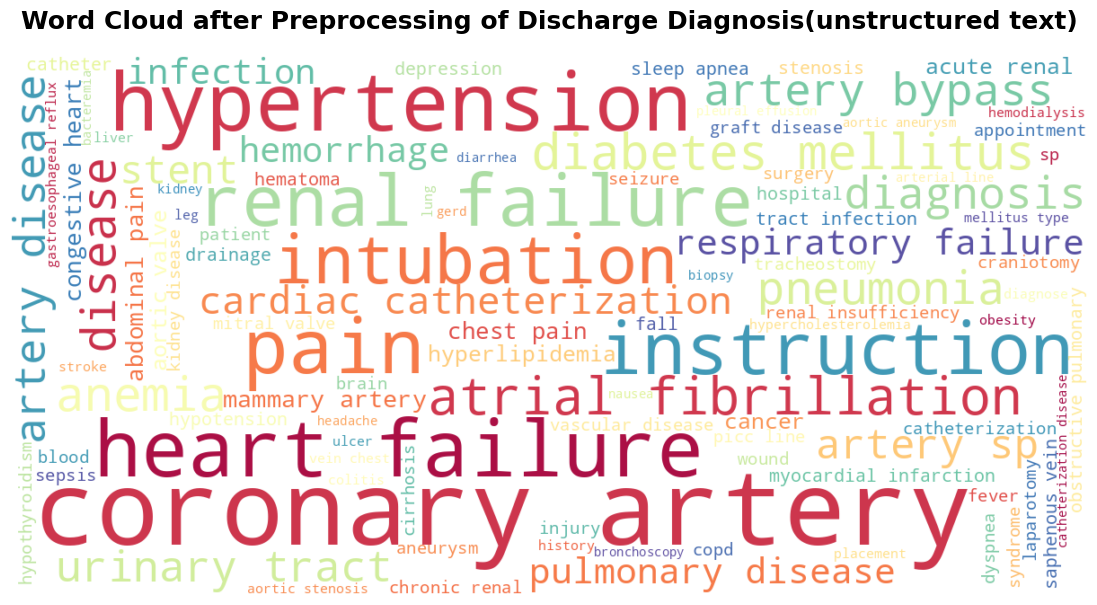

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure NER_MESH_entities column is a string type and remove NaN values
df_data['NER_MESH_entities'] = df_data['NER_MESH_entities'].astype(str)

# Combine all NER_MESH_entities into a single string
all_ner_entities = ' '.join(df_data['NER_MESH_entities'].tolist())

# Specify words to exclude from the word cloud( These words are filtered later during modelling)
exclude_words = {'ENTITY', 'PROCEDURE', 'PRIMARY', 'SECONDARY'}
# Generate the word cloud with enhanced aesthetics
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap='Spectral',  # Change color scheme for a more vibrant look
    stopwords=exclude_words,
    max_words=100,  # Limit to the top 100 words for clarity
    contour_color='black',  # Add a contour to words for better definition
    contour_width=2,
    random_state=42  # For reproducibility of the word layout
).generate(all_ner_entities)

# Plotting the enhanced word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud after Preprocessing of Discharge Diagnosis(unstructured text)', fontsize=18, fontweight='bold', pad=20)
plt.show()


## Relevant features (SELECTED)

In [ ]:
# List of columns you want to keep
columns_to_keep = ['SUBJECT_ID_diag', 'HADM_ID','GENDER',	'AGE_AT_ADMISSION' ,'ICD9_CODE_diag','filtered_text(stopwords_removed)', 'NER_MESH_entities', 'SHORT_TITLE_ICD9', 'LONG_TITLE_ICD9']

# Selecting only the columns you want to keep
df_data = df_data[columns_to_keep]

In [ ]:
df_data.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                                                                                                                                                                                                                                                                                                                                                                                                              filtered_text(stopwords_removed)                                                                                                                                                                                                                                                                                                                                                                                NER_MESH_entities          SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9
0              109   172335       0                24          40301                                                                                                                                                                                                                                                                                  [ 'primary hypertensive urgency transient hypotension due narcotic sciatica . ' , 'secondary end stage renal disease systemic lupus erythematosus anemia hip pain major surgical invasive procedure none ' ]                                                                                                                                                                                                                       [ENTITY:end stage renal disease] [ENTITY:systemic lupus erythematosus] [ENTITY:transient pain] [ENTITY:anemia] [ENTITY:hypertensive urgency disease] [ENTITY:hip narcotic]    Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease
1              109   173633       0                24          40301                                                                                                                                                      [ 'primary hypertensive urgency abdominal pain esrd hd svc thrombus secondary systemic lupus erythematosus malignant hypertension thrombocytopenia hocm anemia history left eye enucleation history vaginal bleeding thrombotic microangiopathy abdominal pain hypertension major surgical invasive procedure hemodialysis picc line ' ]                                                                [ENTITY:bleeding] [ENTITY:abdominal pain history] [ENTITY:malignant hypertension] [ENTITY:hypertensive urgency] [ENTITY:vaginal bleeding] [ENTITY:systemic lupus erythematosus] [ENTITY:procedure] [ENTITY:eye enucleation] [ENTITY:thrombus] [ENTITY:thrombotic microangiopathy pain] [ENTITY:anemia] [ENTITY:esrd hypertension]    Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease
2              115   114585       0                75           1940                                                                                                                                                                                                                                      [ ' r adrenal mass hepatic collection ivc thrombus malnutrition utiyeast pleural effusion arf resolve post menopausal bleed right adrenal tumor major surgical invasive procedure exploratory laparotomy right adrenalectomy right segment resection ' ]                                                                                                                                                                                                                                              [ENTITY:p

In [ ]:
df_data.to_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Final_data_before_modelling.csv',index= False)

In [ ]:
df_data = pd.read_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Final_data_before_modelling.csv')
df_data.head(1)

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                                                                                                                              filtered_text(stopwords_removed)                                                                                                                                                           NER_MESH_entities        SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9
0              109   172335       0                24          40301  [ 'primary hypertensive urgency transient hypotension due narcotic sciatica . ' , 'secondary end stage renal disease systemic lupus erythematosus anemia hip pain major surgical invasive procedure none ' ]  [ENTITY:end stage renal disease] [ENTITY:systemic lupus erythematosus] [ENTITY:transient pain] [ENTITY:anemia] [ENTITY:hypertensive urgency disease] [ENTITY:hip narcotic]  Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease

# **Computational Phenotyping pipelines**
Pipeline Overview
1. Determine the optimal number of topics or clusters.
2. Apply the chosen method.
3. Assign patients based on the optimal assignment strategy (max probability vs. membership distribution).
4. Analyze common characteristics of patients within each phenotypic group.

In [ ]:
df_data = pd.read_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Final_data_before_modelling.csv')
df_data.head(1)

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                                                                                                                              filtered_text(stopwords_removed)                                                                                                                                                           NER_MESH_entities        SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9
0              109   172335       0                24          40301  [ 'primary hypertensive urgency transient hypotension due narcotic sciatica . ' , 'secondary end stage renal disease systemic lupus erythematosus anemia hip pain major surgical invasive procedure none ' ]  [ENTITY:end stage renal disease] [ENTITY:systemic lupus erythematosus] [ENTITY:transient pain] [ENTITY:anemia] [ENTITY:hypertensive urgency disease] [ENTITY:hip narcotic]  Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease

EXTRACT DISESE ENTITIES

In [ ]:
def extract_disease_text(text):
    """Extracts the text within [ENTITY: ...] tags and joins them with commas."""
    matches = re.findall(r'\[ENTITY:(.*?)\]', text)  # Extract text within [ENTITY: ...] tags
    return ', '.join(matches)  # Join with commas

# Apply the function to the 'NER_MESH_entities' column
df_data['NER_MESH_entities'] = df_data['NER_MESH_entities'].apply(extract_disease_text)

# Display the updated DataFrame
df_data.head()

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                                                                                                                                                                                                                                                                                                                                                                                                              filtered_text(stopwords_removed)                                                                                                                                                                                                                                                       NER_MESH_entities          SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9
0              109   172335       0                24          40301                                                                                                                                                                                                                                                                                  [ 'primary hypertensive urgency transient hypotension due narcotic sciatica . ' , 'secondary end stage renal disease systemic lupus erythematosus anemia hip pain major surgical invasive procedure none ' ]                                                                                                                                               end stage renal disease, systemic lupus erythematosus, transient pain, anemia, hypertensive urgency disease, hip narcotic    Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease
1              109   173633       0                24          40301                                                                                                                                                      [ 'primary hypertensive urgency abdominal pain esrd hd svc thrombus secondary systemic lupus erythematosus malignant hypertension thrombocytopenia hocm anemia history left eye enucleation history vaginal bleeding thrombotic microangiopathy abdominal pain hypertension major surgical invasive procedure hemodialysis picc line ' ]                                        bleeding, abdominal pain history, malignant hypertension, hypertensive urgency, vaginal bleeding, systemic lupus erythematosus, procedure, eye enucleation, thrombus, thrombotic microangiopathy pain, anemia, esrd hypertension    Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease
2              115   114585       0                75           1940                                                                                                                                                                                                                                      [ ' r adrenal mass hepatic collection ivc thrombus malnutrition utiyeast pleural effusion arf resolve post menopausal bleed right adrenal tumor major surgical invasive procedure exploratory laparotomy right adrenalectomy right segment resection ' ]                                                                                                                                                                              procedure, thrombus, adrenalectomy, laparotomy, collection, pleural effusion, malnutrition      Malign neopl adrenal                                                                             Malignant neoplasm of adrenal gland
3              117   164853       0                49            570                                                                                                                                           

In [ ]:
df_data.to_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Final_data_before_modelling.csv', index=False)


# **Traditional Methods**

In [ ]:
df_data = pd.read_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Final_data_before_modelling.csv')

In [ ]:
df_data.head(1)

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                                                                                                                              filtered_text(stopwords_removed)                                                                                                          NER_MESH_entities        SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9
0              109   172335       0                24          40301  [ 'primary hypertensive urgency transient hypotension due narcotic sciatica . ' , 'secondary end stage renal disease systemic lupus erythematosus anemia hip pain major surgical invasive procedure none ' ]  end stage renal disease, systemic lupus erythematosus, transient pain, anemia, hypertensive urgency disease, hip narcotic  Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease

## 1.	Late Multimodal Fusion : TF-IDF
In this approach, we combine the clinical notes (NER_MESH_entities) and ICD descriptions (SHORT_TITLE_ICD9) into a single text block and use TF-IDF for vectorization. This combined text block is then used for topic modeling.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine 'NER_MESH_entities' and 'SHORT_TITLE_ICD9' into a single text block
df_data['combined_text'] = df_data['NER_MESH_entities'] + ', ' + df_data['SHORT_TITLE_ICD9']

# Vectorize the combined text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
combined_tfidf = vectorizer.fit_transform(df_data['combined_text'])

# Convert TF-IDF matrix to DataFrame for further analysis
tfidf_df = pd.DataFrame(combined_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# Display the prepared DataFrame for TF-IDF based methods
print(tfidf_df.head())


   1st  2nd   31  3rd  5th  6th   ab  abciximab  abd  abdmnal  abdom  abdomen  abdominal  abdominoperineal  abdominoplasty  ability  ablation  abn  abnorm  abnrml  abor  abort  abortion  abrasion  abruptio  ...  xenopi  xopenex  xray  xtrcorp  xtrndl  xyy  yeast  yellow  zantac  zenker  zetia  zocor  zofran  zolpidem  zone  zonegran  zoonotic  zoster  zosyn  zygoma  zygomatic  zygomycosis  zyprexa  zyrtec  zyvox
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0      0.0    0.0      0.0   0.000000               0.0             0.0      0.0       0.0  0.0     0.0     0.0   0.0    0.0       0.0       0.0       0.0  ...     0.0      0.0   0.0      0.0     0.0  0.0    0.0     0.0     0.0     0.0    0.0    0.0     0.0       0.0   0.0       0.0       0.0     0.0    0.0     0.0        0.0          0.0      0.0     0.0    0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0        0.0  0.0      0.0    0.0      0.0   0.112639               0.0             0.0      0.0       0.0  0.0     0.0     0.0   0.0

## **1. Latent Dirichlet Allocation (LDA) + TF-IDF**

### Step 1: Determine the Optimal Number of Topics

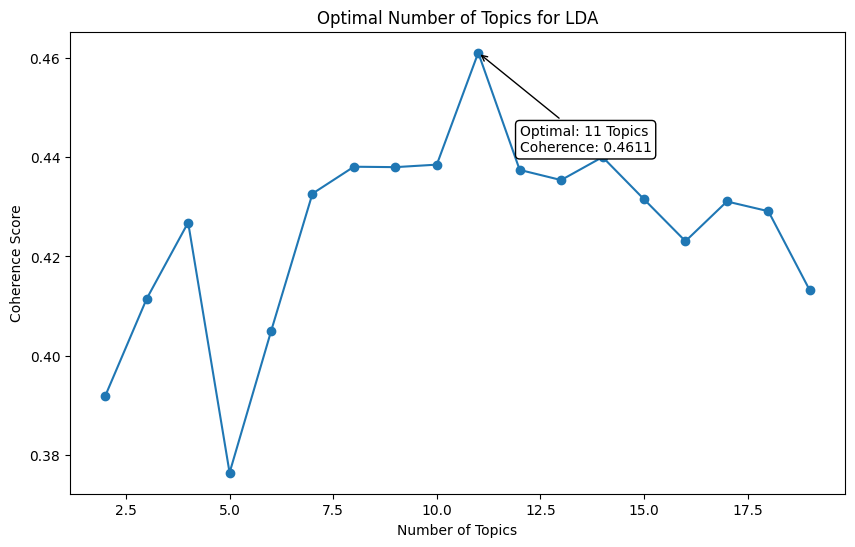

Optimal number of topics for LDA: 11


In [ ]:
import pandas as pd
from gensim.models import LdaModel, CoherenceModel
import gensim.corpora as corpora
import matplotlib.pyplot as plt

# Step 1: Combine NER_MESH_entities and SHORT_TITLE_ICD9 into a single text block, separated by a comma
df_data['combined_text'] = df_data['NER_MESH_entities'] + ', ' + df_data['SHORT_TITLE_ICD9']

# Prepare data for Gensim LDA
texts = df_data['combined_text'].tolist()

# Tokenize texts for LDA model
texts_tokenized = [text.split(', ') for text in texts]
dictionary = corpora.Dictionary(texts_tokenized)
corpus = [dictionary.doc2bow(text) for text in texts_tokenized]

# Function to calculate coherence score
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10)
        model_list.append(lda_model)

        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Determine the optimal number of topics
start, limit, step = 2, 20, 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts_tokenized, start, limit, step)

# Plot the coherence values
x = range(start, limit, step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for LDA")

# Annotate the highest point on the graph
max_coherence = max(coherence_values)
optimal_num_topics = start + step * coherence_values.index(max_coherence)
plt.annotate(f'Optimal: {optimal_num_topics} Topics\nCoherence: {max_coherence:.4f}',
             xy=(optimal_num_topics, max_coherence),
             xytext=(optimal_num_topics + 1, max_coherence - 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.show()

print(f'Optimal number of topics for LDA: {optimal_num_topics}')


### Step 2: Apply LDA with Optimal Number of Topics

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df_data and combined_tfidf are already defined
# df_data is the original DataFrame containing the text data
# combined_tfidf is the result of the TF-IDF vectorization

# Step 4: Apply LDA with the optimal number of topics (11 in this case)
optimal_num_topics = 11  # Optimal number of topics determined earlier
lda_model = LatentDirichletAllocation(n_components=optimal_num_topics, random_state=42)
lda_topic_distributions = lda_model.fit_transform(combined_tfidf)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Assuming df_data and combined_tfidf are already defined
# df_data is the original DataFrame containing the text data
# combined_tfidf is the result of the TF-IDF vectorization

# Step 4: Apply LDA with the optimal number of topics (11 in this case)
optimal_num_topics = 11  # Optimal number of topics determined earlier
lda_model = LatentDirichletAllocation(n_components=optimal_num_topics, random_state=42)
lda_topic_distributions = lda_model.fit_transform(combined_tfidf)

# Create a new DataFrame for LDA-specific results
df_lda = df_data.copy()

# Step 5: Add the topic distribution to the DataFrame
df_lda['LDA_topic_distribution'] = list(lda_topic_distributions)

# Step 6: Get the top words per topic
def get_top_words(model, feature_names, n_top_words):
    top_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_words[topic_idx] = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    return top_words

# Define the number of top words per topic
n_top_words = 10
# Assuming vectorizer is already defined as the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()
top_words = get_top_words(lda_model, feature_names, n_top_words)

# Display the top words per topic
print("Top words per topic:")
for topic_idx, words in top_words.items():
    print(f"Topic #{topic_idx}: {', '.join(words)}")

print('\n')

# Display topic distributions for each document
print("Document Topic Distributions:")
print(df_lda[['LDA_topic_distribution']].head())

# Export the DataFrame to a CSV file
df_lda.to_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/df_lda.csv', index=False)
df_lda.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top words per topic:
Topic #0: liver, cirrhosis, hepatitis, alcohol, procedure, encephalopathy, dev, transplant, alcoholic, oth
Topic #1: catheterization, infarction, initial, infarct, subendo, cardiac, pain, ami, myocardial, chest
Topic #2: hemorrhage, subdural, hem, intracerebral, hematoma, procedure, subarachnoid, ulcer, coma, headache
Topic #3: artery, coronary, disease, natve, vssl, athrscl, crnry, vein, bypass, graft
Topic #4: aortic, valve, mitral, aneurysm, disorder, stenosis, atrial, procedure, heart, fibrillation
Topic #5: cancer, neo, lung, tract, urinary, mal, cell, procedure, infection, brain
Topic #6: failure, pneumonia, septicemia, nos, intubation, acute, procedure, instruction, respiratry, respiratory
Topic #7: heart, failure, disease, renal, kidney, pulmonary, chronic, artery, diabetes, mellitus
Topic #8: stroke, crbl, infrct, ocl, art, artery, emblsm, carotid, cerebral, infrc
Topic #9: fracture, fx, rib, cl, injury, fall, wound, procedure, bone, closed
Topic #10: pain

SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                                                                                                                                                                                                                                                                                                                                                                                                              filtered_text(stopwords_removed)                                                                                                                                                                                                                                                       NER_MESH_entities          SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9                                                                                                                                                                                                                                                                                     combined_text                                                                                                                                                                                                                          LDA_topic_distribution
0              109   172335       0                24          40301                                                                                                                                                                                                                                                                                  [ 'primary hypertensive urgency transient hypotension due narcotic sciatica . ' , 'secondary end stage renal disease systemic lupus erythematosus anemia hip pain major surgical invasive procedure none ' ]                                                                                                                                               end stage renal disease, systemic lupus erythematosus, transient pain, anemia, hypertensive urgency disease, hip narcotic    Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease                                                                                                                                                 end stage renal disease, systemic lupus erythematosus, transient pain, anemia, hypertensive urgency disease, hip narcotic, Mal hyp kid w cr kid V      [0.6983819614195224, 0.018235657934992967, 0.018233444513705337, 0.0182341221055762, 0.01823307636524518, 0.018235355677151736, 0.018233849322810292, 0.01823458670239861, 0.07113942342479472, 0.08460289430655979, 0.018235628227242815]
1              109   173633       0                24          40301                                                                                                                                                      [ 'primary hypertensive urgency abdominal pain esrd hd svc thrombus secondary systemic lupus erythematosus malignant hypertension thrombocytopenia hocm anemia history left eye enucleation history vaginal bleeding thrombotic microangiopathy abdominal pain hypertension major surgical invasive procedure hemodialysis picc line ' ]                                        bleeding, abdominal pain history, malignant hypertension, hypertensive urgency, vaginal bleeding, systemic lupus erythematosus, procedure, eye enucleation, thrombus, thrombotic microangiopathy pain, anemia, esrd hypertension    Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease                                          bleeding, abdominal pain history, malignant hypertensio

### Step 3: Visualize Topic clusters

In [ ]:
import pyLDAvis
import pyLDAvis.lda_model  # Import the correct module for LDA model visualization

# Assuming lda_model, combined_tfidf, and vectorizer are already defined and lda_model is fitted

# Enable PyLDAvis in the notebook (only for Jupyter)
pyLDAvis.enable_notebook()

# Prepare the LDA visualization
lda_display = pyLDAvis.lda_model.prepare(lda_model, combined_tfidf, vectorizer, mds='tsne')

# Display the visualization
pyLDAvis.display(lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Step 4: KMeans Clustering on Topic Distributions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


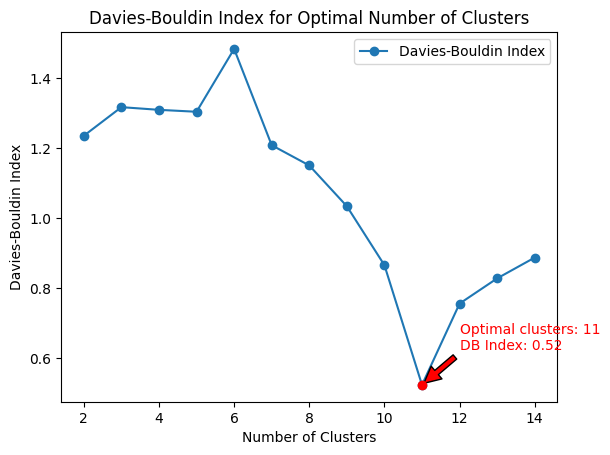

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Calculate Davies-Bouldin scores
db_scores = []
for i in range(2, 15):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(lda_topic_distributions)
    db_score = davies_bouldin_score(lda_topic_distributions, labels)
    db_scores.append(db_score)

# Plot Davies-Bouldin scores
plt.plot(range(2, 15), db_scores, marker='o', label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

# Highlight the point with the lowest Davies-Bouldin Index
optimal_clusters = range(2, 15)[db_scores.index(min(db_scores))]
plt.annotate(f'Optimal clusters: {optimal_clusters}\nDB Index: {min(db_scores):.2f}',
             xy=(optimal_clusters, min(db_scores)),
             xytext=(optimal_clusters+1, min(db_scores) + 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

plt.scatter(optimal_clusters, min(db_scores), color='red', zorder=5)
plt.legend()
plt.show()


In [ ]:
lda_topic_distributions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[0.69838196, 0.01823566, 0.01823344, ..., 0.07113942, 0.08460289,
        0.01823563],
       [0.69313383, 0.01620964, 0.01620977, ..., 0.01621003, 0.01620932,
        0.01621447],
       [0.02177324, 0.02177148, 0.02177448, ..., 0.02177189, 0.02177158,
        0.66365369],
       ...,
       [0.01993785, 0.17792137, 0.01994216, ..., 0.64263416, 0.01993832,
        0.01993733],
       [0.0267547 , 0.02675437, 0.02675562, ..., 0.0267535 , 0.02675647,
        0.02676556],
       [0.02773357, 0.02773311, 0.02773482, ..., 0.02773357, 0.02774274,
        0.23241734]])

In [ ]:
from sklearn.cluster import KMeans

# Step 9: Apply KMeans clustering with the optimal number of clusters
optimal_num_clusters = 11  # Replace with the number determined from the plots above
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
df_lda['Cluster'] = kmeans.fit_predict(lda_topic_distributions)

# Step 10: Analyze the clusters
print("Cluster Analysis:")
print(df_lda.groupby('Cluster')['LDA_topic_distribution'].apply(lambda x: x.mean()))

# Step 11: Save the clustered DataFrame
df_lda.to_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/df_lda_clustered.csv', index=False)
print("Clustered DataFrame saved.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster Analysis:
Cluster
0      [0.03669261264090245, 0.03751410924676773, 0.034725170438644176, 0.03767397269646447, 0.03613420437393006, 0.03817519963783325, 0.043124605066567796, 0.6383350928324338, 0.029732285164910572, 0.035808034905782854, 0.03208471299576362]
1         [0.03708630865093869, 0.03045683389567334, 0.0377723764019868, 0.037381458475051796, 0.04319866250858531, 0.05196522402798289, 0.04309556635673886, 0.042054569059676424, 0.029658289345382248, 0.0417840377849111, 0.6055466734930725]
2        [0.035254440882504026, 0.031639642135382874, 0.6266488676259384, 0.03795518227496606, 0.03250560982493653, 0.04351692945618212, 0.04363435330740094, 0.03958726308029563, 0.03264806981482922, 0.04049213845276287, 0.03611750314479872]
3       [0.03986521154123676, 0.033738396885117594, 0.039203536342717296, 0.04293741652713149, 0.04089093130738319, 0.048329652585327024, 0.6057860900031623, 0.04016998527768678, 0.03287243301871609, 0.03502421644283932, 0.04118213006868296]
4     

In [ ]:
df_lda.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                                                                                                                                                                                                                                                          filtered_text(stopwords_removed)                                                                                                                                                                                                                 NER_MESH_entities        SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9                                                                                                                                                                                                                                             combined_text                                                                                                                                                                                                                          LDA_topic_distribution  Cluster
0              109   172335       0                24          40301                                                                                                                              [ 'primary hypertensive urgency transient hypotension due narcotic sciatica . ' , 'secondary end stage renal disease systemic lupus erythematosus anemia hip pain major surgical invasive procedure none ' ]                                                                                                         end stage renal disease, systemic lupus erythematosus, transient pain, anemia, hypertensive urgency disease, hip narcotic  Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease                                                                                                         end stage renal disease, systemic lupus erythematosus, transient pain, anemia, hypertensive urgency disease, hip narcotic, Mal hyp kid w cr kid V      [0.6983819614195224, 0.018235657934992967, 0.018233444513705337, 0.0182341221055762, 0.01823307636524518, 0.018235355677151736, 0.018233849322810292, 0.01823458670239861, 0.07113942342479472, 0.08460289430655979, 0.018235628227242815]        6
1              109   173633       0                24          40301  [ 'primary hypertensive urgency abdominal pain esrd hd svc thrombus secondary systemic lupus erythematosus malignant hypertension thrombocytopenia hocm anemia history left eye enucleation history vaginal bleeding thrombotic microangiopathy abdominal pain hypertension major surgical invasive procedure hemodialysis picc line ' ]  bleeding, abdominal pain history, malignant hypertension, hypertensive urgency, vaginal bleeding, systemic lupus erythematosus, procedure, eye enucleation, thrombus, thrombotic microangiopathy pain, anemia, esrd hypertension  Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease  bleeding, abdominal pain history, malignant hypertension, hypertensive urgency, vaginal bleeding, systemic lupus erythematosus, procedure, eye enucleation, thrombus, thrombotic microangiopathy pain, anemia, esrd hypertension, Mal hyp kid w cr kid V    [0.6931338267714989, 0.01620963656915804, 0.016209765608344747, 0.016209873806593576, 0.01620979987341406, 0.16097373981750326, 0.016209858567461388, 0.016209684456680227, 0.01621003308384311, 0.016209315705014264, 0.016214465740488324]        6
2              115   114585       0                75           1940                                                                                  [ ' r adrenal mass hepatic collection ivc thrombus malnutrition utiyeast 

### **Cluster Analysis and Phenotype Identification:**

In [ ]:
# Analyze top topics within each cluster
for cluster_id in range(optimal_num_clusters):
    cluster_data = df_lda[df_lda['Cluster'] == cluster_id]

    # Mean topic distribution for the cluster
    mean_topic_dist = np.mean(np.vstack(cluster_data['LDA_topic_distribution'].values), axis=0)

    # Identify top topics
    top_topic_indices = mean_topic_dist.argsort()[-3:][::-1]  # Get top 3 topics

    print(f"Cluster {cluster_id}:")
    for topic_idx in top_topic_indices:
        print(f"  Top Topic {topic_idx}: {top_words[topic_idx]}")

Cluster 0:
  Top Topic 7: ['heart', 'failure', 'disease', 'renal', 'kidney', 'pulmonary', 'chronic', 'artery', 'diabetes', 'mellitus']
  Top Topic 6: ['failure', 'pneumonia', 'septicemia', 'nos', 'intubation', 'acute', 'procedure', 'instruction', 'respiratry', 'respiratory']
  Top Topic 5: ['cancer', 'neo', 'lung', 'tract', 'urinary', 'mal', 'cell', 'procedure', 'infection', 'brain']
Cluster 1:
  Top Topic 10: ['pain', 'hernia', 'abdominal', 'procedure', 'laparotomy', 'colon', 'dissection', 'lymph', 'fistula', 'colectomy']
  Top Topic 5: ['cancer', 'neo', 'lung', 'tract', 'urinary', 'mal', 'cell', 'procedure', 'infection', 'brain']
  Top Topic 4: ['aortic', 'valve', 'mitral', 'aneurysm', 'disorder', 'stenosis', 'atrial', 'procedure', 'heart', 'fibrillation']
Cluster 2:
  Top Topic 2: ['hemorrhage', 'subdural', 'hem', 'intracerebral', 'hematoma', 'procedure', 'subarachnoid', 'ulcer', 'coma', 'headache']
  Top Topic 6: ['failure', 'pneumonia', 'septicemia', 'nos', 'intubation', 'acute', 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster 0:

Top Topics: Heart failure, Respiratory failure, Cancer
Phenotype: Cardiopulmonary and Oncological Disorders
Description: This cluster seems to represent patients primarily dealing with heart failure and respiratory issues, alongside some oncological conditions.
Cluster 1:

Top Topics: Abdominal Pain, Cancer, Vascular Diseases
Phenotype: Abdominal and Vascular Conditions
Description: This cluster is characterized by conditions related to abdominal pain (hernia, laparotomy), cancer, and vascular diseases (aortic aneurysms, valve disorders).
Cluster 2:

Top Topics: Hemorrhage, Respiratory failure, Cancer
Phenotype: Neurological Hemorrhage and Respiratory Disorders
Description: Patients in this cluster likely present with intracranial hemorrhages and respiratory issues, often with some overlap in cancer-related conditions.
Cluster 3:

Top Topics: Respiratory failure, Cancer, Coronary Artery Disease
Phenotype: Respiratory and Cardiovascular Conditions
Description: This cluster indicates a patient group with both respiratory and cardiovascular conditions, and a notable presence of cancer.
Cluster 4:

Top Topics: Coronary Artery Disease, Myocardial Infarction, Heart Failure
Phenotype: Ischemic Heart Disease
Description: Primarily dealing with heart disease, this cluster groups patients with coronary artery disease and myocardial infarctions.
Cluster 5:

Top Topics: Stroke, Respiratory failure, Hemorrhage
Phenotype: Stroke and Respiratory Failure
Description: Focuses on neurological conditions (stroke) and respiratory failures.
Cluster 6:

Top Topics: Liver Disease, Cancer, Respiratory failure
Phenotype: Hepatic and Respiratory Disorders
Description: Patients with liver diseases (cirrhosis, hepatitis), cancer, and respiratory failures.
Cluster 7:

Top Topics: Cancer, Respiratory failure, Abdominal Pain
Phenotype: Oncological and Abdominal Disorders
Description: This group includes patients with cancer, respiratory issues, and abdominal conditions like hernia or abdominal pain.
Cluster 8:

Top Topics: Vascular Disorders, Coronary Artery Disease, Respiratory failure
Phenotype: Cardiovascular Disorders
Description: Focuses on various cardiovascular diseases, including coronary artery disease and valve disorders.
Cluster 9:

Top Topics: Fracture, Hemorrhage, Cancer
Phenotype: Trauma and Hemorrhagic Disorders
Description: Patients experiencing trauma-related fractures and hemorrhages, alongside cancer conditions.
Cluster 10:

Top Topics: Myocardial Infarction, Heart Failure, Coronary Artery Disease
Phenotype: Advanced Cardiac Disease
Description: This cluster represents patients with advanced stages of cardiac diseases, including myocardial infarctions and heart failure.

In [ ]:
# Define the cluster names based on your analysis, starting from 1
cluster_names = {
    1: 'Cardiopulmonary and Oncological Disorders',
    2: 'Abdominal and Vascular Conditions',
    3: 'Neurological Hemorrhage and Respiratory Disorders',
    4: 'Respiratory and Cardiovascular Conditions',
    5: 'Ischemic Heart Disease',
    6: 'Stroke and Respiratory Failure',
    7: 'Hepatic and Respiratory Disorders',
    8: 'Oncological and Abdominal Disorders',
    9: 'Cardiovascular Disorders',
    10: 'Trauma and Hemorrhagic Disorders',
    11: 'Advanced Cardiac Disease'
}

# Ensure the cluster numbers in df_lda['Cluster'] are correctly aligned to the 1-based indexing
df_lda['Cluster'] = df_lda['Cluster']   # Adjust clusters to start from 1

# Add a new column to the DataFrame with the cluster names
df_lda['Cluster_Names'] = df_lda['Cluster'].map(cluster_names)

# Display the updated DataFrame to verify the changes
print(df_lda[['Cluster', 'Cluster_Names']].head(14))

# Save the updated DataFrame to CSV
df_lda.to_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/df_lda_clustered_named.csv', index=False)
print("Updated DataFrame with cluster names saved.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    Cluster                              Cluster_Names
0         6             Stroke and Respiratory Failure
1         6             Stroke and Respiratory Failure
2         1  Cardiopulmonary and Oncological Disorders
3         6             Stroke and Respiratory Failure
4         4  Respiratory and Cardiovascular Conditions
5         8        Oncological and Abdominal Disorders
6         2          Abdominal and Vascular Conditions
7        10           Trauma and Hemorrhagic Disorders
8         4  Respiratory and Cardiovascular Conditions
9         1  Cardiopulmonary and Oncological Disorders
10       10           Trauma and Hemorrhagic Disorders
11        0                                        NaN
12        7          Hepatic and Respiratory Disorders
13        4  Respiratory and Cardiovascular Conditions
Updated DataFrame with cluster names saved.


Summary Statistics of each Cluster

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_lda is your DataFrame with the cluster information

# Define the cluster names based on your analysis, starting from 1
cluster_names = {
    1: 'Cardiopulmonary and Oncological Disorders',
    2: 'Abdominal and Vascular Conditions',
    3: 'Neurological Hemorrhage and Respiratory Disorders',
    4: 'Respiratory and Cardiovascular Conditions',
    5: 'Ischemic Heart Disease',
    6: 'Stroke and Respiratory Failure',
    7: 'Hepatic and Respiratory Disorders',
    8: 'Oncological and Abdominal Disorders',
    9: 'Cardiovascular Disorders',
    10: 'Trauma and Hemorrhagic Disorders',
    11: 'Advanced Cardiac Disease'
}

# Summary statistics for each cluster
cluster_summary = df_lda.groupby('Cluster').agg({
    'AGE_AT_ADMISSION': ['mean', 'std', 'min', 'max'],
    'GENDER': ['count', lambda x: (x == 0).mean() * 100, lambda x: (x == 1).mean() * 100],  # Female (0) and Male (1) percentage
    'ICD9_CODE_diag': lambda x: x.mode().iloc[0],   # Most common ICD9 code
    'SUBJECT_ID_diag': 'count'  # Number of patients in each cluster
}).reset_index()

# Flatten the multi-level column index
cluster_summary.columns = ['Cluster', 'Mean Age', 'Age StdDev', 'Min Age', 'Max Age', 'Gender Count', 'Female Percentage', 'Male Percentage', 'Most Common ICD9', 'Patient Count']

# Remove the extra 'Gender Count' column as it's redundant
cluster_summary = cluster_summary.drop('Gender Count', axis=1)

# Add Cluster_Names column by mapping cluster numbers to names
cluster_summary['Cluster_Names'] = cluster_summary['Cluster'].map(cluster_names)

# Reorder columns to place 'Cluster_Names' right after 'Cluster'
cluster_summary = cluster_summary[['Cluster', 'Cluster_Names', 'Mean Age', 'Age StdDev', 'Min Age', 'Max Age',
                                    'Female Percentage', 'Male Percentage', 'Most Common ICD9',
                                   'Patient Count']]

print("Cluster Summary Statistics:\n")
print(cluster_summary)


# Export the DataFrame to a CSV file
output_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/lda+kmeans_cluster_summary.csv'
cluster_summary.to_csv(output_path, index=False)

print(f"\nCluster summary exported to {output_path}")

Cluster Summary Statistics:

    Cluster                                      Cluster_Names   Mean Age  Age StdDev  Min Age  Max Age  Female Percentage  Male Percentage Most Common ICD9  Patient Count
0         1          Cardiopulmonary and Oncological Disorders  81.154031   59.908689       18      309          45.835558        54.164442             0389           3746
1         2                  Abdominal and Vascular Conditions  71.707039   50.914419       16      307          52.182462        47.817538             0389           2543
2         3  Neurological Hemorrhage and Respiratory Disorders  77.580032   57.242109        0      308          46.473851        53.526149              431           2524
3         4          Respiratory and Cardiovascular Conditions  79.779415   63.142300       17      310          45.291032        54.708968             0389           4003
4         5                             Ischemic Heart Disease  72.490008   36.693260       22      308        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_lda = pd.read_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/df_lda_clustered_named.csv')

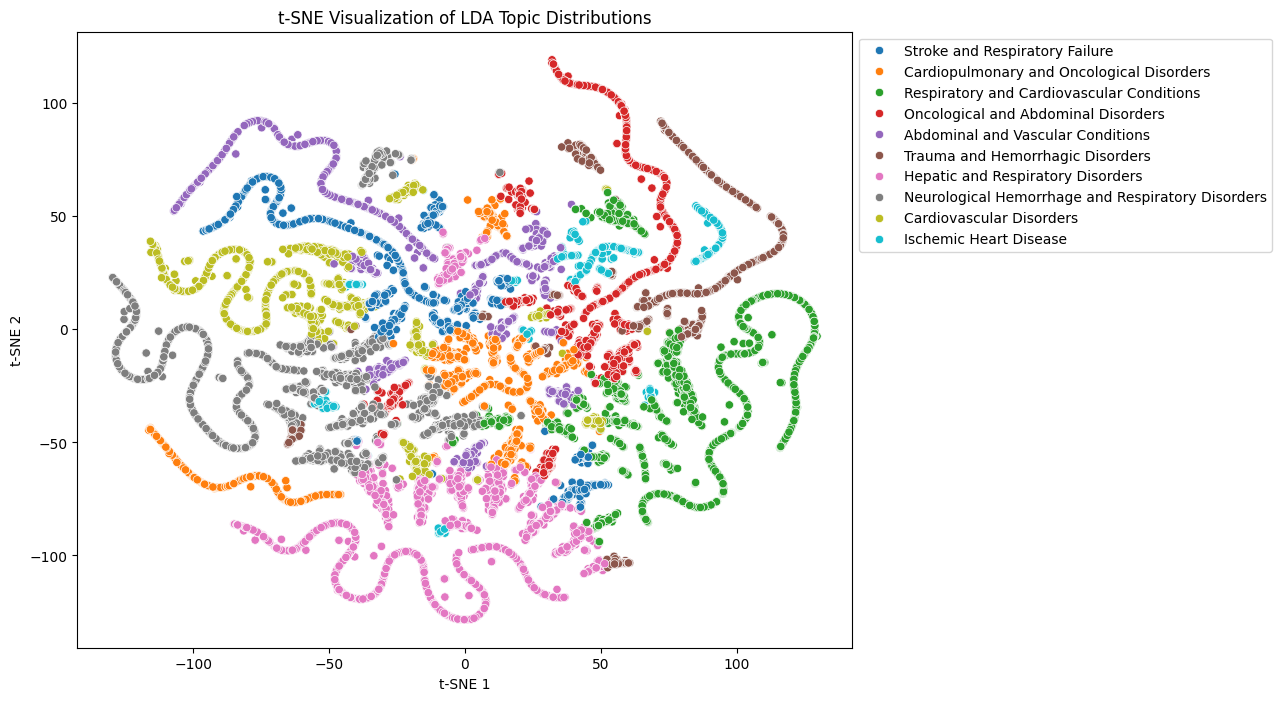

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
lda_tsne = tsne.fit_transform(np.vstack(lda_topic_distributions))

# Add t-SNE results to DataFrame
df_lda['tsne_1'] = lda_tsne[:, 0]
df_lda['tsne_2'] = lda_tsne[:, 1]

# Plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='Cluster_Names', data=df_lda,  palette='tab10', legend='full')
plt.title('t-SNE Visualization of LDA Topic Distributions')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()



Visualise Patients characteristics:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


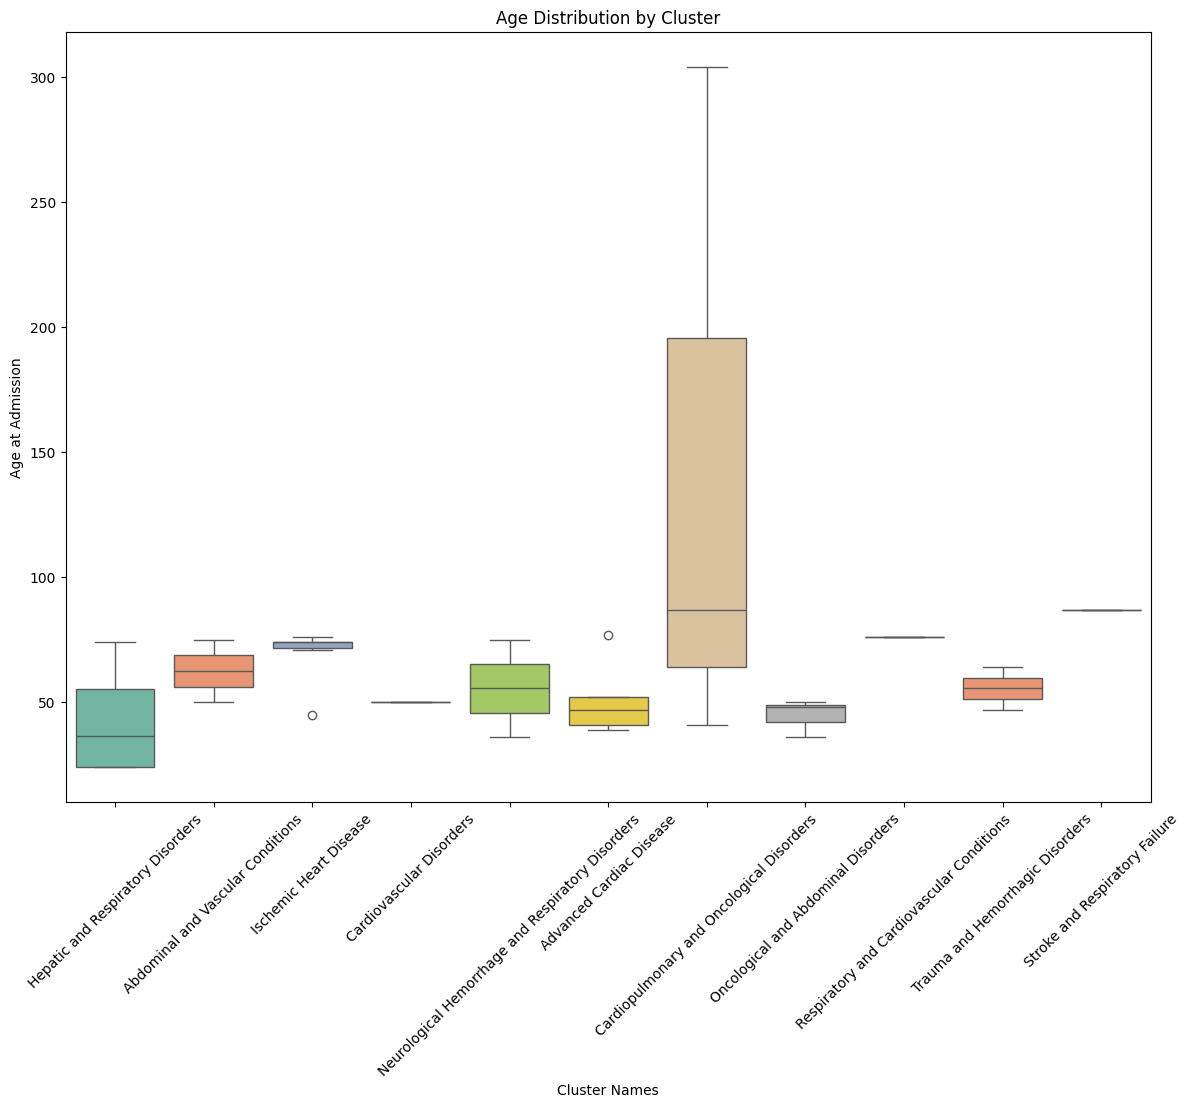

In [ ]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='Cluster_Names', y='AGE_AT_ADMISSION', data=df_lda, palette='Set2')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster Names')
plt.ylabel('Age at Admission')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


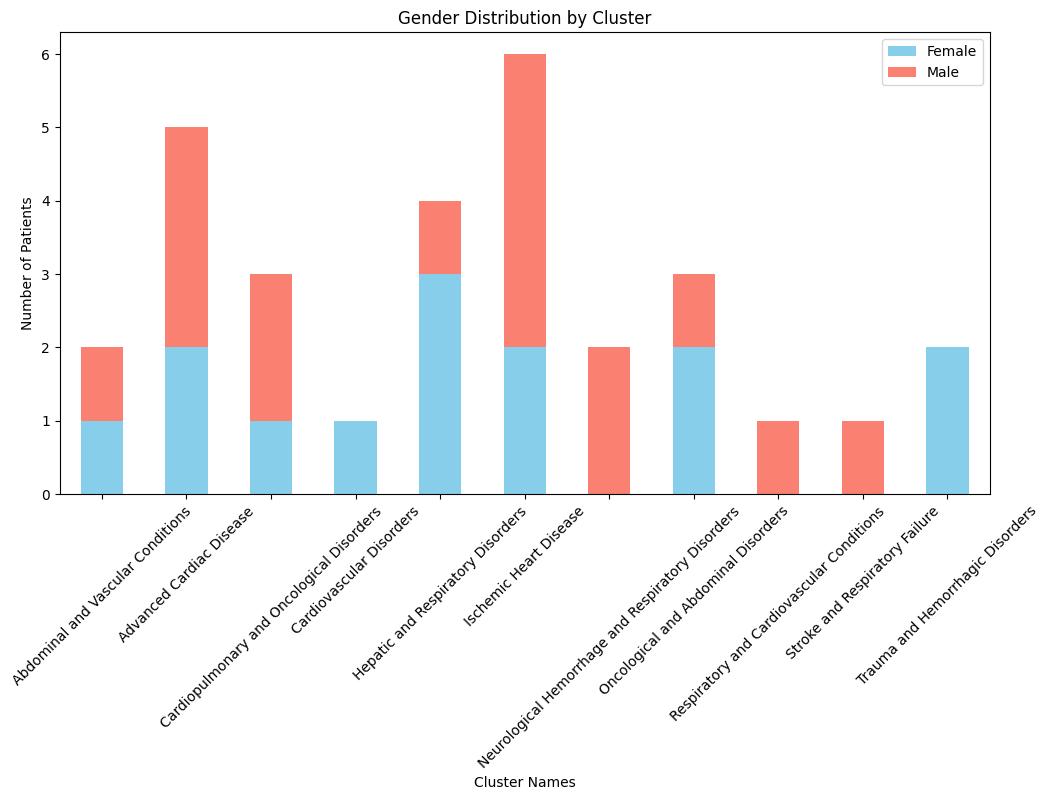

In [ ]:
gender_counts = df_lda.groupby(['Cluster_Names', 'GENDER']).size().unstack().fillna(0)

# Plot stacked bar chart for gender distribution
gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Gender Distribution by Cluster')
plt.xlabel('Cluster Names')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.legend(['Female', 'Male'])
plt.show()


### Evaluation Metrics :

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd
import numpy as np

def evaluate_lda_kmeans(lda_model, tfidf_matrix, vectorizer, df, cluster_labels, top_n_words=10, export_path='/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results'):
    """
    Evaluate LDA + KMeans clustering with various metrics and visualize clusters.

    Parameters:
    - lda_model: Trained LDA model.
    - tfidf_matrix: TF-IDF matrix used for LDA.
    - vectorizer: TF-IDF vectorizer used for feature extraction.
    - df: DataFrame containing original data and cluster assignments.
    - cluster_labels: Cluster labels for documents.
    - top_n_words: Number of top words to consider for topic coherence and diversity.
    - export_path: Path to save the evaluation results.

    Returns:
    - evaluation_results: Dictionary containing evaluation metrics.
    """

    # Initialize results dictionary
    evaluation_results = {}

    # 1. Topic Evaluation Section
    print("\n\033[1mTopic Evaluation Metrics:\033[0m")

    # Topic Coherence
    lda_topics = lda_model.components_
    feature_names = vectorizer.get_feature_names_out()
    top_words = [[feature_names[i] for i in topic.argsort()[-top_n_words:]] for topic in lda_topics]

    # Create a gensim Dictionary
    texts = [doc.split() for doc in df['combined_text']]
    gensim_dictionary = Dictionary(texts)

    coherence_model = CoherenceModel(topics=top_words, texts=texts,
                                     dictionary=gensim_dictionary, coherence='c_v')
    topic_coherence = coherence_model.get_coherence()
    evaluation_results['Topic Coherence'] = topic_coherence

    # Topic Diversity
    unique_words = set(word for topic in top_words for word in topic)
    total_words = sum(len(topic) for topic in top_words)
    topic_diversity = len(unique_words) / total_words
    evaluation_results['Topic Diversity'] = topic_diversity

    # Perplexity
    perplexity = lda_model.perplexity(tfidf_matrix)
    evaluation_results['Perplexity'] = perplexity

    # Print Topic Evaluation Metrics
    topic_evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index', columns=['Score'])
    print(topic_evaluation_df)

    # Export Topic Evaluation Metrics
    topic_evaluation_df.to_csv(f'{export_path}/lda+kmeans_topic_evaluation_metrics.csv')
    print(f"\n\033[92mTopic evaluation metrics exported to {export_path}/lda+kmeans_topic_evaluation_metrics.csv\033[0m")

    # 2. Phenotype Cluster Evaluation Section
    print("\n\033[1mPhenotype Cluster Evaluation Metrics:\033[0m")

    # Clustering Metrics
    cluster_metrics = {}
    cluster_metrics['Silhouette Score'] = silhouette_score(tfidf_matrix, cluster_labels)

    # Print Cluster Evaluation Metrics
    cluster_evaluation_df = pd.DataFrame.from_dict(cluster_metrics, orient='index', columns=['Score'])
    print(cluster_evaluation_df)

    # Export Cluster Evaluation Metrics
    cluster_evaluation_df.to_csv(f'{export_path}/lda+kmeans_cluster_evaluation_metrics.csv')
    print(f"\n\033[92mCluster evaluation metrics exported to {export_path}/lda+kmeans_cluster_evaluation_metrics.csv\033[0m")

    # # Visualization: t-SNE for Clustering
    # tsne = TSNE(n_components=2, random_state=42, init='random')
    # tsne_results = tsne.fit_transform(tfidf_matrix)

    # # Convert results to a DataFrame for Plotly
    # tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
    # tsne_df['Cluster'] = cluster_labels

    # # Interactive Plotly scatter plot for better visualization
    # fig = px.scatter(tsne_df, x='TSNE1', y='TSNE2', color='Cluster',
    #                  title='Clustering Visualization using t-SNE',
    #                  color_continuous_scale='Viridis', hover_data=['Cluster'])
    # fig.update_traces(marker=dict(size=8, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
    # fig.update_layout(showlegend=True, legend_title_text='Clusters',
    #                   title_font=dict(size=22, color='DarkSlateGrey'),
    #                   xaxis_title='t-SNE Dimension 1',
    #                   yaxis_title='t-SNE Dimension 2')

    # fig.show()

    return evaluation_results





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Assuming lda_model, tfidf_matrix, vectorizer, df_lda, and cluster_labels are defined
evaluation_results = evaluate_lda_kmeans(lda_model, combined_tfidf, vectorizer, df_lda, df_lda['Cluster'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Topic Evaluation Metrics:
                       Score
Topic Coherence     0.602548
Topic Diversity     0.890909
Perplexity       1653.108555

Topic evaluation metrics exported to /content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results/lda+kmeans_topic_evaluation_metrics.csv

Phenotype Cluster Evaluation Metrics:
                     Score
Silhouette Score  0.020614

Cluster evaluation metrics exported to /content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results/lda+kmeans_cluster_evaluation_metrics.csv


## **2. Non-negative Matrix Factorization (NMF) + TF-IDF**

### Step 1: Determine the Optimal Number of Topics


Optimal number of topics for NMF: 13


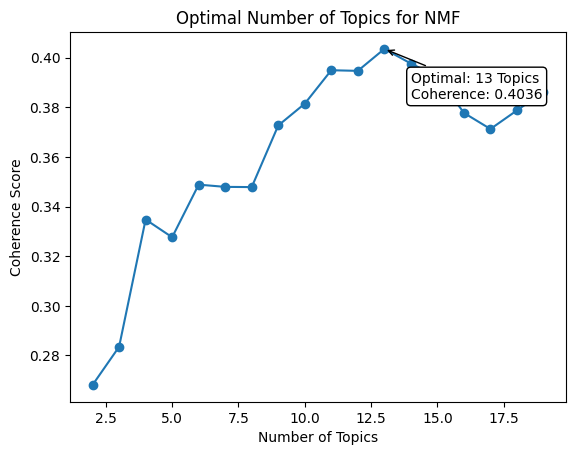

In [ ]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
import gensim.corpora as corpora

# combined_tfidf and vectorizer have already been defined as in your initial setup
# combined_tfidf = ...
# vectorizer = ...

# Function to compute NMF coherence values
def compute_nmf_coherence_values(vectorizer, X_tfidf, dictionary, texts, start, limit, step, max_iter=400, tol=1e-4):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        # Initialize and fit the NMF model
        nmf_model = NMF(n_components=num_topics, random_state=42, max_iter=max_iter, tol=tol)
        nmf_model.fit(X_tfidf)
        model_list.append(nmf_model)

        # Extract topics: convert the components into word lists
        topics = [[vectorizer.get_feature_names_out()[i]
                   for i in topic.argsort()[:-11:-1]]
                  for topic in nmf_model.components_]

        # Filter topics to include only words present in the dictionary
        valid_topics = [[word for word in topic if word in dictionary.token2id]
                        for topic in topics]

        # Check and remove empty topics if any
        valid_topics = [topic for topic in valid_topics if topic]

        # Continue only if there are valid topics left
        if not valid_topics:
            print(f"Skipping coherence calculation for {num_topics} topics due to no valid topics")
            coherence_values.append(0)
            continue

        # Compute coherence score using valid topics
        coherence_model = CoherenceModel(topics=valid_topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Prepare data for NMF and coherence model
texts_tokenized = [text.split(', ') for text in df_data['combined_text'].tolist()]
dictionary = corpora.Dictionary(texts_tokenized)
corpus = [dictionary.doc2bow(text) for text in texts_tokenized]

# Determine the optimal number of topics using the existing combined_tfidf matrix
start, limit, step = 2, 20, 1
model_list_nmf, coherence_values_nmf = compute_nmf_coherence_values(vectorizer, combined_tfidf, dictionary, texts_tokenized, start, limit, step)
optimal_num_topics_nmf = start + step * coherence_values_nmf.index(max(coherence_values_nmf))
print(f'Optimal number of topics for NMF: {optimal_num_topics_nmf}')

# Plot the coherence values
x = range(start, limit, step)
plt.plot(x, coherence_values_nmf, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Optimal Number of Topics for NMF")

# Annotate the highest point on the graph
max_coherence = max(coherence_values_nmf)
plt.annotate(f'Optimal: {optimal_num_topics_nmf} Topics\nCoherence: {max_coherence:.4f}',
             xy=(optimal_num_topics_nmf, max_coherence),
             xytext=(optimal_num_topics_nmf + 1, max_coherence - 0.02),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

plt.show()


### Step 2: Apply NMF with Optimal Number of Topics and Get Top Words per Topic

In [ ]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=13, random_state=42)
nmf_model

NMF(n_components=13, random_state=42)

In [ ]:
# Create a copy of df_data for NMF results
df_nmf = df_data.copy()

# Assign topics to documents based on max probability
df_nmf['NMF_topic_distribution'] = list(nmf_topic_distributions)
df_nmf['NMF_assigned_topic'] = nmf_topic_distributions.argmax(axis=1)


# Display the updated DataFrame with NMF results
print("Updated DataFrame with NMF results:\n")
print(df_nmf.head(), "\n")

# Save the DataFrame with NMF results if needed
df_nmf.to_csv(f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/df_nmf_results.csv', index=False)


Updated DataFrame with NMF results:

   SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                                                                                                                                                                                                                                                                                                                                                                                                              filtered_text(stopwords_removed)                                                                                                                                                                                                                                                       NER_MESH_entities          SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9               

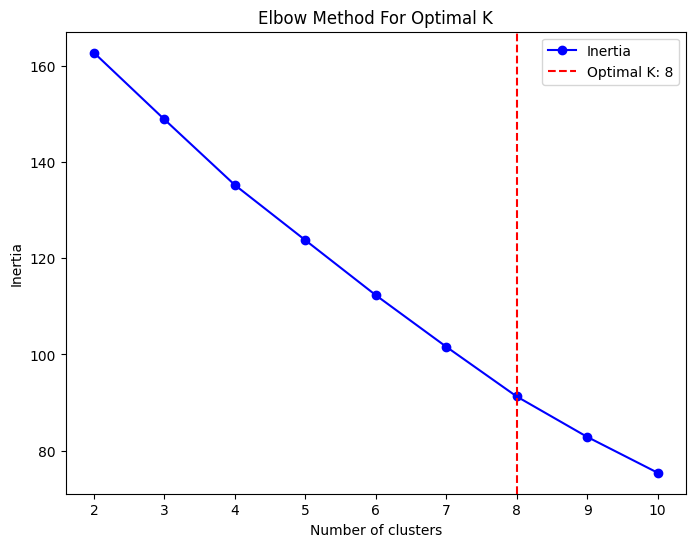

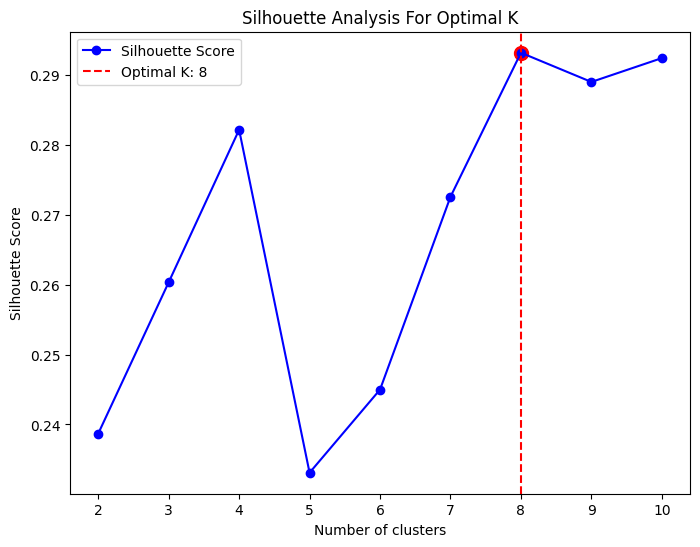

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize lists to store inertia and silhouette scores
inertia = []
silhouette_scores = []

# Range of cluster numbers to test
K = range(2, 11)  # Start from 2 to avoid the silhouette score error for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(nmf_topic_distributions)

    # Store inertia for elbow method
    inertia.append(kmeans.inertia_)

    # Calculate silhouette score only if k >= 2
    score = silhouette_score(nmf_topic_distributions, kmeans.labels_)
    silhouette_scores.append(score)

# Find the optimal number of clusters for Silhouette Score
optimal_k_silhouette = K[silhouette_scores.index(max(silhouette_scores))]

# Plot Elbow Method for Inertia
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-', label='Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.axvline(x=optimal_k_silhouette, color='r', linestyle='--', label=f'Optimal K: {optimal_k_silhouette}')
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, 'bo-', label='Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.axvline(x=optimal_k_silhouette, color='r', linestyle='--', label=f'Optimal K: {optimal_k_silhouette}')
plt.scatter(optimal_k_silhouette, max(silhouette_scores), color='red', s=100)  # Highlight the optimal point
plt.legend()
plt.show()


### **K-means Clustering**

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Apply KMeans Clustering on NMF Topic Distributions

# Define the number of clusters (you may choose this based on previous analyses or criteria)
num_clusters = 8  # Example: Choose 10 clusters, but you should determine this based on your data

# Apply KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_nmf['NMF_Cluster'] = kmeans.fit_predict(nmf_topic_distributions)




### 1. Analyze Top Topics for Each Cluster , Assign Clusters and Phenotype Identification

In [ ]:
# Step 1: Analyze Top Topics for Each Cluster

# Ensure top_words is defined with indices matching the NMF topics
top_words = get_top_words(nmf_model, feature_names, n_top_words)

# Create a DataFrame to store cluster analysis results
cluster_analysis = []

for cluster_id in range(num_clusters):
    # Subset the DataFrame for the current cluster
    cluster_data = df_nmf[df_nmf['NMF_Cluster'] == cluster_id]

    # Calculate the mean topic distribution for the cluster
    mean_topic_dist = np.mean(np.vstack(cluster_data['NMF_topic_distribution'].values), axis=0)

    # Identify the top topics for the cluster
    top_topic_indices = mean_topic_dist.argsort()[-3:][::-1]  # Get top 3 topics

    # Safely get the top words for each topic
    top_words_cluster = {idx: ', '.join(top_words[idx]) for idx in top_topic_indices if idx in top_words}

    # Count the number of patients in the cluster
    num_patients = len(cluster_data)

    # Store cluster analysis results
    cluster_analysis.append({
        'Cluster': cluster_id,
        'Number of Patients': num_patients,
        'Top Topics': top_topic_indices.tolist(),
        'Top Words': top_words_cluster
    })

# Convert to DataFrame for easier manipulation and visualization
cluster_analysis_df = pd.DataFrame(cluster_analysis)

# Display the results
print("Cluster Analysis:")
print(cluster_analysis_df)

# Optionally, save the cluster analysis results to a CSV file
cluster_analysis_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/nmf_cluster_analysis.csv'
cluster_analysis_df.to_csv(cluster_analysis_path, index=False)
print(f"Cluster analysis exported to: {cluster_analysis_path}")


Cluster Analysis:
   Cluster  Number of Patients   Top Topics                                                                                                                                                                                                                                                                                                                  Top Words
0        0                3533   [1, 6, 10]               {1: 'failure, heart, renal, acute, congestive, respiratry, respiratory, hrt, systolic, fail', 6: 'disease, pulmonary, obstructive, kidney, chronic, diabetes, mellitus, apnea, sleep, hypertension', 10: 'nos, septicemia, pneumonia, instruction, intubation, procedure, hypotension, sepsis, shock, line'}
1        1                2720   [0, 12, 9]                              {0: 'artery, coronary, vein, bypass, disease, mammary, graft, saphenous, internal, sp', 12: 'crnry, vssl, athrscl, natve, sp, chest, procedure, hyperlipidemia, catheterization, graft', 9: 'pa

In [ ]:
# Define the broad phenotype names for each cluster
phenotype_names = {
    0: "Chronic Cardiopulmonary and Renal Disorders",
    1: "Cardiovascular and Gastrointestinal Conditions",
    2: "Infectious Diseases and Oncological Conditions",
    3: "Neurological and Hemorrhagic Conditions",
    4: "Cerebrovascular and Infectious Disorders",
    5: "Cardiovascular and Pulmonary Disorders",
    6: "Renal and Infectious Conditions",
    7: "Cardiac and Gastrointestinal Conditions"
}


# Add the phenotype names to df_nmf
df_nmf['NMF_Phenotype_Name'] = df_nmf['NMF_Cluster'].map(phenotype_names)

# Display the updated DataFrame
print("Updated DataFrame with Phenotype Names:")

# Export the updated DataFrame to CSV
df_nmf_export_path = f'{base_path}BM7/Dissertation/Final_Datasets/Model_results/df_nmf_with_phenotype_names.csv'
df_nmf.to_csv(df_nmf_export_path, index=False)

# Add the phenotype names to the DataFrame
cluster_analysis_df['Phenotype Name'] = cluster_analysis_df['Cluster'].map(phenotype_names)

# Reorder columns to place 'Phenotype Name' after 'Cluster'
cluster_analysis_df = cluster_analysis_df[['Cluster', 'Phenotype Name', 'Number of Patients', 'Top Topics', 'Top Words']]

# Display the updated cluster analysis DataFrame
print("Updated Cluster Analysis with Phenotype Names:")
print(cluster_analysis_df)

# Export the updated cluster analysis DataFrame to a CSV file
cluster_analysis_export_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/nmf_cluster_analysis_with_phenotype_names.csv'
cluster_analysis_df.to_csv(cluster_analysis_export_path, index=False)

print(f"Cluster analysis with phenotype names exported to: {cluster_analysis_export_path}")


Updated DataFrame with Phenotype Names:
Updated Cluster Analysis with Phenotype Names:
   Cluster                                  Phenotype Name  Number of Patients   Top Topics                                                                                                                                                                                                                                                                                                                  Top Words
0        0     Chronic Cardiopulmonary and Renal Disorders                3533   [1, 6, 10]               {1: 'failure, heart, renal, acute, congestive, respiratry, respiratory, hrt, systolic, fail', 6: 'disease, pulmonary, obstructive, kidney, chronic, diabetes, mellitus, apnea, sleep, hypertension', 10: 'nos, septicemia, pneumonia, instruction, intubation, procedure, hypotension, sepsis, shock, line'}
1        1  Cardiovascular and Gastrointestinal Conditions                2720   [0, 12, 9]        

### 2. Cluster Summary Statistics


In [ ]:
# Step 2: Cluster Summary Statistics

# Calculate summary statistics for each cluster
cluster_summary = df_nmf.groupby('NMF_Cluster').agg({
    'AGE_AT_ADMISSION': ['mean', 'std', 'min', 'max'],
    'GENDER': ['count', lambda x: (x == 0).mean() * 100, lambda x: (x == 1).mean() * 100],  # Female (0) and Male (1) percentage
    'ICD9_CODE_diag': lambda x: x.mode().iloc[0],   # Most common ICD9 code
    'SUBJECT_ID_diag': 'count'  # Number of patients in each cluster
}).reset_index()

# Flatten the multi-level column index
cluster_summary.columns = ['Cluster', 'Mean Age', 'Age StdDev', 'Min Age', 'Max Age', 'Gender Count', 'Female Percentage', 'Male Percentage', 'Most Common ICD9', 'Patient Count']

# Remove the extra 'Gender Count' column as it's redundant
cluster_summary = cluster_summary.drop('Gender Count', axis=1)

print("\nCluster Summary Statistics:\n")
print(cluster_summary)

# Save the cluster summary to a CSV file
cluster_summary_save_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/nmf_kmeans_cluster_summary.csv'
cluster_summary.to_csv(cluster_summary_save_path, index=False)
print(f"\nCluster summary exported to {cluster_summary_save_path}")



Cluster Summary Statistics:

   Cluster   Mean Age  Age StdDev  Min Age  Max Age  Female Percentage  Male Percentage Most Common ICD9  Patient Count
0        0  85.333145   64.073055       17      308          43.617322        56.382678            51881           3533
1        1  70.681618   31.646681       25      306          24.963235        75.036765            41401           2720
2        2  70.190394   51.378372        0      310          45.490804        54.509196             0389          18052
3        3  84.057428   70.553556       17      305          35.705368        64.294632            85221            801
4        4  73.799410   48.825225       17      306          48.967552        51.032448              431           1017
5        5  74.265125   41.663822       21      309          41.416626        58.583374             4241           2033
6        6  91.774315   73.270423       17      309          60.056657        39.943343             0389           1059
7        7

### 3. Visualize Clusters and Topic Distributions




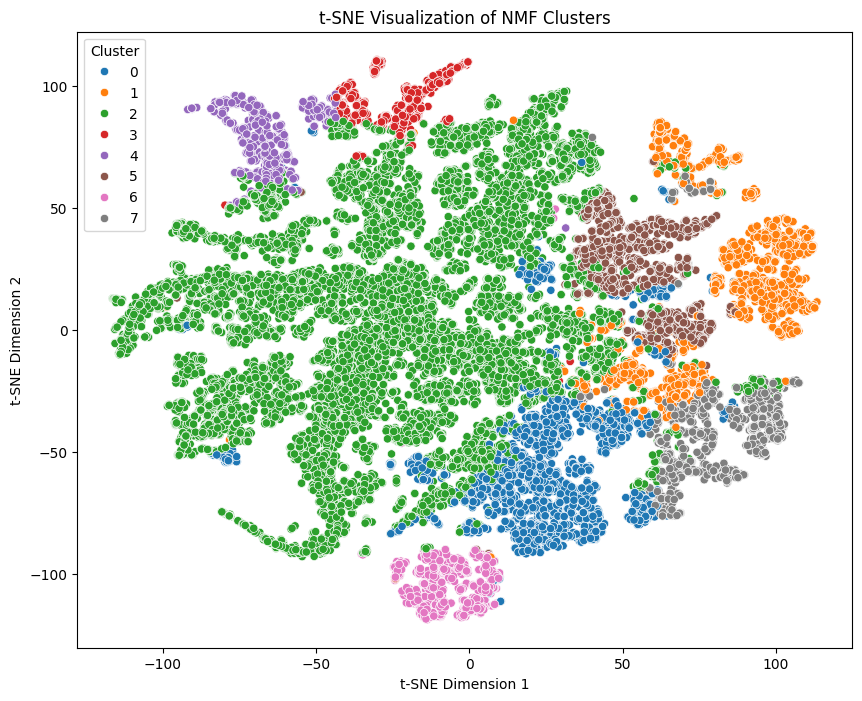

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Step 3: Visualize Clusters and Topic Distributions

# Apply t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(nmf_topic_distributions)

# Add t-SNE results to the DataFrame
df_nmf['tsne_1'] = tsne_results[:, 0]
df_nmf['tsne_2'] = tsne_results[:, 1]

# Plot t-SNE visualization with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne_1', y='tsne_2', hue='NMF_Cluster', data=df_nmf, palette='tab10', legend='full')
plt.title('t-SNE Visualization of NMF Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Cluster')
plt.show()



### Evaluation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from tabulate import tabulate
from termcolor import colored

def evaluate_nmf_kmeans(nmf_model, tfidf_matrix, df_nmf, combined_text, feature_names, output_path):
    """
    Evaluate NMF + KMeans model using various metrics and export results.

    Parameters:
    - nmf_model: Trained NMF model.
    - tfidf_matrix: TF-IDF matrix used for NMF.
    - df_nmf: DataFrame containing the data and assigned clusters.
    - combined_text: List of text data used in the NMF model.
    - feature_names: Feature names from the TF-IDF vectorizer.
    - output_path: Path to export the evaluation results.

    Returns:
    - evaluation_results: Dictionary containing evaluation metrics.
    """

    # Initialize results dictionary
    evaluation_results = {}

    # 1. Topic Coherence
    top_words_per_topic = [list(np.array(feature_names)[topic.argsort()[-10:]]) for topic in nmf_model.components_]
    texts = [doc.split() for doc in combined_text]
    dictionary = Dictionary(texts)

    coherence_model = CoherenceModel(topics=top_words_per_topic, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    evaluation_results['Topic Coherence'] = coherence_score

    # 2. Topic Diversity
    unique_words = set(word for topic in top_words_per_topic for word in topic)
    total_words = sum(len(topic) for topic in top_words_per_topic)
    topic_diversity = len(unique_words) / total_words
    evaluation_results['Topic Diversity'] = topic_diversity

    # 3. Clustering Metrics: Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index
    nmf_topic_distributions = np.array(df_nmf['NMF_topic_distribution'].tolist())
    cluster_labels = df_nmf['NMF_Cluster']

    evaluation_results['Silhouette Score'] = silhouette_score(nmf_topic_distributions, cluster_labels)
    evaluation_results['Davies-Bouldin Index'] = davies_bouldin_score(nmf_topic_distributions, cluster_labels)
    evaluation_results['Calinski-Harabasz Index'] = calinski_harabasz_score(nmf_topic_distributions, cluster_labels)

    # 4. Perplexity
    def compute_perplexity(probs):
        log_perplexity = -np.mean(np.log(np.clip(probs, 1e-10, 1)))  # Use log of probabilities
        perplexity = np.exp(log_perplexity)
        return perplexity

    evaluation_results['Perplexity'] = compute_perplexity(nmf_topic_distributions)

    # Beautify and print results
    print("\n\033[1mNMF + KMeans Model Evaluation Summary:\033[0m\n")

    # Create a table for display
    table = [[metric, f"{score:.4f}"] for metric, score in evaluation_results.items()]
    print(tabulate(table, headers=['Metric', 'Score'], tablefmt='fancy_grid', colalign=("left", "right")))

    # Convert results to a DataFrame for export
    evaluation_df = pd.DataFrame(list(evaluation_results.items()), columns=['Metric', 'Score'])

    # Export the results to CSV
    evaluation_df.to_csv(output_path, index=False)
    print(colored(f"\nEvaluation results exported to {output_path}", 'green'))

    return evaluation_results

# Example usage:
output_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/nmf_evaluation_results.csv'
evaluation_results = evaluate_nmf_kmeans(nmf_model, combined_tfidf, df_nmf, df_data['combined_text'].tolist(), feature_names, output_path)



NMF + KMeans Model Evaluation Summary:

╒═════════════════════════╤═════════╕
│ Metric                  │   Score │
╞═════════════════════════╪═════════╡
│ Topic Coherence         │  0.6604 │
├─────────────────────────┼─────────┤
│ Topic Diversity         │  0.8846 │
├─────────────────────────┼─────────┤
│ Silhouette Score        │  0.2932 │
├─────────────────────────┼─────────┤
│ Davies-Bouldin Index    │   1.137 │
├─────────────────────────┼─────────┤
│ Calinski-Harabasz Index │ 4298.16 │
├─────────────────────────┼─────────┤
│ Perplexity              │  810531 │
╘═════════════════════════╧═════════╛

Evaluation results exported to /content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results/nmf_evaluation_results.csv


# **Advanced Deep-Learning Methods**

In [ ]:
df_data.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                                                                                                                              filtered_text(stopwords_removed)                                                                                                          NER_MESH_entities        SHORT_TITLE_ICD9                                                                                                 LONG_TITLE_ICD9                                                                                                                                      combined_text
0              109   172335       0                24          40301  [ 'primary hypertensive urgency transient hypotension due narcotic sciatica . ' , 'secondary end stage renal disease systemic lupus erythematosus anemia hip pain major surgical invasive procedure none ' ]  end stage renal disease, systemic lupus erythematosus, transient pain, anemia, hypertensive urgency disease, hip narcotic  Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease stage V or end stage renal disease  end stage renal disease, systemic lupus erythematosus, transient pain, anemia, hypertensive urgency disease, hip narcotic, Mal hyp kid w cr kid V

## 2.	Late Multimodal Fusion : Neural Word Embeddings (ClinicalBERT)

For embedding-based modeling, we'll generate embeddings for both NER_MESH_entities and SHORT_TITLE_ICD9 using ClinicalBERT. These embeddings will be concatenated to form a combined representation for each record, which can be used for topic modeling.


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.preprocessing import normalize

# Ensure you're running in an environment where GPU is available for PyTorch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load ClinicalBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT").to(device)

# Function to generate embeddings using ClinicalBERT
def generate_embeddings(texts):
    embeddings = []
    with torch.no_grad():
        for text in texts:
            # Tokenize and encode the text
            inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True).to(device)
            outputs = model(**inputs)

            # Get the embeddings from the last hidden state
            last_hidden_state = outputs.last_hidden_state

            # Take the mean of the token embeddings for each sentence (global representation)
            sentence_embedding = last_hidden_state.mean(dim=1)

            # Convert to CPU and detach
            embeddings.append(sentence_embedding.cpu().detach().numpy())

    return embeddings

# Generate embeddings for NER_MESH_entities and SHORT_TITLE_ICD9 separately
ner_embeddings = generate_embeddings(df_data['NER_MESH_entities'].tolist())
icd_embeddings = generate_embeddings(df_data['SHORT_TITLE_ICD9'].tolist())

# Concatenate the embeddings for each modality
combined_embeddings = [torch.cat((torch.tensor(ner), torch.tensor(icd)), dim=1) for ner, icd in zip(ner_embeddings, icd_embeddings)]

# Convert the combined embeddings to a DataFrame for further analysis
combined_embeddings_df = pd.DataFrame(torch.vstack(combined_embeddings).numpy())

# Normalize the embeddings
combined_embeddings_df = pd.DataFrame(normalize(combined_embeddings_df))

# Display the prepared DataFrame for embedding-based methods
print(combined_embeddings_df.head())


**Export the embeddings**

In [ ]:
# Save the embeddings to a file
torch.save(combined_embeddings, '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Embeddings/combined_embeddings.pt')

**Load the embeddings**

In [ ]:
import torch

# Load the embeddings from the file
combined_embeddings = torch.load('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Embeddings/combined_embeddings.pt')


Step 1: Load clinicalBERT and Prepare Data

## **3. BERTopic with ClinicalBERT Embeddings**

1. **Print the Total Number of Topics:** Displays the total number of topics excluding outliers (-1).
2. **Topic Information**: Prints the detailed topic information using topic_model.get_topic_info().
3. T**op Words for Each Topic**: Retrieves and displays the top words for each topic.
4. **Count of Patients Assigned to Each Topic**: Shows the number of patients assigned to each topic, which is useful for analyzing phenotypic groups.
5. **Distribution of Topics Among Patients:** Provides the distribution of topics among patients as a percentage.

### Finding Optimal Parameters

In [ ]:
import numpy as np
import pandas as pd
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import torch
import pickle
from itertools import product

# Create a copy of df_data to work with for BERTopic results
df_bertopic_tuning = df_data.copy()

# Load combined embeddings from your saved file
combined_embeddings_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Embeddings/combined_embeddings.pt'
combined_embeddings = torch.load(combined_embeddings_path)

# Convert list of tensors to numpy array for BERTopic
combined_embeddings_np = np.vstack([embedding.numpy() for embedding in combined_embeddings])

# Prepare combined text data using the 'combined_text' column
texts_for_bertopic = df_data['combined_text'].tolist()

# Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=800, min_samples=200, Coherence: 0.6451

# Define a grid of hyperparameters to try
param_grid = {
    'umap_n_neighbors': [50],
    'umap_min_dist': [0.1],  # Reduced for quicker runs
    'hdbscan_min_cluster_size': [1000,1200],  # Reduced for quicker runs
    'hdbscan_min_samples': [200]
}

# Initialize variables to store the best model and results
best_model = None
best_score = -np.inf
best_params = {}
results = []

# Generate all combinations of hyperparameters
all_combinations = list(product(*param_grid.values()))

# Perform grid search
for params in all_combinations:
    n_neighbors, min_dist, min_cluster_size, min_samples = params

    # Initialize UMAP and HDBSCAN with current parameters
    umap_model = UMAP(n_neighbors=n_neighbors, n_components=5, min_dist=min_dist, metric='cosine', random_state=42)
    hdbscan_model = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, cluster_selection_epsilon=0.01, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

    # Initialize BERTopic model
    topic_model = BERTopic(
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        calculate_probabilities=True,
        top_n_words = 10,
        min_topic_size = 100,
        verbose=True
    )

    # Fit the model
    topics, probs = topic_model.fit_transform(texts_for_bertopic, embeddings=combined_embeddings_np)

    # # Update the df_bertopic with new topics and probabilities
    # df_bertopic_tuning['BERTopic_Assigned_Topic'] = topics
    # df_bertopic_tuning['Topic_Probabilities'] = probs.tolist()

    # Prepare data for coherence calculation
    top_words_per_topic = [[word for word, _ in topic_model.get_topic(topic)] for topic in topic_model.get_topic_freq().Topic]
    texts = [doc.split() for doc in df_data['combined_text'].tolist()]
    dictionary = Dictionary(texts)
    topics_ids = [[dictionary.token2id[word] for word in topic if word in dictionary.token2id] for topic in top_words_per_topic]

    # Calculate coherence
    coherence_model = CoherenceModel(topics=topics_ids, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Print the current parameter combination and coherence score
    print(f"Parameters: n_neighbors={n_neighbors}, min_dist={min_dist}, min_cluster_size={min_cluster_size}, min_samples={min_samples}, Coherence: {coherence_score:.4f}")

    # Store the results
    results.append({
        'n_neighbors': n_neighbors,
        'min_dist': min_dist,
        'min_cluster_size': min_cluster_size,
        'min_samples': min_samples,
        'coherence_score': coherence_score
    })

    # Update the best model if the current one is better
    if coherence_score > best_score:
        best_score = coherence_score
        best_model = topic_model
        best_params = {
            'n_neighbors': n_neighbors,
            'min_dist': min_dist,
            'min_cluster_size': min_cluster_size,
            'min_samples': min_samples
        }

# Display the best results
print(f"Best Parameters: {best_params}")
print(f"Best Coherence Score: {best_score:.4f}")

# # Save the best BERTopic model
# best_model_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Saved_models/best_bertopic_model.pkl'
# with open(best_model_path, 'wb') as f:
#     pickle.dump(best_model, f)
# print(f"\nBest BERTopic model saved to {best_model_path}")

# # Export results to a CSV file for further analysis if needed
# results_df = pd.DataFrame(results)
# results_df.to_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results/bertopic_hyperparameter_tuning_results.csv', index=False)
# print("\nHyperparameter tuning results exported to CSV.")


2024-08-31 17:34:00,366 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-31 17:35:58,589 - BERTopic - Dimensionality - Completed ✓
2024-08-31 17:35:58,594 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 17:36:12,601 - BERTopic - Cluster - Completed ✓
2024-08-31 17:36:12,617 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 17:36:13,375 - BERTopic - Representation - Completed ✓
2024-08-31 17:36:15,464 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=1000, min_samples=200, Coherence: 0.6298


2024-08-31 17:38:16,036 - BERTopic - Dimensionality - Completed ✓
2024-08-31 17:38:16,039 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 17:38:25,763 - BERTopic - Cluster - Completed ✓
2024-08-31 17:38:25,784 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 17:38:26,941 - BERTopic - Representation - Completed ✓


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=1200, min_samples=200, Coherence: 0.6565
Best Parameters: {'n_neighbors': 50, 'min_dist': 0.1, 'min_cluster_size': 1200, 'min_samples': 200}
Best Coherence Score: 0.6565


In [ ]:
import numpy as np
import pandas as pd
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import torch
import pickle

# Create a copy of df_data to work with for BERTopic results
df_bertopic_tuning = df_data.copy()

# Load combined embeddings from your saved file
combined_embeddings_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Embeddings/combined_embeddings.pt'
combined_embeddings = torch.load(combined_embeddings_path)

# Convert list of tensors to numpy array for BERTopic
combined_embeddings_np = np.vstack([embedding.numpy() for embedding in combined_embeddings])

# Prepare combined text data using the 'combined_text' column
texts_for_bertopic = df_data['combined_text'].tolist()

# Define a grid of hyperparameters to try
umap_n_neighbors = [15, 30, 50]
umap_min_dist = [0.0, 0.1]  # 3, 0.2
hdbscan_min_cluster_size = [400, 500, 1000] #1500
hdbscan_min_samples = [100, 150, 200]

# Initialize variables to store the best model and results
best_model = None
best_score = -np.inf
best_params = {}
results = []

# Perform grid search
for n_neighbors in umap_n_neighbors:
    for min_dist in umap_min_dist:
        for min_cluster_size in hdbscan_min_cluster_size:
            for min_samples in hdbscan_min_samples:
                # Initialize UMAP and HDBSCAN with current parameters
                umap_model = UMAP(n_neighbors=n_neighbors, n_components=5, min_dist=min_dist, metric='cosine', random_state=42)
                hdbscan_model = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, cluster_selection_epsilon=0.01, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

                # Initialize BERTopic model
                topic_model = BERTopic(
                    umap_model=umap_model,
                    hdbscan_model=hdbscan_model,
                    calculate_probabilities=True,
                    verbose=False
                    #top_n_words=20,
                    #min_topic_size = 10
                    )

                # Fit the model
                topics, probs = topic_model.fit_transform(texts_for_bertopic, embeddings=combined_embeddings_np)

                # Update the df_bertopic with new topics and probabilities
                df_bertopic_tuning['BERTopic_Assigned_Topic'] = topics
                df_bertopic_tuning['Topic_Probabilities'] = probs.tolist()

                # Evaluate the model
                evaluation_results = evaluate_bertopic(topic_model, df_bertopic_tuning, df_data['combined_text'].tolist())

                # Extract the coherence score for comparison
                coherence_score = evaluation_results['Topic Coherence']

                # Store the results
                results.append({
                    'n_neighbors': n_neighbors,
                    'min_dist': min_dist,
                    'min_cluster_size': min_cluster_size,
                    'min_samples': min_samples,
                    'coherence_score': coherence_score,
                    'evaluation_results': evaluation_results
                })

                # Update the best model if the current one is better
                if coherence_score > best_score:
                    best_score = coherence_score
                    best_model = topic_model
                    best_params = {
                        'n_neighbors': n_neighbors,
                        'min_dist': min_dist,
                        'min_cluster_size': min_cluster_size,
                        'min_samples': min_samples
                    }

# Display the best results
print(f"Best Parameters: {best_params}")
print(f"Best Coherence Score: {best_score}")
print("Evaluation Results for the Best Model:")
for metric, score in evaluation_results.items():
    print(f"{metric}: {score:.4f}")

# Save the best BERTopic model
best_model_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Saved_models/best_bertopic_model.pkl'
with open(best_model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"\nBest BERTopic model saved to {best_model_path}")

# Export results to a CSV file for further analysis if needed
results_df = pd.DataFrame(results)
results_df.to_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results/bertopic_hyperparameter_tuning_results.csv', index=False)
print("\nHyperparameter tuning results exported to CSV.")


In [ ]:
import numpy as np
import pandas as pd
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import torch
import pickle
from itertools import product

# Create a copy of df_data to work with for BERTopic results
df_bertopic_tuning = df_data.copy()

# Load combined embeddings from your saved file
combined_embeddings_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Embeddings/combined_embeddings.pt'
combined_embeddings = torch.load(combined_embeddings_path)

# Convert list of tensors to numpy array for BERTopic
combined_embeddings_np = np.vstack([embedding.numpy() for embedding in combined_embeddings])

# Prepare combined text data using the 'combined_text' column
texts_for_bertopic = df_data['combined_text'].tolist()

# Define a grid of hyperparameters to try
param_grid = {
    'umap_n_neighbors': [15, 30, 50],
    'umap_min_dist': [0.0, 0.1],  # Reduced for quicker runs
    'hdbscan_min_cluster_size': [400, 500, 800, 1000],  # Reduced for quicker runs
    'hdbscan_min_samples': [100, 150, 200]
}

# Initialize variables to store the best model and results
best_model = None
best_score = -np.inf
best_params = {}
results = []

# Generate all combinations of hyperparameters
all_combinations = list(product(*param_grid.values()))

# Perform grid search
for params in all_combinations:
    n_neighbors, min_dist, min_cluster_size, min_samples = params

    # Initialize UMAP and HDBSCAN with current parameters
    umap_model = UMAP(n_neighbors=n_neighbors, n_components=5, min_dist=min_dist, metric='cosine', random_state=42)
    hdbscan_model = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, cluster_selection_epsilon=0.01, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

    # Initialize BERTopic model
    topic_model = BERTopic(
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        calculate_probabilities=True,
        verbose=True
    )

    # Fit the model
    topics, probs = topic_model.fit_transform(texts_for_bertopic, embeddings=combined_embeddings_np)

    # # Update the df_bertopic with new topics and probabilities
    # df_bertopic_tuning['BERTopic_Assigned_Topic'] = topics
    # df_bertopic_tuning['Topic_Probabilities'] = probs.tolist()

    # Prepare data for coherence calculation
    top_words_per_topic = [[word for word, _ in topic_model.get_topic(topic)] for topic in topic_model.get_topic_freq().Topic]
    texts = [doc.split() for doc in df_data['combined_text'].tolist()]
    dictionary = Dictionary(texts)
    topics_ids = [[dictionary.token2id[word] for word in topic if word in dictionary.token2id] for topic in top_words_per_topic]

    # Calculate coherence
    coherence_model = CoherenceModel(topics=topics_ids, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Print the current parameter combination and coherence score
    print(f"Parameters: n_neighbors={n_neighbors}, min_dist={min_dist}, min_cluster_size={min_cluster_size}, min_samples={min_samples}, Coherence: {coherence_score:.4f}")

    # Store the results
    results.append({
        'n_neighbors': n_neighbors,
        'min_dist': min_dist,
        'min_cluster_size': min_cluster_size,
        'min_samples': min_samples,
        'coherence_score': coherence_score
    })

    # Update the best model if the current one is better
    if coherence_score > best_score:
        best_score = coherence_score
        best_model = topic_model
        best_params = {
            'n_neighbors': n_neighbors,
            'min_dist': min_dist,
            'min_cluster_size': min_cluster_size,
            'min_samples': min_samples
        }

# Display the best results
print(f"Best Parameters: {best_params}")
print(f"Best Coherence Score: {best_score:.4f}")

# Save the best BERTopic model
best_model_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Saved_models/best_bertopic_model.pkl'
with open(best_model_path, 'wb') as f:
    pickle.dump(best_model, f)
print(f"\nBest BERTopic model saved to {best_model_path}")

# # Export results to a CSV file for further analysis if needed
# results_df = pd.DataFrame(results)
# results_df.to_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results/bertopic_hyperparameter_tuning_results.csv', index=False)
# print("\nHyperparameter tuning results exported to CSV.")


2024-08-31 10:47:14,554 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-31 10:48:16,343 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:48:16,346 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:48:30,044 - BERTopic - Cluster - Completed ✓
2024-08-31 10:48:30,069 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:48:31,204 - BERTopic - Representation - Completed ✓
2024-08-31 10:48:35,202 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=400, min_samples=100, Coherence: 0.5363


2024-08-31 10:49:33,723 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:49:33,729 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:49:45,939 - BERTopic - Cluster - Completed ✓
2024-08-31 10:49:45,953 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:49:46,608 - BERTopic - Representation - Completed ✓
2024-08-31 10:49:49,381 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=400, min_samples=150, Coherence: 0.5529


2024-08-31 10:50:46,988 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:50:46,994 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:51:00,392 - BERTopic - Cluster - Completed ✓
2024-08-31 10:51:00,406 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:51:01,075 - BERTopic - Representation - Completed ✓
2024-08-31 10:51:03,793 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=400, min_samples=200, Coherence: 0.5645


2024-08-31 10:52:09,210 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:52:09,214 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:52:18,449 - BERTopic - Cluster - Completed ✓
2024-08-31 10:52:18,470 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:52:19,584 - BERTopic - Representation - Completed ✓
2024-08-31 10:52:23,988 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=500, min_samples=100, Coherence: 0.5795


2024-08-31 10:53:24,078 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:53:24,080 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:53:35,811 - BERTopic - Cluster - Completed ✓
2024-08-31 10:53:35,824 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:53:36,484 - BERTopic - Representation - Completed ✓
2024-08-31 10:53:39,104 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=500, min_samples=150, Coherence: 0.5751


2024-08-31 10:54:36,534 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:54:36,537 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:54:49,652 - BERTopic - Cluster - Completed ✓
2024-08-31 10:54:49,667 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:54:50,334 - BERTopic - Representation - Completed ✓
2024-08-31 10:54:53,028 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=500, min_samples=200, Coherence: 0.5743


2024-08-31 10:55:54,236 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:55:54,240 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:56:02,053 - BERTopic - Cluster - Completed ✓
2024-08-31 10:56:02,067 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:56:02,723 - BERTopic - Representation - Completed ✓
2024-08-31 10:56:05,294 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=800, min_samples=100, Coherence: 0.5869


2024-08-31 10:57:05,954 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:57:05,958 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:57:15,455 - BERTopic - Cluster - Completed ✓
2024-08-31 10:57:15,471 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:57:16,172 - BERTopic - Representation - Completed ✓
2024-08-31 10:57:19,422 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=800, min_samples=150, Coherence: 0.5934


2024-08-31 10:58:19,163 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:58:19,165 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:58:29,820 - BERTopic - Cluster - Completed ✓
2024-08-31 10:58:29,839 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:58:30,928 - BERTopic - Representation - Completed ✓
2024-08-31 10:58:35,030 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=800, min_samples=200, Coherence: 0.5810


2024-08-31 10:59:36,575 - BERTopic - Dimensionality - Completed ✓
2024-08-31 10:59:36,580 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 10:59:46,320 - BERTopic - Cluster - Completed ✓
2024-08-31 10:59:46,334 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 10:59:47,030 - BERTopic - Representation - Completed ✓
2024-08-31 10:59:49,410 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=1000, min_samples=100, Coherence: 0.5959


2024-08-31 11:00:47,305 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:00:47,310 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:00:58,844 - BERTopic - Cluster - Completed ✓
2024-08-31 11:00:58,858 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:00:59,530 - BERTopic - Representation - Completed ✓
2024-08-31 11:01:01,814 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=1000, min_samples=150, Coherence: 0.6058


2024-08-31 11:02:01,245 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:02:01,249 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:02:13,032 - BERTopic - Cluster - Completed ✓
2024-08-31 11:02:13,046 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:02:13,740 - BERTopic - Representation - Completed ✓
2024-08-31 11:02:15,979 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.0, min_cluster_size=1000, min_samples=200, Coherence: 0.5685


2024-08-31 11:03:18,957 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:03:18,961 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:03:28,195 - BERTopic - Cluster - Completed ✓
2024-08-31 11:03:28,210 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:03:28,898 - BERTopic - Representation - Completed ✓
2024-08-31 11:03:32,632 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=400, min_samples=100, Coherence: 0.5237


2024-08-31 11:04:39,339 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:04:39,343 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:04:50,939 - BERTopic - Cluster - Completed ✓
2024-08-31 11:04:50,955 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:04:51,980 - BERTopic - Representation - Completed ✓
2024-08-31 11:04:54,770 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=400, min_samples=150, Coherence: 0.5466


2024-08-31 11:05:52,778 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:05:52,780 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:06:06,552 - BERTopic - Cluster - Completed ✓
2024-08-31 11:06:06,566 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:06:07,262 - BERTopic - Representation - Completed ✓
2024-08-31 11:06:09,995 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=400, min_samples=200, Coherence: 0.5402


2024-08-31 11:07:14,323 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:07:14,326 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:07:23,126 - BERTopic - Cluster - Completed ✓
2024-08-31 11:07:23,141 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:07:24,192 - BERTopic - Representation - Completed ✓
2024-08-31 11:07:28,761 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=500, min_samples=100, Coherence: 0.5348


2024-08-31 11:08:29,545 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:08:29,549 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:08:42,366 - BERTopic - Cluster - Completed ✓
2024-08-31 11:08:42,383 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:08:43,096 - BERTopic - Representation - Completed ✓
2024-08-31 11:08:45,825 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=500, min_samples=150, Coherence: 0.5300


2024-08-31 11:09:50,773 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:09:50,777 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:10:02,663 - BERTopic - Cluster - Completed ✓
2024-08-31 11:10:02,687 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:10:03,834 - BERTopic - Representation - Completed ✓
2024-08-31 11:10:07,015 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=500, min_samples=200, Coherence: 0.5197


2024-08-31 11:11:06,889 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:11:06,891 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:11:18,429 - BERTopic - Cluster - Completed ✓
2024-08-31 11:11:18,443 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:11:19,193 - BERTopic - Representation - Completed ✓
2024-08-31 11:11:21,659 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=800, min_samples=100, Coherence: 0.5642


2024-08-31 11:12:25,478 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:12:25,484 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:12:35,315 - BERTopic - Cluster - Completed ✓
2024-08-31 11:12:35,329 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:12:36,022 - BERTopic - Representation - Completed ✓
2024-08-31 11:12:39,715 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=800, min_samples=150, Coherence: 0.5659


2024-08-31 11:13:41,758 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:13:41,763 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:13:57,666 - BERTopic - Cluster - Completed ✓
2024-08-31 11:13:57,680 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:13:58,445 - BERTopic - Representation - Completed ✓
2024-08-31 11:14:00,760 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=800, min_samples=200, Coherence: 0.5756


2024-08-31 11:14:59,831 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:14:59,836 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:15:10,509 - BERTopic - Cluster - Completed ✓
2024-08-31 11:15:10,524 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:15:11,211 - BERTopic - Representation - Completed ✓
2024-08-31 11:15:13,447 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=1000, min_samples=100, Coherence: 0.5879


2024-08-31 11:16:14,107 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:16:14,113 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:16:24,529 - BERTopic - Cluster - Completed ✓
2024-08-31 11:16:24,543 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:16:25,252 - BERTopic - Representation - Completed ✓
2024-08-31 11:16:28,015 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=1000, min_samples=150, Coherence: 0.5749


2024-08-31 11:17:31,765 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:17:31,767 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:17:44,085 - BERTopic - Cluster - Completed ✓
2024-08-31 11:17:44,099 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:17:44,790 - BERTopic - Representation - Completed ✓
2024-08-31 11:17:46,956 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=15, min_dist=0.1, min_cluster_size=1000, min_samples=200, Coherence: 0.5799


2024-08-31 11:19:13,251 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:19:13,256 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:19:22,262 - BERTopic - Cluster - Completed ✓
2024-08-31 11:19:22,283 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:19:23,471 - BERTopic - Representation - Completed ✓
2024-08-31 11:19:28,219 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=400, min_samples=100, Coherence: 0.5529


2024-08-31 11:20:56,229 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:20:56,235 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:21:06,572 - BERTopic - Cluster - Completed ✓
2024-08-31 11:21:06,586 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:21:07,306 - BERTopic - Representation - Completed ✓
2024-08-31 11:21:11,039 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=400, min_samples=150, Coherence: 0.5275


2024-08-31 11:22:38,734 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:22:38,741 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:22:51,327 - BERTopic - Cluster - Completed ✓
2024-08-31 11:22:51,341 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:22:52,044 - BERTopic - Representation - Completed ✓
2024-08-31 11:22:54,875 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=400, min_samples=200, Coherence: 0.5332


2024-08-31 11:24:27,565 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:24:27,574 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:24:38,390 - BERTopic - Cluster - Completed ✓
2024-08-31 11:24:38,405 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:24:39,164 - BERTopic - Representation - Completed ✓
2024-08-31 11:24:42,509 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=500, min_samples=100, Coherence: 0.5529


2024-08-31 11:26:09,999 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:26:10,006 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:26:22,941 - BERTopic - Cluster - Completed ✓
2024-08-31 11:26:22,956 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:26:23,664 - BERTopic - Representation - Completed ✓
2024-08-31 11:26:26,350 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=500, min_samples=150, Coherence: 0.5312


2024-08-31 11:27:50,449 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:27:50,454 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:28:03,251 - BERTopic - Cluster - Completed ✓
2024-08-31 11:28:03,264 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:28:03,993 - BERTopic - Representation - Completed ✓
2024-08-31 11:28:06,826 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=500, min_samples=200, Coherence: 0.5305


2024-08-31 11:29:30,944 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:29:30,948 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:29:40,667 - BERTopic - Cluster - Completed ✓
2024-08-31 11:29:40,690 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:29:41,858 - BERTopic - Representation - Completed ✓
2024-08-31 11:29:45,779 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=800, min_samples=100, Coherence: 0.5958


2024-08-31 11:31:36,538 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:31:36,548 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:31:57,350 - BERTopic - Cluster - Completed ✓
2024-08-31 11:31:57,377 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:31:58,607 - BERTopic - Representation - Completed ✓
2024-08-31 11:32:04,051 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=800, min_samples=150, Coherence: 0.5958


2024-08-31 11:34:24,846 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:34:24,851 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:34:37,433 - BERTopic - Cluster - Completed ✓
2024-08-31 11:34:37,449 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:34:38,160 - BERTopic - Representation - Completed ✓
2024-08-31 11:34:41,518 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=800, min_samples=200, Coherence: 0.5919


2024-08-31 11:36:11,027 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:36:11,032 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:36:21,716 - BERTopic - Cluster - Completed ✓
2024-08-31 11:36:21,738 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:36:22,839 - BERTopic - Representation - Completed ✓
2024-08-31 11:36:26,089 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=1000, min_samples=100, Coherence: 0.5746


2024-08-31 11:37:55,259 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:37:55,263 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:38:06,770 - BERTopic - Cluster - Completed ✓
2024-08-31 11:38:06,792 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:38:07,930 - BERTopic - Representation - Completed ✓
2024-08-31 11:38:10,376 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=1000, min_samples=150, Coherence: 0.5746


2024-08-31 11:39:36,780 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:39:36,783 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:39:48,174 - BERTopic - Cluster - Completed ✓
2024-08-31 11:39:48,192 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:39:49,354 - BERTopic - Representation - Completed ✓
2024-08-31 11:39:51,786 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.0, min_cluster_size=1000, min_samples=200, Coherence: 0.6079


2024-08-31 11:41:19,243 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:41:19,249 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:41:28,472 - BERTopic - Cluster - Completed ✓
2024-08-31 11:41:28,491 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:41:29,639 - BERTopic - Representation - Completed ✓
2024-08-31 11:41:34,237 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=400, min_samples=100, Coherence: 0.5591


2024-08-31 11:43:03,219 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:43:03,222 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:43:12,906 - BERTopic - Cluster - Completed ✓
2024-08-31 11:43:12,928 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:43:14,129 - BERTopic - Representation - Completed ✓
2024-08-31 11:43:17,974 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=400, min_samples=150, Coherence: 0.5746


2024-08-31 11:44:46,008 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:44:46,011 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:44:55,446 - BERTopic - Cluster - Completed ✓
2024-08-31 11:44:55,466 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:44:56,669 - BERTopic - Representation - Completed ✓
2024-08-31 11:45:01,106 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=400, min_samples=200, Coherence: 0.5810


2024-08-31 11:46:27,904 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:46:27,910 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:46:37,723 - BERTopic - Cluster - Completed ✓
2024-08-31 11:46:37,739 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:46:38,447 - BERTopic - Representation - Completed ✓
2024-08-31 11:46:41,943 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=500, min_samples=100, Coherence: 0.5576


2024-08-31 11:48:09,089 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:48:09,096 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:48:21,193 - BERTopic - Cluster - Completed ✓
2024-08-31 11:48:21,211 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:48:21,928 - BERTopic - Representation - Completed ✓
2024-08-31 11:48:24,561 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=500, min_samples=150, Coherence: 0.5746


2024-08-31 11:50:01,820 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:50:01,829 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:50:19,900 - BERTopic - Cluster - Completed ✓
2024-08-31 11:50:19,923 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:50:21,212 - BERTopic - Representation - Completed ✓
2024-08-31 11:50:27,150 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=500, min_samples=200, Coherence: 0.5810


2024-08-31 11:52:00,190 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:52:00,196 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:52:10,068 - BERTopic - Cluster - Completed ✓
2024-08-31 11:52:10,085 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:52:10,811 - BERTopic - Representation - Completed ✓
2024-08-31 11:52:13,265 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=800, min_samples=100, Coherence: 0.6253


2024-08-31 11:53:36,767 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:53:36,770 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:53:46,473 - BERTopic - Cluster - Completed ✓
2024-08-31 11:53:46,500 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:53:47,715 - BERTopic - Representation - Completed ✓
2024-08-31 11:53:51,053 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=800, min_samples=150, Coherence: 0.6210


2024-08-31 11:55:17,558 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:55:17,562 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:55:27,443 - BERTopic - Cluster - Completed ✓
2024-08-31 11:55:27,458 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:55:28,256 - BERTopic - Representation - Completed ✓
2024-08-31 11:55:32,134 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=800, min_samples=200, Coherence: 0.6147


2024-08-31 11:56:59,133 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:56:59,146 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:57:09,226 - BERTopic - Cluster - Completed ✓
2024-08-31 11:57:09,241 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:57:09,964 - BERTopic - Representation - Completed ✓
2024-08-31 11:57:12,231 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=1000, min_samples=100, Coherence: 0.6041


2024-08-31 11:58:36,629 - BERTopic - Dimensionality - Completed ✓
2024-08-31 11:58:36,632 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 11:58:46,600 - BERTopic - Cluster - Completed ✓
2024-08-31 11:58:46,620 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 11:58:47,809 - BERTopic - Representation - Completed ✓
2024-08-31 11:58:50,488 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=1000, min_samples=150, Coherence: 0.6002


2024-08-31 12:00:16,834 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:00:16,837 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:00:26,516 - BERTopic - Cluster - Completed ✓
2024-08-31 12:00:26,537 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:00:27,725 - BERTopic - Representation - Completed ✓
2024-08-31 12:00:31,440 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=30, min_dist=0.1, min_cluster_size=1000, min_samples=200, Coherence: 0.5953


2024-08-31 12:02:30,105 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:02:30,111 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:02:41,198 - BERTopic - Cluster - Completed ✓
2024-08-31 12:02:41,214 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:02:42,009 - BERTopic - Representation - Completed ✓
2024-08-31 12:02:45,003 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=400, min_samples=100, Coherence: 0.5839


2024-08-31 12:04:49,108 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:04:49,111 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:05:00,691 - BERTopic - Cluster - Completed ✓
2024-08-31 12:05:00,706 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:05:01,457 - BERTopic - Representation - Completed ✓
2024-08-31 12:05:04,336 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=400, min_samples=150, Coherence: 0.5682


2024-08-31 12:07:08,242 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:07:08,245 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:07:19,541 - BERTopic - Cluster - Completed ✓
2024-08-31 12:07:19,564 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:07:20,761 - BERTopic - Representation - Completed ✓
2024-08-31 12:07:23,333 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=400, min_samples=200, Coherence: 0.5963


2024-08-31 12:09:24,542 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:09:24,545 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:09:32,847 - BERTopic - Cluster - Completed ✓
2024-08-31 12:09:32,863 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:09:33,751 - BERTopic - Representation - Completed ✓
2024-08-31 12:09:38,224 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=500, min_samples=100, Coherence: 0.5770


2024-08-31 12:11:35,296 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:11:35,300 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:11:47,404 - BERTopic - Cluster - Completed ✓
2024-08-31 12:11:47,420 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:11:48,192 - BERTopic - Representation - Completed ✓
2024-08-31 12:11:50,960 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=500, min_samples=150, Coherence: 0.5687


2024-08-31 12:13:54,497 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:13:54,500 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:14:06,773 - BERTopic - Cluster - Completed ✓
2024-08-31 12:14:06,798 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:14:07,782 - BERTopic - Representation - Completed ✓
2024-08-31 12:14:10,365 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=500, min_samples=200, Coherence: 0.6015


2024-08-31 12:16:12,151 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:16:12,154 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:16:20,030 - BERTopic - Cluster - Completed ✓
2024-08-31 12:16:20,046 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:16:20,759 - BERTopic - Representation - Completed ✓
2024-08-31 12:16:24,652 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=800, min_samples=100, Coherence: 0.6111


2024-08-31 12:18:23,802 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:18:23,808 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:18:35,651 - BERTopic - Cluster - Completed ✓
2024-08-31 12:18:35,667 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:18:36,394 - BERTopic - Representation - Completed ✓
2024-08-31 12:18:39,688 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=800, min_samples=150, Coherence: 0.5700


2024-08-31 12:20:42,176 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:20:42,180 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:20:54,076 - BERTopic - Cluster - Completed ✓
2024-08-31 12:20:54,093 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:20:54,810 - BERTopic - Representation - Completed ✓
2024-08-31 12:20:57,207 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=800, min_samples=200, Coherence: 0.6059


2024-08-31 12:23:00,452 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:23:00,457 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:23:08,365 - BERTopic - Cluster - Completed ✓
2024-08-31 12:23:08,383 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:23:09,533 - BERTopic - Representation - Completed ✓
2024-08-31 12:23:13,430 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=1000, min_samples=100, Coherence: 0.5862


2024-08-31 12:25:12,820 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:25:12,829 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:25:23,297 - BERTopic - Cluster - Completed ✓
2024-08-31 12:25:23,313 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:25:24,039 - BERTopic - Representation - Completed ✓
2024-08-31 12:25:26,314 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=1000, min_samples=150, Coherence: 0.5862


2024-08-31 12:27:31,614 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:27:31,617 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:27:43,323 - BERTopic - Cluster - Completed ✓
2024-08-31 12:27:43,338 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:27:44,062 - BERTopic - Representation - Completed ✓
2024-08-31 12:27:46,418 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.0, min_cluster_size=1000, min_samples=200, Coherence: 0.6021


2024-08-31 12:29:51,350 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:29:51,354 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:30:01,282 - BERTopic - Cluster - Completed ✓
2024-08-31 12:30:01,308 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:30:02,552 - BERTopic - Representation - Completed ✓
2024-08-31 12:30:05,686 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=400, min_samples=100, Coherence: 0.5603


2024-08-31 12:32:07,419 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:32:07,422 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:32:17,086 - BERTopic - Cluster - Completed ✓
2024-08-31 12:32:17,106 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:32:18,332 - BERTopic - Representation - Completed ✓
2024-08-31 12:32:23,190 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=400, min_samples=150, Coherence: 0.5493


2024-08-31 12:34:21,393 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:34:21,401 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:34:33,265 - BERTopic - Cluster - Completed ✓
2024-08-31 12:34:33,280 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:34:34,016 - BERTopic - Representation - Completed ✓
2024-08-31 12:34:36,798 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=400, min_samples=200, Coherence: 0.5967


2024-08-31 12:36:36,970 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:36:36,973 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:36:47,831 - BERTopic - Cluster - Completed ✓
2024-08-31 12:36:47,848 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:36:48,596 - BERTopic - Representation - Completed ✓
2024-08-31 12:36:51,450 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=500, min_samples=100, Coherence: 0.5729


2024-08-31 12:38:54,937 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:38:54,942 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:39:05,208 - BERTopic - Cluster - Completed ✓
2024-08-31 12:39:05,231 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:39:06,476 - BERTopic - Representation - Completed ✓
2024-08-31 12:39:10,842 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=500, min_samples=150, Coherence: 0.5458


2024-08-31 12:41:10,954 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:41:10,958 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:41:21,298 - BERTopic - Cluster - Completed ✓
2024-08-31 12:41:21,315 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:41:22,398 - BERTopic - Representation - Completed ✓
2024-08-31 12:41:26,837 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=500, min_samples=200, Coherence: 0.6017


2024-08-31 12:43:26,743 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:43:26,750 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:43:37,022 - BERTopic - Cluster - Completed ✓
2024-08-31 12:43:37,039 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:43:37,736 - BERTopic - Representation - Completed ✓
2024-08-31 12:43:40,186 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=800, min_samples=100, Coherence: 0.6178


2024-08-31 12:45:42,249 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:45:42,254 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:45:54,246 - BERTopic - Cluster - Completed ✓
2024-08-31 12:45:54,261 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:45:55,016 - BERTopic - Representation - Completed ✓
2024-08-31 12:45:57,430 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=800, min_samples=150, Coherence: 0.6093


2024-08-31 12:47:59,395 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:47:59,398 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:48:11,606 - BERTopic - Cluster - Completed ✓
2024-08-31 12:48:11,621 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:48:12,357 - BERTopic - Representation - Completed ✓
2024-08-31 12:48:14,584 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=800, min_samples=200, Coherence: 0.6451


2024-08-31 12:50:17,848 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:50:17,851 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:50:25,720 - BERTopic - Cluster - Completed ✓
2024-08-31 12:50:25,738 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:50:26,474 - BERTopic - Representation - Completed ✓
2024-08-31 12:50:30,260 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=1000, min_samples=100, Coherence: 0.6106


2024-08-31 12:52:28,087 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:52:28,091 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:52:39,333 - BERTopic - Cluster - Completed ✓
2024-08-31 12:52:39,349 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:52:40,078 - BERTopic - Representation - Completed ✓
2024-08-31 12:52:42,500 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=1000, min_samples=150, Coherence: 0.6020


2024-08-31 12:54:46,825 - BERTopic - Dimensionality - Completed ✓
2024-08-31 12:54:46,830 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 12:54:57,092 - BERTopic - Cluster - Completed ✓
2024-08-31 12:54:57,115 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 12:54:58,279 - BERTopic - Representation - Completed ✓


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=1000, min_samples=200, Coherence: 0.6298
Best Parameters: {'n_neighbors': 50, 'min_dist': 0.1, 'min_cluster_size': 800, 'min_samples': 200}
Best Coherence Score: 0.6451

Best BERTopic model saved to /content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Saved_models/best_bertopic_model.pkl


In [ ]:
import numpy as np
import pandas as pd
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import torch
import pickle
from itertools import product

# Create a copy of df_data to work with for BERTopic results
df_bertopic_tuning = df_data.copy()

# Load combined embeddings from your saved file
combined_embeddings_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Embeddings/combined_embeddings.pt'
combined_embeddings = torch.load(combined_embeddings_path)

# Convert list of tensors to numpy array for BERTopic
combined_embeddings_np = np.vstack([embedding.numpy() for embedding in combined_embeddings])

# Prepare combined text data using the 'combined_text' column
texts_for_bertopic = df_data['combined_text'].tolist()

# Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=800, min_samples=200, Coherence: 0.6451

# Define a grid of hyperparameters to try
param_grid = {
    'umap_n_neighbors': [50],
    'umap_min_dist': [0.1],  # Reduced for quicker runs
    'hdbscan_min_cluster_size': [ 950, 1000, 1200],  # Reduced for quicker runs
    'hdbscan_min_samples': [200,150]
}

# Initialize variables to store the best model and results
best_model = None
best_score = -np.inf
best_params = {}
results = []

# Generate all combinations of hyperparameters
all_combinations = list(product(*param_grid.values()))

# Perform grid search
for params in all_combinations:
    n_neighbors, min_dist, min_cluster_size, min_samples = params

    # Initialize UMAP and HDBSCAN with current parameters
    umap_model = UMAP(n_neighbors=n_neighbors, n_components=5, min_dist=min_dist, metric='cosine', random_state=42)
    hdbscan_model = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, cluster_selection_epsilon=0.01, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

    # Initialize BERTopic model
    topic_model = BERTopic(
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        calculate_probabilities=True,
        verbose=True
    )

    # Fit the model
    topics, probs = topic_model.fit_transform(texts_for_bertopic, embeddings=combined_embeddings_np)

    # # Update the df_bertopic with new topics and probabilities
    # df_bertopic_tuning['BERTopic_Assigned_Topic'] = topics
    # df_bertopic_tuning['Topic_Probabilities'] = probs.tolist()

    # Prepare data for coherence calculation
    top_words_per_topic = [[word for word, _ in topic_model.get_topic(topic)] for topic in topic_model.get_topic_freq().Topic]
    texts = [doc.split() for doc in df_data['combined_text'].tolist()]
    dictionary = Dictionary(texts)
    topics_ids = [[dictionary.token2id[word] for word in topic if word in dictionary.token2id] for topic in top_words_per_topic]

    # Calculate coherence
    coherence_model = CoherenceModel(topics=topics_ids, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Print the current parameter combination and coherence score
    print(f"Parameters: n_neighbors={n_neighbors}, min_dist={min_dist}, min_cluster_size={min_cluster_size}, min_samples={min_samples}, Coherence: {coherence_score:.4f}")

    # Store the results
    results.append({
        'n_neighbors': n_neighbors,
        'min_dist': min_dist,
        'min_cluster_size': min_cluster_size,
        'min_samples': min_samples,
        'coherence_score': coherence_score
    })

    # Update the best model if the current one is better
    if coherence_score > best_score:
        best_score = coherence_score
        best_model = topic_model
        best_params = {
            'n_neighbors': n_neighbors,
            'min_dist': min_dist,
            'min_cluster_size': min_cluster_size,
            'min_samples': min_samples
        }

# Display the best results
print(f"Best Parameters: {best_params}")
print(f"Best Coherence Score: {best_score:.4f}")

# # Save the best BERTopic model
# best_model_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Saved_models/best_bertopic_model.pkl'
# with open(best_model_path, 'wb') as f:
#     pickle.dump(best_model, f)
# print(f"\nBest BERTopic model saved to {best_model_path}")

# # Export results to a CSV file for further analysis if needed
# results_df = pd.DataFrame(results)
# results_df.to_csv('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results/bertopic_hyperparameter_tuning_results.csv', index=False)
# print("\nHyperparameter tuning results exported to CSV.")


2024-08-31 13:17:39,921 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-31 13:19:45,339 - BERTopic - Dimensionality - Completed ✓
2024-08-31 13:19:45,344 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 13:19:59,701 - BERTopic - Cluster - Completed ✓
2024-08-31 13:19:59,718 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 13:20:00,459 - BERTopic - Representation - Completed ✓
2024-08-31 13:20:02,581 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=950, min_samples=200, Coherence: 0.6298


2024-08-31 13:22:07,310 - BERTopic - Dimensionality - Completed ✓
2024-08-31 13:22:07,313 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 13:22:17,243 - BERTopic - Cluster - Completed ✓
2024-08-31 13:22:17,264 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 13:22:18,467 - BERTopic - Representation - Completed ✓
2024-08-31 13:22:22,150 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=950, min_samples=150, Coherence: 0.5937


2024-08-31 13:24:20,777 - BERTopic - Dimensionality - Completed ✓
2024-08-31 13:24:20,784 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 13:24:30,923 - BERTopic - Cluster - Completed ✓
2024-08-31 13:24:30,939 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 13:24:31,671 - BERTopic - Representation - Completed ✓
2024-08-31 13:24:33,777 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=1000, min_samples=200, Coherence: 0.6298


2024-08-31 13:26:35,114 - BERTopic - Dimensionality - Completed ✓
2024-08-31 13:26:35,117 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 13:26:45,120 - BERTopic - Cluster - Completed ✓
2024-08-31 13:26:45,143 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 13:26:46,344 - BERTopic - Representation - Completed ✓
2024-08-31 13:26:48,873 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=1000, min_samples=150, Coherence: 0.6020


2024-08-31 13:28:54,382 - BERTopic - Dimensionality - Completed ✓
2024-08-31 13:28:54,388 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 13:29:04,234 - BERTopic - Cluster - Completed ✓
2024-08-31 13:29:04,256 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 13:29:05,390 - BERTopic - Representation - Completed ✓
2024-08-31 13:29:09,849 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=1200, min_samples=200, Coherence: 0.6565


2024-08-31 13:31:07,371 - BERTopic - Dimensionality - Completed ✓
2024-08-31 13:31:07,380 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 13:31:17,276 - BERTopic - Cluster - Completed ✓
2024-08-31 13:31:17,291 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 13:31:18,009 - BERTopic - Representation - Completed ✓


Parameters: n_neighbors=50, min_dist=0.1, min_cluster_size=1200, min_samples=150, Coherence: 0.6542
Best Parameters: {'n_neighbors': 50, 'min_dist': 0.1, 'min_cluster_size': 1200, 'min_samples': 200}
Best Coherence Score: 0.6565


###BERTopic

In [ ]:
import torch
import numpy as np
from bertopic import BERTopic
import pandas as pd
import os
import pickle
from umap import UMAP
from hdbscan import HDBSCAN

# Load combined embeddings from your saved file
combined_embeddings_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Embeddings/combined_embeddings.pt'
combined_embeddings = torch.load(combined_embeddings_path)

# Convert list of tensors to numpy array for BERTopic
combined_embeddings_np = np.vstack([embedding.numpy() for embedding in combined_embeddings])

# Define BERTopic model save path
bertopic_model_path = '/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Saved_models/bertopic_model.pkl'

# Prepare combined text data using the 'combined_text' column
texts_for_bertopic = df_data['combined_text'].tolist()

# Check if the BERTopic model already exists
if os.path.exists(bertopic_model_path):
    # Load the BERTopic model
    with open(bertopic_model_path, 'rb') as f:
        topic_model = pickle.load(f)
    print("Loaded existing BERTopic model.")
else:

    # Define UMAP parameters for finer control over the dimensionality reduction
    umap_model = UMAP(
        n_neighbors=15,  # Higher values consider more global structure
        n_components=5,  # Reduce to more dimensions to preserve more information
        min_dist=0.1,  # Lower value leads to more clustered points
        metric='cosine',  # Cosine metric works well with sentence embeddings
        random_state=42
    )

    # Define HDBSCAN parameters for finer control over the clustering process
    hdbscan_model = HDBSCAN(
        min_cluster_size=500,  # Minimum number of points required to form a cluster
        min_samples=100,  # Minimum samples to consider a point as a core point
        cluster_selection_epsilon=0.01,  # Adjusting the flexibility of cluster boundaries
        metric='euclidean',  # Using Euclidean distance for clustering
        cluster_selection_method='eom',  # Excess of mass method for cluster selection
        prediction_data=True  # Required for outlier detection and soft clustering
    )

    # Initialize BERTopic with customized UMAP and HDBSCAN models
    topic_model = BERTopic(
        umap_model=umap_model,  # Pass the fine-tuned UMAP model
        hdbscan_model=hdbscan_model,  # Pass the fine-tuned HDBSCAN model
        calculate_probabilities=True,  # Enable probabilities for each document-topic
        verbose=True  # Enable verbose mode for detailed output
    )


    topics, probs = topic_model.fit_transform(texts_for_bertopic, embeddings=combined_embeddings_np)




    # Save the BERTopic model
    with open(bertopic_model_path, 'wb') as f:
        pickle.dump(topic_model, f)
    print("BERTopic model created and saved.")

    # Store the results to avoid recalculating if loaded again
    with open('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Saved_models/bertopic_topics_probs.pkl', 'wb') as f:
        pickle.dump({'topics': topics, 'probs': probs}, f)




2024-08-31 21:34:40,382 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-31 21:35:39,022 - BERTopic - Dimensionality - Completed ✓
2024-08-31 21:35:39,025 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-31 21:35:50,974 - BERTopic - Cluster - Completed ✓
2024-08-31 21:35:50,994 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-31 21:35:52,159 - BERTopic - Representation - Completed ✓


BERTopic model created and saved.


Handling outlier -1 topic

In [ ]:
# Load topics and probabilities if the model was loaded from disk
if 'topics' not in locals():
    with open('/content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Saved_models/bertopic_topics_probs.pkl', 'rb') as f:
        results = pickle.load(f)
        topics = results['topics']
        probs = results['probs']

# Handle the -1 outliers by reassigning them to the topic with the highest probability
topics = np.array(topics)  # Convert to numpy array for easier manipulation
probs = np.array(probs)    # Convert probabilities to numpy array

# Reassign outliers (-1) to the topic with the highest probability
for i in range(len(topics)):
    if topics[i] == -1:
        topics[i] = np.argmax(probs[i])  # Assign to the topic with the highest probability

### Add Topic Assignments to Patient Documents

In [ ]:
# Step 1: Create df_bertopic DataFrame and Add Topic Assignments

# Create a copy of df_data to work with for BERTopic results
df_bertopic = df_data.copy()

# Add the topic assignments to the new DataFrame
df_bertopic['BERTopic_Assigned_Topic'] = topics
df_bertopic['BERTopic_topic_distribution'] = list(probs)

# Display the first few rows of df_bertopic to verify
print(df_bertopic.head())

# Save the DataFrame with topic assignments for future use
df_bertopic_save_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/df_bertopic.csv'
df_bertopic.to_csv(df_bertopic_save_path, index=False)
print(f"df_bertopic saved to {df_bertopic_save_path}")


   SUBJECT_ID_diag  HADM_ID  GENDER  AGE_AT_ADMISSION ICD9_CODE_diag                                                                     filtered_text(stopwords_removed)                                                                                    NER_MESH_entities          SHORT_TITLE_ICD9                                                                                      LONG_TITLE_ICD9                                                                                        combined_text  BERTopic_Assigned_Topic                                                                          BERTopic_topic_distribution
0              109   172335       0                24          40301  [ 'primary hypertensive urgency transient hypotension due narcotic sciatica . ' , 'secondary end...  end stage renal disease, systemic lupus erythematosus, transient pain, anemia, hypertensive urge...    Mal hyp kid w cr kid V  Hypertensive chronic kidney disease, malignant, with chronic kidney disease s

### Topic Information

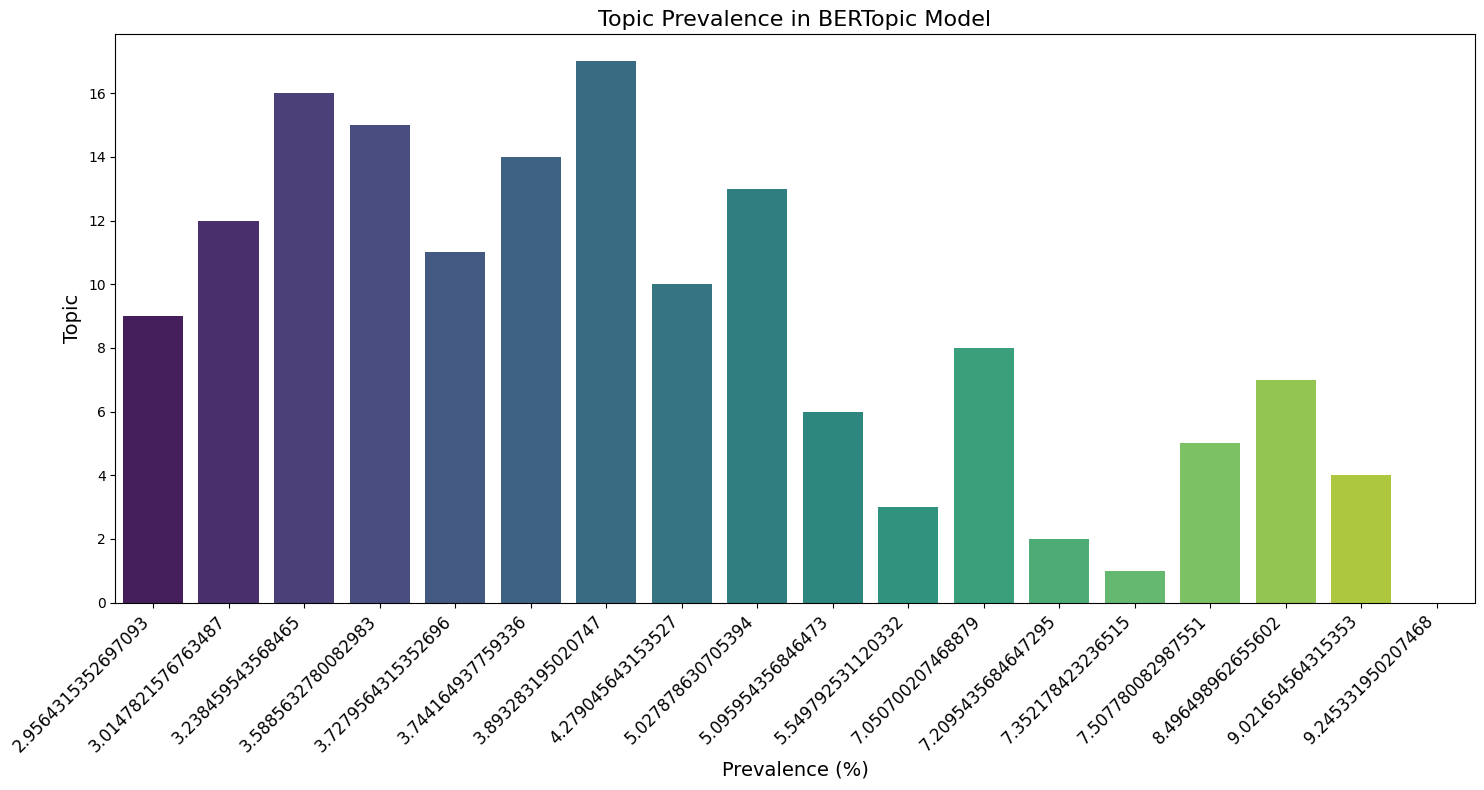


Topic Information Summary:
Total topics (excluding outliers): 18
    Topic  Count                                              Name                                                                                       Representation                                                                                  Representative_Docs                                                                                            Top Words  Prevalence (%)
1       0   2493                   0_septicemia_nos_failure_sepsis             [septicemia, nos, failure, sepsis, shock, pneumonia, procedure, renal, intubation, coli]  [instruction, respiratory failure procedure, Septicemia NOS, instruction, procedure, intubation,...  septicemia (0.1496), nos (0.077), failure (0.0459), sepsis (0.0442), shock (0.0435), pneumonia (...        9.245332
5       4   1408                            4_neo_malig_cancer_mal                       [neo, malig, cancer, mal, sec, brainspine, tumor, carcinoma, neopl, proce

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Step 1: Extract Top Words and Frequencies for Each Topic Using BERTopic Functions

# Get a summary of topics with their frequencies
topic_info = topic_model.get_topic_info()

# Get top words for each topic using BERTopic's built-in method
top_words_per_topic = topic_model.get_topics()

# Convert the top words per topic into a more readable format
top_words_summary = []
for topic_id, words in top_words_per_topic.items():
    top_words_summary.append({
        'Topic': topic_id,
        'Top Words': ', '.join([f"{word} ({round(weight, 4)})" for word, weight in words[:10]])  # Show words with weights
    })

top_words_df = pd.DataFrame(top_words_summary)

# Step 2: Add Topic Distributions to the DataFrame

# Add topic assignments and probabilities to the dataframe
df_bertopic['BERTopic_Assigned_Topic'] = topics
df_bertopic['Topic_Probabilities'] = probs.tolist()

# Step 3: Reassign Documents Assigned to Topic `-1`

# Find indices of documents assigned to topic `-1`
indices_to_reassign = df_bertopic[df_bertopic['BERTopic_Assigned_Topic'] == -1].index

# Reassign each document to the topic with the highest probability (excluding the -1)
for idx in indices_to_reassign:
    topic_probs = np.array(df_bertopic.loc[idx, 'Topic_Probabilities'])
    max_prob_topic = np.argmax(topic_probs)
    df_bertopic.at[idx, 'BERTopic_Assigned_Topic'] = max_prob_topic

# Update topics to reflect the reassignment
topics = df_bertopic['BERTopic_Assigned_Topic'].tolist()

# Step 4: Calculate Topic Prevalence

# Calculate the prevalence of each topic in the dataset after reassignment
topic_prevalence = df_bertopic['BERTopic_Assigned_Topic'].value_counts(normalize=True) * 100

# Step 5: Merge the Topic Information

# Merge the topic_info with top_words_df to create a complete summary
topic_summary_df = pd.merge(topic_info, top_words_df, left_on='Topic', right_on='Topic')

# Add the prevalence to the summary DataFrame
topic_summary_df['Prevalence (%)'] = topic_summary_df['Topic'].map(topic_prevalence)

# Remove the row with Topic -1 from the DataFrame as we have reassigned those documents
topic_summary_df = topic_summary_df[topic_summary_df['Topic'] != -1]

# Beautify the output for display
pd.set_option('display.max_colwidth', 100)  # Increase column width to avoid truncation

# Step 6: Visualize the Topic Prevalence

# Adjust figure size for better visibility
plt.figure(figsize=(15, 8))

# Sort the DataFrame by Prevalence for a more logical order in the plot
topic_summary_df = topic_summary_df.sort_values('Prevalence (%)', ascending=False)

# Create a bar plot for topic prevalence
sns.barplot(x='Prevalence (%)', y='Topic', data=topic_summary_df, palette='viridis')

# Improve plot aesthetics
plt.title('Topic Prevalence in BERTopic Model', fontsize=16)
plt.xlabel('Prevalence (%)', fontsize=14)
plt.ylabel('Topic', fontsize=14)

# Rotate the y-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()

# # Step 7: Create Word Clouds for Each Topic

# for topic_id, words in top_words_per_topic.items():
#     if topic_id != -1:  # Exclude topic -1
#         word_freq = {word: weight for word, weight in words[:10]}  # Limit to top 10 words for clarity
#         wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

#         plt.figure(figsize=(8, 4))
#         plt.imshow(wordcloud, interpolation='bilinear')
#         plt.axis('off')
#         plt.title(f"Word Cloud for Topic {topic_id}")
#         plt.show()

# Display the complete topic summary
print("\nTopic Information Summary:")

# Get the number of topics excluding -1
print(f"Total topics (excluding outliers): {len(set(topics))}")

print(topic_summary_df)

# Step 8: Export the Data

# Save the topic summary to a CSV file
topic_info_save_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/bertopic_topic_summary.csv'
topic_summary_df.to_csv(topic_info_save_path, index=False)

print(f"\nTopic information summary exported to {topic_info_save_path}")


### Phenotype Identification and Names

In [ ]:
import pandas as pd

# Define the new topic names based on the analysis
topic_names = {
    0: 'Cardiovascular and Vascular Disorders',
    1: 'Sepsis and Systemic Infections',
    2: 'Trauma and Fracture Injuries',
    3: 'Oncological Disorders',
    4: 'Valvular and Aortic Disorders',
    5: 'Acute Cardiac Conditions',
    6: 'Hepatic and Renal Disorders',
    7: 'Aneurysms and Myocardial Infarction',
    8: 'Intracerebral and Subarachnoid Hemorrhages',
    9: 'Colonic and Hemorrhagic Conditions',
    10: 'Gastrointestinal Disorders',
    11: 'Acute and Chronic Respiratory Conditions',
    12: 'Chronic Heart Failure and Disorders',
    13: 'Renal Failure and Acute Conditions',
    14: 'Bacterial Infections and Sepsis',
    15: 'Stroke and Cerebral Infarctions',
    16: 'Neurological Trauma and Hemorrhages',
    17: 'Vascular Graft and Cardiac Device Complications'
}

# Update the topic summary dataframe with new names and ordered by topic
topic_summary_df['Topic Name'] = topic_summary_df['Topic'].map(topic_names)
topic_summary_df = topic_summary_df.sort_values(by='Topic')

# Reorder columns for better readability
topic_summary_df = topic_summary_df[['Topic', 'Topic Name', 'Count', 'Prevalence (%)', 'Top Words', 'Representative_Docs', 'Representation']]

# Beautify the output for display
pd.set_option('display.max_colwidth', 100)

# Display the updated topic summary
print("\nUpdated Topic Information Summary:")
print(topic_summary_df)

# Save the updated topic summary to a CSV file
updated_topic_info_save_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/updated_bertopic_topic_summary.csv'
topic_summary_df.to_csv(updated_topic_info_save_path, index=False)

print(f"\nUpdated topic information summary exported to {updated_topic_info_save_path}")



Updated Topic Information Summary:
    Topic                                       Topic Name  Count  Prevalence (%)                                                                                            Top Words                                                                                  Representative_Docs                                                                                       Representation
1       0            Cardiovascular and Vascular Disorders   2493        9.245332  septicemia (0.1496), nos (0.077), failure (0.0459), sepsis (0.0442), shock (0.0435), pneumonia (...  [instruction, respiratory failure procedure, Septicemia NOS, instruction, procedure, intubation,...             [septicemia, nos, failure, sepsis, shock, pneumonia, procedure, renal, intubation, coli]
2       1                   Sepsis and Systemic Infections   2240        7.352178  athrscl (0.1092), vssl (0.1092), natve (0.1092), crnry (0.1092), artery (0.1089), coronary (0.09...  [artery sp

In [ ]:
# Step 2: Add a new column to df_bertopic with the descriptive topic names
df_bertopic['BERTopic_Topic_Name'] = df_bertopic['BERTopic_Assigned_Topic'].map(topic_names)

# Display the updated dataframe for verification
print("\nUpdated df_bertopic with Topic Names:")
print(df_bertopic[['BERTopic_Assigned_Topic', 'BERTopic_Topic_Name']].head())

# Step 3: Save the updated df_bertopic to a CSV file
df_bertopic_save_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/df_bertopic_with_topic_names.csv'
df_bertopic.to_csv(df_bertopic_save_path, index=False)

print(f"\ndf_bertopic with topic names exported to {df_bertopic_save_path}")


Updated df_bertopic with Topic Names:
   BERTopic_Assigned_Topic                  BERTopic_Topic_Name
0                       12  Chronic Heart Failure and Disorders
1                       12  Chronic Heart Failure and Disorders
2                        4        Valvular and Aortic Disorders
3                        7  Aneurysms and Myocardial Infarction
4                        5             Acute Cardiac Conditions

df_bertopic with topic names exported to /content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results/df_bertopic_with_topic_names.csv


### Visualise BERTopic Phenotypes

In [ ]:
# Visualize topic clusters in a 2D space
topic_model.visualize_topics()

In [ ]:
# Visualize the top words for each topic in a bar chart
topic_model.visualize_barchart(top_n_topics=10, n_words=10)


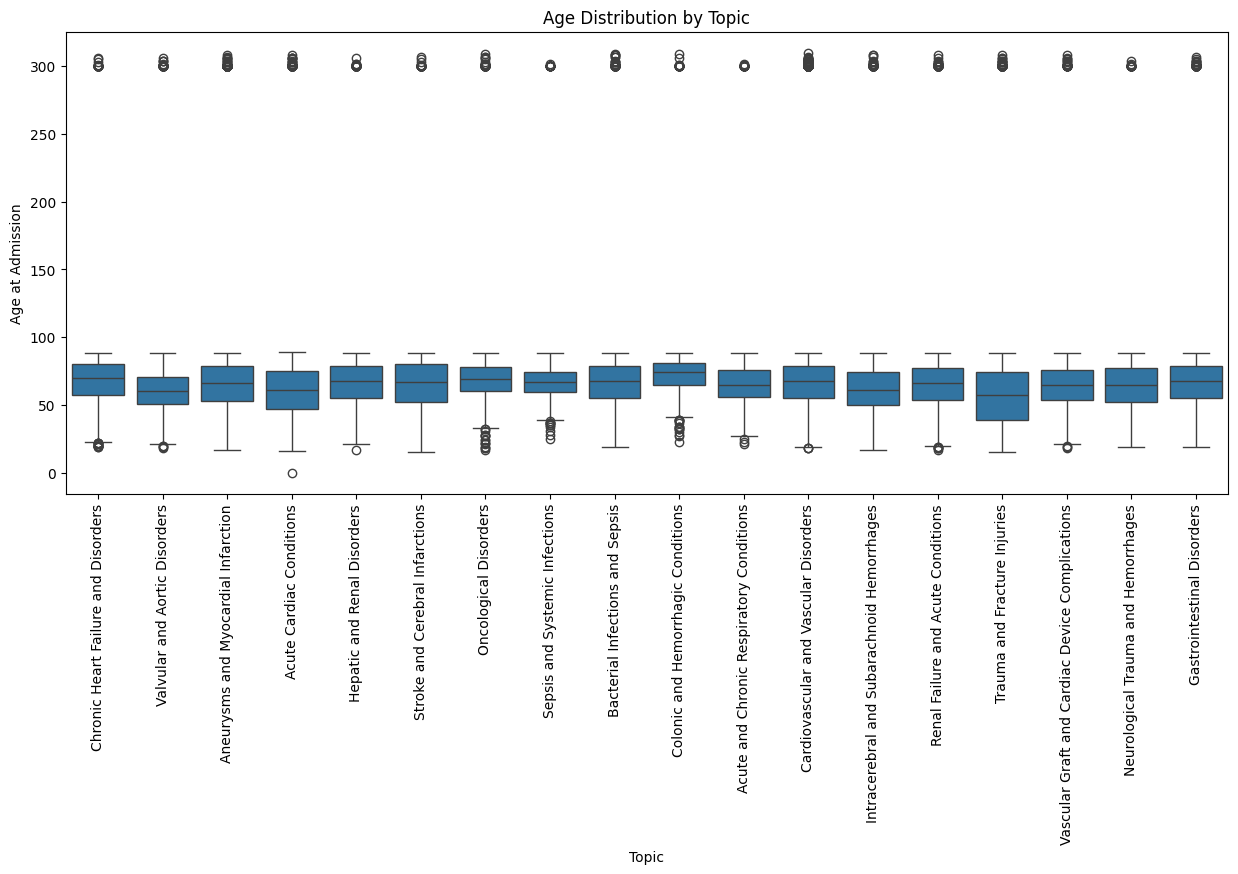

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3.1: Analyze Age Distribution by Topic
plt.figure(figsize=(15, 6))
sns.boxplot(x='BERTopic_Topic_Name', y='AGE_AT_ADMISSION', data=df_bertopic)
plt.title('Age Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Age at Admission')
plt.xticks(rotation=90)
plt.show()


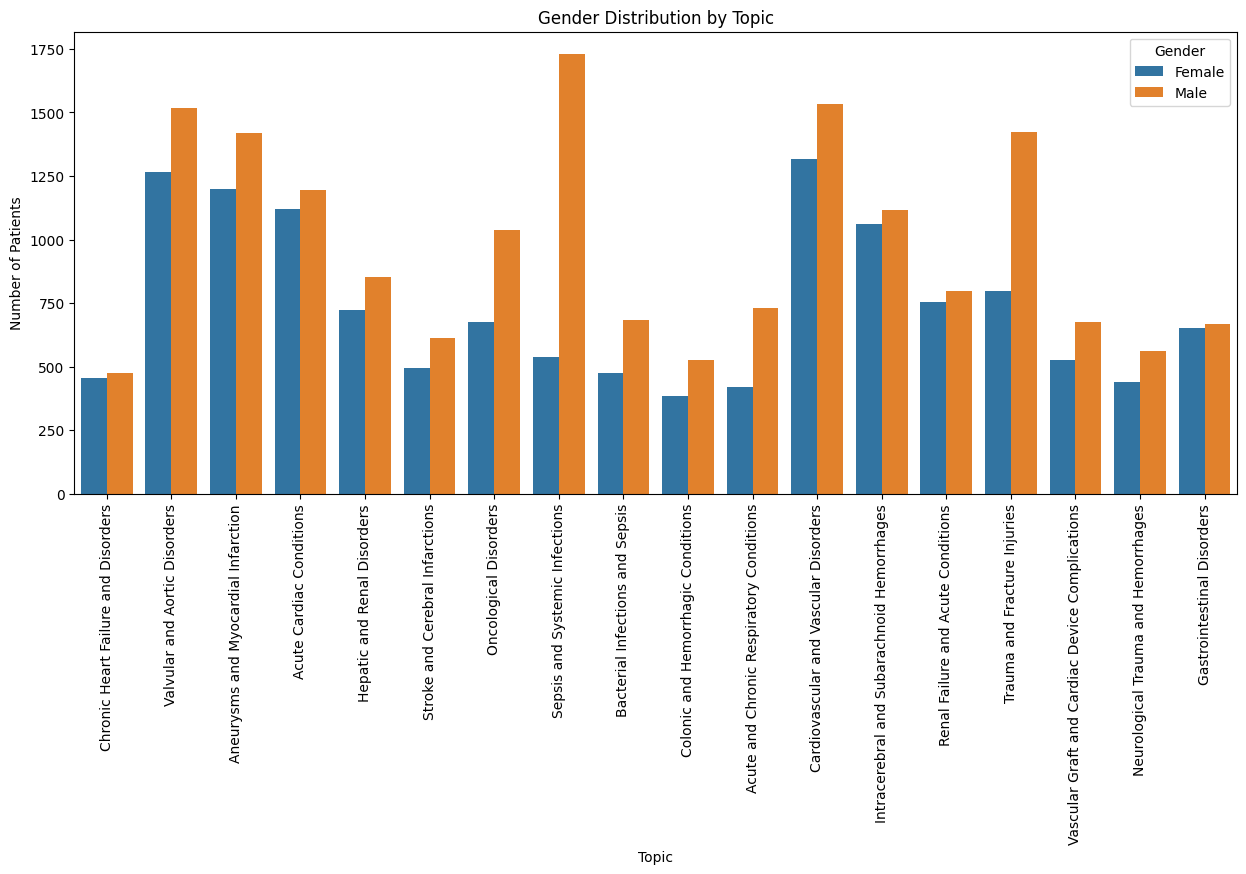

In [ ]:
# Step 3.2: Analyze Gender Distribution by Topic
plt.figure(figsize=(15, 6))
sns.countplot(x='BERTopic_Topic_Name', hue='GENDER', data=df_bertopic)
plt.title('Gender Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])
plt.show()


In [ ]:
# Analyzing ICD codes by topic
top_icd_by_topic = df_bertopic.groupby('BERTopic_Topic_Name')['ICD9_CODE_diag'].agg(lambda x: x.value_counts().index[0])

print("\nTop ICD Codes by Topic:")
print(top_icd_by_topic)



Top ICD Codes by Topic:
BERTopic_Topic_Name
Acute Cardiac Conditions                           56212
Acute and Chronic Respiratory Conditions            4240
Aneurysms and Myocardial Infarction                 5789
Bacterial Infections and Sepsis                     4280
Cardiovascular and Vascular Disorders               0389
Chronic Heart Failure and Disorders                43411
Colonic and Hemorrhagic Conditions                  4241
Gastrointestinal Disorders                         51881
Hepatic and Renal Disorders                          431
Intracerebral and Subarachnoid Hemorrhages          5070
Neurological Trauma and Hemorrhages                 4373
Oncological Disorders                              41071
Renal Failure and Acute Conditions                  5070
Sepsis and Systemic Infections                     41401
Stroke and Cerebral Infarctions                    85221
Trauma and Fracture Injuries                        4271
Valvular and Aortic Disorders              

In [ ]:
# Visualize the similarity between topics
topic_model.visualize_heatmap()


### Analyse common characteristics of each phenotypic group

In [ ]:
# Group by topic name to summarize demographics
grouped_df = df_bertopic.groupby('BERTopic_Topic_Name')

# Age statistics
age_stats = grouped_df['AGE_AT_ADMISSION'].describe()
print("\nAge Statistics by Topic:")
print(age_stats)

# Gender distribution
gender_distribution = grouped_df['GENDER'].value_counts(normalize=True).unstack()
print("\nGender Distribution by Topic:")
print(gender_distribution)

# Top ICD-9 codes for each group
top_icd9_codes = grouped_df['ICD9_CODE_diag'].apply(lambda x: x.value_counts().head(3))
print("\nTop ICD-9 Codes by Topic:")
print(top_icd9_codes)

# Save the demographic and clinical analysis results to a CSV
demographic_clinical_analysis_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/bertopic_demographic_clinical_analysis.csv'
age_stats.to_csv(demographic_clinical_analysis_path, mode='w')
gender_distribution.to_csv(demographic_clinical_analysis_path, mode='a')
top_icd9_codes.to_csv(demographic_clinical_analysis_path, mode='a')

print(f"\nDemographic and clinical feature analysis exported to {demographic_clinical_analysis_path}")



Age Statistics by Topic:
                                                  count       mean        std   min    25%   50%   75%    max
BERTopic_Topic_Name                                                                                          
Acute Cardiac Conditions                         2316.0  69.420553  52.577341   0.0  47.00  61.0  75.0  308.0
Acute and Chronic Respiratory Conditions         1150.0  72.428696  45.149858  21.0  56.00  65.0  76.0  302.0
Aneurysms and Myocardial Infarction              2621.0  76.855399  57.429194  17.0  53.00  66.0  79.0  308.0
Bacterial Infections and Sepsis                  1155.0  79.375758  58.972197  19.0  55.00  68.0  79.0  309.0
Cardiovascular and Vascular Disorders            2852.0  82.723001  65.326048  18.0  55.00  68.0  79.0  310.0
Chronic Heart Failure and Disorders               930.0  80.015054  59.570058  19.0  57.00  70.0  80.0  306.0
Colonic and Hemorrhagic Conditions                912.0  80.301535  46.692940  23.0  65.00  74

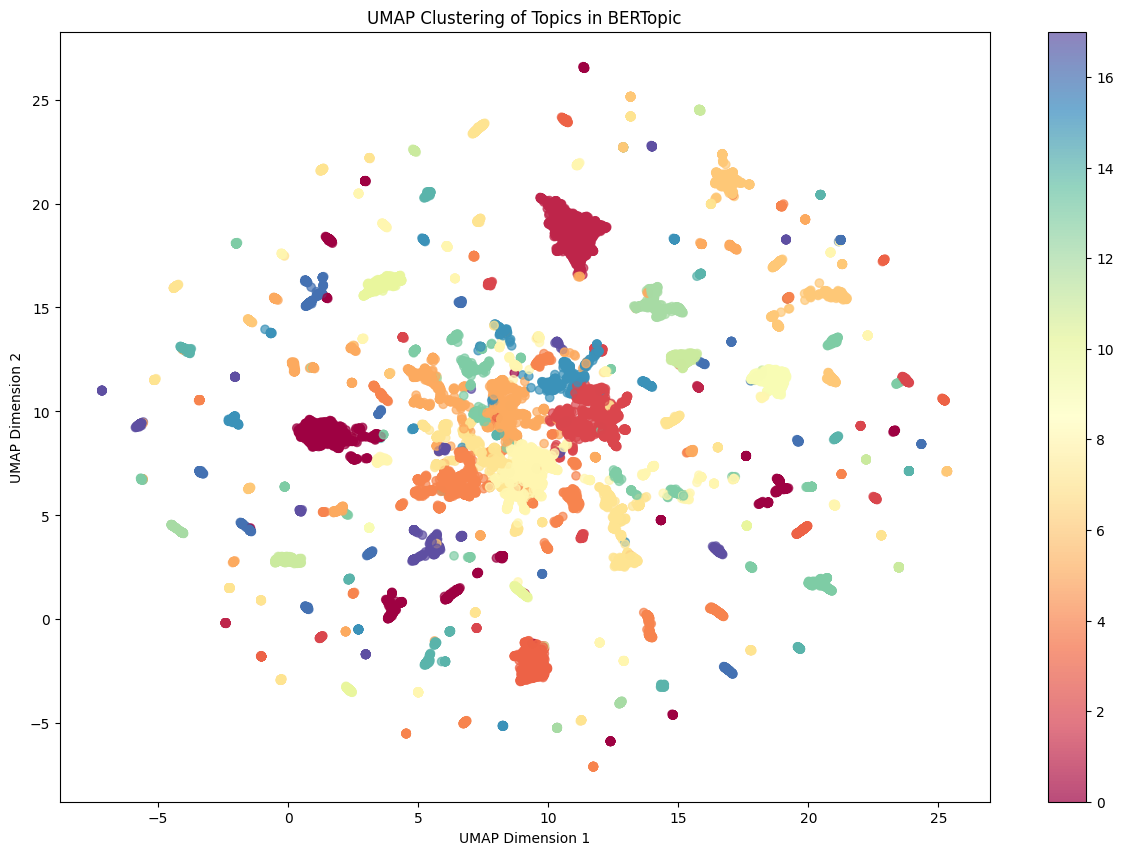

In [ ]:
import matplotlib.pyplot as plt
from umap import UMAP

# Assuming combined_embeddings_np and topics are already defined

# Step 1: Fit UMAP model on combined embeddings
umap_model = UMAP(n_neighbors=15, n_components=2, min_dist=0.1, metric='cosine', random_state=42)
umap_embeddings = umap_model.fit_transform(combined_embeddings_np)

# Step 2: Plot UMAP embeddings with topic labels
plt.figure(figsize=(15, 10))
scatter = plt.scatter(
    umap_embeddings[:, 0], umap_embeddings[:, 1],
    c=topics, cmap='Spectral', alpha=0.7
)
plt.colorbar(scatter)
plt.title("UMAP Clustering of Topics in BERTopic")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.show()


### Evaluate Performance

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.special import logsumexp

def evaluate_bertopic(topic_model, df_bertopic, combined_text, output_path):
    """
    Evaluate BERTopic model using various metrics and export results.

    Parameters:
    - topic_model: Trained BERTopic model.
    - df_bertopic: DataFrame containing the data and assigned topics.
    - combined_text: List of text data used in the BERTopic model.
    - output_path: Path to export the evaluation results.

    Returns:
    - evaluation_results: Dictionary containing evaluation metrics.
    """

    # Initialize results dictionary
    evaluation_results = {}

    # 1. Topic Coherence
    top_words_per_topic = [words for _, words in topic_model.get_topics().items()]
    texts = [doc.split() for doc in combined_text]
    dictionary = Dictionary(texts)

    # Ensure top_words_per_topic is in the right format (list of list of words)
    top_words_per_topic = [[word for word, _ in topic] for topic in top_words_per_topic if topic]

    coherence_model = CoherenceModel(topics=top_words_per_topic, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    evaluation_results['Topic Coherence'] = coherence_score

    # 2. Topic Diversity
    unique_words = set(word for topic in top_words_per_topic for word in topic)
    total_words = sum(len(topic) for topic in top_words_per_topic)
    topic_diversity = len(unique_words) / total_words if total_words > 0 else 0
    evaluation_results['Topic Diversity'] = topic_diversity

    # 3. Clustering Metrics: Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index
    embeddings_for_validation = np.array(df_bertopic['Topic_Probabilities'].tolist())
    cluster_labels = df_bertopic['BERTopic_Assigned_Topic']

    evaluation_results['Silhouette Score'] = silhouette_score(embeddings_for_validation, cluster_labels)
    evaluation_results['Davies-Bouldin Index'] = davies_bouldin_score(embeddings_for_validation, cluster_labels)
    evaluation_results['Calinski-Harabasz Index'] = calinski_harabasz_score(embeddings_for_validation, cluster_labels)

    # 4. Perplexity
    def compute_perplexity(probs):
        log_perplexity = -np.mean(logsumexp(np.log(probs), axis=1))
        perplexity = np.exp(log_perplexity)
        return perplexity

    evaluation_results['Perplexity'] = compute_perplexity(embeddings_for_validation)

    # Beautify and print results
    print("\n\033[1mBERTopic Model Evaluation Summary:\033[0m")
    for metric, score in evaluation_results.items():
        print(f"{metric}: \033[94m{score:.4f}\033[0m")

    # Convert results to a DataFrame for export
    evaluation_df = pd.DataFrame(list(evaluation_results.items()), columns=['Metric', 'Score'])

    # Export the results to CSV
    evaluation_df.to_csv(output_path, index=False)
    print(f"\nEvaluation results exported to {output_path}")

    return evaluation_results


# Example usage:
output_path = f'{base_path}/BM7/Dissertation/Final_Datasets/Model_results/bertopic_evaluation_results.csv'
evaluation_results = evaluate_bertopic(topic_model, df_bertopic, df_data['combined_text'].tolist(), output_path)




BERTopic Model Evaluation Summary:
Topic Coherence: 0.5365
Topic Diversity: 0.7368
Silhouette Score: 0.1628
Davies-Bouldin Index: 1.4086
Calinski-Harabasz Index: 2182.9049
Perplexity: 2.2864

Evaluation results exported to /content/drive/MyDrive/BM7/Dissertation/Final_Datasets/Model_results/bertopic_evaluation_results.csv
